# Heat Smart Orkney: Demand response (DR) valuation

# Table of Contents  <a class="anchor" id="contents"></a>

* [1. Summary](#summary)
* [2. Introduction](#introduction)
* [3. Technologies and Techniques](#tools)
* [4. Results](#results)
    - How much energy is currently curtailed annually across the Orkney Isles?
* [5. Discussion](#discussion)
    - How much can this be reduced by different levels of DR penetration?
    - How many local households would need to be on our DR scheme in order to supply this level of DR?
* [6. References](#references)
* [7. Appendix](#appendix)

# 1. Summary <a class="anchor" id="summary"></a> 

Orkney has historically been renowned for its wind farm taking advantage of the windy climate in the region. Wind turbine power, however, inherently entails much more uncertainty in the availability of power generation than conventional power generation like nuclear, thermal, and water because of its nature dependent on mother nature wholly. Although Orkney has favorable wind most of the time in a year, it is still considered uncertain in power generation space because power demand and generation must always match each other at any point in time following the law of conservation of energy with a very narrow absorption capacity in the form of grid frequency variance. One thing we should notice is that uncertainty does not necessarily mean downside alone, it embraces both opportunity and risk. Although renewable energy will bring in risks to the existing grid control, it has the potential opportunity of curtailed power. 

In this study, we have explored whether there is an opportunity to utilise curtailed power of wind turbines that have not been tapped before. Depending on the power demand in the grid, curtailed power can happen anytime, for example, when the wind is strong enough but power demand in the grid is very low. In such cases, so far, the wind turbine has needed to be unloaded to a partial load or shut down while leaving room to the potential limit of the turbine generator set. In other words, the curtailed power is a hidden opportunity that could not be reaped due to the lack of power demand in the grid at a point in time. 

On the other hand, some sort of energy absorption or storage system is required as additional investments to absorb such curtailed power due to the power demand-generation matching principle. We included into the study some commercially available devices such as home batteries, storage heaters, and electrically heated hot water tanks.

Evaluating the economic feasibility of the curtailed power, we have focused on the following questions as guidelines. 
- How much energy is currently curtailed annually across the Orkney Isles?
- How much can this be reduced by different levels of DR penetration?
- How many local households would need to be on our DR scheme in order to supply this level of DR?

In a trial with 30 households, we would expect a 0.1% reduction in curtailed energy annually and noticeable other energy source demand shifts to wind energy. If this is successful, a maximum of 45% (90GWh) of 195GWh annually curtailed energy could be reduced by installing storage heaters and electrically heated hot water tanks to 22,000 households, with 7 million GBP of profit in 6 years. However, a realistic suggestion would be accepting 6630 more households in 5 years after a successful trial, reducing 18% of annually curtailed energy and earn 7 million GBP in 10 years.

# 2. Introduction <a class="anchor" id="introduction"></a>

# 2.1 Objective
Effective use of curtailed power and find a business opportunity, analyzing the viability of business proposition to go / no go.

If we can control demand, we may be able to use it to balance the system instead of curtailing
generators. This could provide several benefits: 
- it would reduce wastage of renewable energy and thus increase the fraction of energy generated by renewables within the UK;
- it could provide access to cheaper energy for local consumers on Orkney, reducing fuel poverty and linking locals to the benefits of wind turbine development on the isles;
- it would increase the revenue of generators close to the top of the curtailment order and therefore improve the business case for building new (marginal) generators;
- it could help to avoid more costly network capacity upgrades, which would be an alternative solution to the curtailment problem

# 2.2 Hypotheses
1. There is sizable wasted power due to curtailment.
2. There will be physically sufficient room for power storage potential which absorbs redundant power which otherwise curtailed. 
3. Value of such curtailed power is large enough to be shared among households and the company, and additional investment for batteries, storage heaters, hot water storage tanks can be paid back in a generally acceptable range of 6 years.
4. Curtailment is affected mainly by wind speed and demand:
    - High wind speed plus Low demand results in higher curtailment. For instance, more windy days during autumn and winter, and during nights and midnights. However, not much demand in midnights which could possibly cause higher curtailments in all seasons.
    - Low wind speed plus high demand results in lower curtailment. For instance, demands during nights could be higher, but in the summertime, wind speed is generally lower, which could result in lower curtailments.
6. Due to the geographical location, Orkney never lacks wind and sometimes could be very windy with gusts even in summer. Therefore, we may not be able to see a clear seasonal trend of curtailment.
7. Setpoint could be predicted by wind speed and demand. With constant demand, any changes in wind speed will cause no change in setpoint. On the other hand, with constant wind speed, an increase in demand will result in an increase in setpoint and vice versa.

# 2.3 Overview of the approach used in the analysis
We had mainly two parts in the approach, one is a bit of engineering estimation and exploratory data analysis (EDA) part and another one is business study part. 

As for the first engineering and EDA part, we proceeded with the following steps. 

### Engineering and EDA part
#### Step 1: Raw data check

We started by simply plotting out all raw data as they are without any cleaning to understand what each variable looks like.

For this check, we chiefly used a scatter plot matrix, time charts, and line plots.

- Scatter plot matrix: Power_kw, Setpoint_kW, and Wind_ms to see the operating pattern with those three parameters at a glance
- Time charts: Setpoint_kW, Power_kW, Wind_ms, Demand_mean_kw, N_household to see how it behaves over time and if there are any outliers to be cleaned up.
- Line plots: Average wind velocity v.s. hour in a day, and Average household power demand v.s. hour in a day to see if there is any hourly and seasonal pattern. 

#### Step 2: Potential power estimation and its time series trend

Next, we estimated potential power from rather engineering approach than the regression from the maximum power characteristics of actual generated power(Power_kW) because the actual power in the dataset has both variation and bias, for which variation comes from other unknown factors like ambient temperature and pressure, and bias comes from just one sample out of 500+ wind turbines. Therefore, we adopted a simple estimation with the general industry practice of wind turbine power equation with a blade length of 26m, hitting 900kW design limit at 12m/s wind velocity and being placed in the lower variance region of the actual power characteristics(Fig 3.1).

Therefore, potential power is calculated as a single variable function of wind velocity in our study. 

After estimating the potential power, it was plotted in a time chart.

#### Step 3: Curtailed power calculation

Here, we defined curtailed power as:

    Curtailed power(kW) = Potential power(kW) - Setpoint_kw (kW)

Since setpoint limits the wind turbines to the specified power(kW) whatever they have still room for capacity (potential power in this case), we adopted the power gap between potential power and setpoint for the curtailed power. Another option of curtailed power calculation was the gap between potential power and generated power(Power_kw in the dataset), but an estimation from this formulation could include a lot of transient behaviours of wind turbines where either curtailed could be overestimated or underestimated due to power generation lag time behind the setpoint commanded electronically and instantly from the grid control center.

Therefore, we finally concluded to use the above formulation.

In addition, we forced some nuisance operating data to 0 value such as:
- Wind velocity >30m/s: We assumed the wind turbine is commanded to stop for its protection.
- Setpoint_kW > Potential power(negative curtailment value): It can be seen where wind < 12m/s and wind turbine runs at partial speed. We interpreted that potential power was set at constant 900kW by default in a day while potential power could be occasionally low at weak wind conditions. In such a case, negative curtailment occurs in the above formulation.   
- Setpoint_kW = 900: Since there are always minor deviations of actual operating values from a fixed control setting in actual machine operation, we simply forced the curtailed power to 0 when the setpoint is at the maximum 900kW capacity. 

#### Step 4: Conversion (accumulation) of curtailed power(kW) to curtailed energy(kWh)

In this step, we converted from curtailed power to energy. Since the original turbine telemetry dataset is stored as 1-minute interval data, we aggregated each power(kW) of row in the dataset for 60seconds to make it kWh curtailed every 1 minute. Then the 1-minute accumulated curtailed energy can be further aggregated to 1hour, 1month, and 1year for every purpose of visualisations and analysis.

    Curtailed energy(kWh) in a minute = Curtailed power(kW=kJ/sec) x 60sec x 0.278e-3 (=1hr/3600sec) 


After clearing the first part of EDA, we moved on to the second part of the business case as below. 

### Business case study part
#### Step 5: Estimate the value of curtailed “energy” in GBP

We converted the curtailed energy obtained in Step4 to GBP using the typical electricity price in Scotland. The electricity price is composed of variable and fixed portion each. We assumed that the fixed portion doesn't change whatever the curtailment is because 500 wind turbines are already existing, and so the variable portion of electricity price is relevant to the curtailed energy.    

#### Step 6: Search relevant data in the market

In order to proceed with the business case study, we collected the following information for the analysis. 
* Commercially available energy storage devices and their costs (home battery, storage heater, and hot water tank)
* Average household utility consumption (electricity and gas) in Scotland

For the analysis of economic feasibility, we used reference numbers from commercially available devices as an investment cost of the business case. Although there might be other associated costs like system development by Kaluza, administrative overhead, etc., we assumed that the investment in the additional equipment is the main focus.
The average household utility profile in Scotland was referenced to compare that of Orkney to contemplate that how much more energy in Orkney could potentially be electrified from gas. Since total combined energy consumption or energy demand stays more or less the same regardless of its physical form whether it is in heat or electricity, the use of curtailed energy means a shift from gas to electricity unless more overall energy demand emerges in the region such as a lifestyle change to more ample consumption. That is why we estimated gas consumption.    

#### Step 7: Whether the proposed solution is sustainable and economically beneficial to relevant stakeholders

We estimated the profitability of selling additional power to the household which installed the new devices with the discounted electricity bill. In our proposal, all additional investment costs are borne by Kaluza, and households are given discounted electricity bills. This is a similar business model to mobile phone carriers which give mobile phones to users and paid back in monthly fees. We assumed that households would be slow to adopt the expensive equipment unless the benefit is immediately visible. So for households, their benefit is cheaper energy bills in total and energy security with storage capability. For Kaluza, additional revenue and profit, and the corporate image of ESG is an appealing benefit.    

#### Step 8: Future scale up estimation

Since cost-benefit can be calculated per unit basis, future scaling up is a matter of "N-household" times. In our estimation, the time scope of the financial estimation is 10 years of expected equipment life, and the estimated payback period is about 6 years with no discount rate counted. So, the revenue beyond 6 years will become profit as is. If the expansion of the business is rapid, however, we will run out of cash and need a continual injection of cash. We estimated a business roadmap considering the timing of additional investment to grow.


# 3. Technologies and techniques <a class="anchor" id="tools"></a>

## 3.1 Assumptions and Conditions:
1. Engineering practice is adopted in the estimation of potential power rather than actual generated, Power_kw.
2. Wind turbine is designed at a rated capacity of 900kW at a rated wind speed of 12m/s.
3. Curtailed power is effective up to wind 30m/s. 
4. Setpoint is adopted in the estimation of curtailed power rather than actual power generated, Power_kW.
5. Null value is of no use, and to be omitted.
6. 500+ turbines in Orkney, but due to different exact locations the energy generation could vary either ups or downs. We assumed 500 turbines as the optimal number of turbines in our analysis.
7. Wind velocity pattern and mean energy demand stay the same level as those of data explored. 
8. Electricity price:  Typical Scotland electricity price
9. Utility consumption and cost at household: Typical Scotland statistics data
10. Energy storage device and their cost: from the commercially available reference of home battery, storage heater, hot water tank 
11. Storage device life cycle: 10 years
12. Project financial feasibility time scope: 10 years (= storage device life)
13. Expected payback period to go for the project: 6 years 
14. Price of gas and electricity is the same (Jon Davies, 2019 [[1]](#average-electricity-gas-bills-in-2019))
15. Curtailment occurrence was particularly low in Dec, Jan, and Feb of this sample turbine. On the other hand, curtailment did not happen every day throughout the year of this sample turbine. We assume that the other 500 turbines have curtailment in different days, so 500 turbines give curtailment every day and are able to support everyday households usage.

#### Data cleaning notes
1. Treatment of null value in Power_kw, Setpoint_kw, Wind_ms
    - Setpoint shall never include NA because it comes from a command signal from a grid control system. If it is measured data from sensors or calculated data from multiple sensor readings combined, null values could be possible for some reason like sensor failure. But since setpoint is a controlled setting, it can never be null unless control system failure happens. Therefore, any null of Setpoint_kw shall be omitted as abnormal data. 
    - Wind_ms should never include NA because it comes from sensors. NA value happens only when sensor failure or control system failure happens. Therefore, any null value of Wind_ms shall be omitted. 
    - Power_kw also never includes NA because of the same reason as wind, therefore, any null value shall be omitted. 
    - The dataset of 1-minute intervals contains overly granular data points for economic feasibility study, therefore, removing uncleaned data does not degrade the validity of the overall estimation. 

2. Treatment of 0 Power_kw, Setpoint_kw, Wind_ms
    - Those data is correct reading from the actual hardware. Therefore, data with 0 in Power_kw, Setpoint_kw, Wind_ms should be kept in the dataset for simplicity. 
    - For cleaning purposes, Power_kw < 0 if any is better to be forced to 0. Although reverse power could happen in power generation as an abnormal case, it happens rarely and is of no use in business case estimation. Therefore, it should be forced to 0. 
    - Setpoint_kw = 0 shall be kept because it is built into curtailed power, and when it is 0, all potential power becomes curtailed power. 
    - Wind_ms = 0 might be removed because it does not generate any power at 0 speed. But what if it is 0.01m/s? It mathematically generates power, but in reality, it is negligible scale. As it is tricky for Wind_ms to be treated properly at around 0, all data except null should be kept.

3. Treatment of missing data in turbine_telemetry.csv
    - 2015 data are not completed, but not faulty. We'll drop 2015 data by plotting some graphs.
    - For simplicity and conservative estimation, missing data in  Apr 2017 was not corrected in our analysis not inferring more curtailed energy should have been available.

4. Treatment of Power_kw above the setpoint
    - We omitted data with Power_kw > Setpoint_kw in the analysis. These are special data points on the operation envelope which could happen in transient cases. For example, even when the wind turbine was commanded to 0kW setpoint, which is practically a shut-down command from the power grid, the wind turbine cannot stop instantly due to the significant inertia of gigantic turbine blades. However, the setpoint signal itself falls down to 0 instantly as it is electronically commanded. Although these data points show normal transient behaviour, they are of no use in the curtailed power calculation. Therefore, those are omitted for simplicity and clarity.

## 3.2 Curtailed power (kW) and Curtailed energy (kWh)

## 3.2.1 Choosing blade length for potential power calculation
Potential power (kW) = 0.5 x air density 1.23 x (pi x blade length^2) x (wind speed^3) x Power coefficient 0.4 / 1000 (The Royal Academy of Engineering, n.d.[[10]](#wind-turbine-calculation))

It should be noted that we used power coefficient Cp at a constant value of 0.4 in the calculation. As wind turbine blade is generally designed for Cp from 0.35 to 0.45 in the industry practice, we took the average value of the common Cp range. Strictly speaking, Cp takes different values continuously along with wind velocity since Cp is dependent on a design parameter, lambda (= blade tip speed/wind velocity). However, we simply adopted 0.4 for this calculation since blade length and rotational speed were unknown in the given condition for the blade tip speed calculation, and also the impact of this simplification is considered negligibly small.  When an appropriate blade length is selected to match 900kW at a rated speed at one end while it gives 0 kW at 0 wind m/s at the other end, wind turbine performance doesn't vary a lot with both the performance ends fixed on its operation envelope. Thus, the concerns on the oversimplification of the model are only limited to partial speed operation, but it is still not significant because eventually wind velocity mostly governs in those regions in the order of power of 3.
Based on the above reasoning, we chose the above simplified model of potential power estimation from an engineering basis.  

With regard to the blade length, firstly we compared several performance curves (potential power) of candidate blade length and the actual generated power in the dataset (Power_kW) as shown in Fig3.1 to see if our engineering basis estimation is close enough to the actual operating performance. The expected performance curves of the 26m-turbine blade give a good approximation to the actual power generation with a conservative margin left at a partial speed where wind velocity is less than 12m/s. We assumed that wind velocity of 12m/s as the rated wind speed where the wind turbine reaches its design limit of 900kW. 

We selected blade length = 26m for the potential power calculation as our best and still conservative estimate.


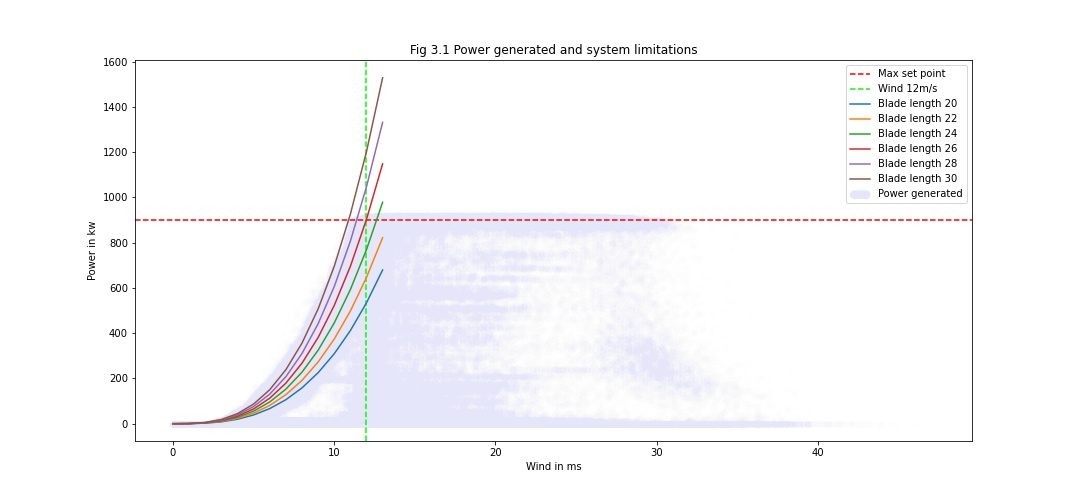

## 3.2.2 Curtailed power (kW)

#### What is curtailed power?
In layman's word with drawing an analogy from water usage, power is water flow rate or $how\ strong$ water current is while energy is $how\ much$ water used, stored, and collected. So prior to calculating curtailed energy, we need to calculate curtailed power at first.

Curtailed power in the wind turbine business is the unused hidden capacity that cannot be used. It could happen anytime because of the random feature of mother nature and power balance between local grid demand and potential power. If the wind velocity is high enough, potential power becomes 900kW, but if power demand is very low for some reason, a grid control center will send a command of lowering setpoint of the turbines to match the generation and consumption at a point in time. Therefore, the gap (or residual capacity) between potential power and setpoint is considered as curtailed power.  

#### Curtailed power equation
Curtailed power (kW) = Potential power (kW) - Setpoint (kW)

,where Potential power (kW) in terms of single turbine = 0.5 x 1.23 x (pi x 26^2) x wind speed^3 x 0.4 / 1000

In this case, study, because the setpoint of the turbine indicates whether the turbine is being forcibly curtailed by the setpoint commanded by the network operator, we used the above formula. 

Another alternative we conceived in the early stage of the study was: Curtailed power(kW) = Potential power kW - Total power generated (Power_kw). But considering that transient data were included in the turbine telemetry dataset, which could result in either overestimation or underestimation of the curtailment, we adopted the above formula.

## 3.2.3 Curtailed energy (kWh)

#### What is curtailed energy?
It stands for how $much$ energy was actually curtailed. We are interested in curtailed energy, not curtailed power because electricity providers charge us in terms of energy, not power.

- Energy: aggregate to the area in time chart

#### Curtailed energy equation
Curtailed energy in one minute (kWh) = curtailed power(kW) x 0.278 x 10^-3 (=1hour/3600sec) x 60sec

Since energy is an accumulation of every instant value of power, mathematically integral of power or calculating area under power curve, curtailed energy needs to be aggregated from curtailed power. As the original turbine telemetry dataset stores operating data at a 1-minute interval, curtailed energy is at first accumulated for one minute which means that a certain curtailed power at a certain time is interpreted as it lasted for one minute. The simplest understanding of the conversion is that curtailed power(kW) x 1hour is the expected amount of curtailed energy(kWh) in 1 hour if the instant value does continuously last for 1 hour, but here we want to calculate more granular curtailed energy of 60seconds, therefore, it is divided by 3600sec and multiplied back by 60seconds to make it 1-minute accumulated curtailed energy. Then the 1-minute curtailed energy can be used for a further sum to 1month, 1year curtailed energy for the purposes of the analysis.    

## 3.2.4 Curtailment computation
Data used:
- df_supply: Drop all NA and Power_kw > Setpoint_kw
- Energy supply and demand should be quite constant in particular months across the year, summer months should have less wind than winter months. Therefore, it is alright to have different years of supply and demand data. We can take the averages by month regardless of year for curtailment calculation when needed.

A new dataset will be created (df_curtail) with the below columns:
- Timestamp: the datetime in UTC of the measurement (the timestamp is situated at the end of the measurement period)
- Power_kw: average power in kW during the measurement period
- Setpoint_kw: the mean maximum-allowed generator output during the measurement period
- Wind_ms: mean wind speed at the turbine during the measurement period.
- Potential_power_kw: potential energy of single turbine = 0.5 x 1.23 x (pi x 26^2) x wind speed ^3 x 0.4 / 1000
    - Maximum must be 900kW. 
        - It cannot achieve a speed of 200km/h with a kids bicycle. Any hardware has a certain limit by design.
        - In this case, 900kW is the limit. Therefore, to protect the turbine, the setpoint cannot be set beyond 900kW. 
        - Resultantly, we cannot count on potential power beyond 900kW.  
- Curtailed_power_kw: potential power - Setpoint_kw 
- Curtailed_energy_in_1_minute_kwh:	Aggregated power for 1 minute with " curtailed power(kW) x 0.278 x 10^-3 x 60sec ".

## 3.3 OLS regression

Dudley L. Poston Jr stated that 'Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line. In this entry, OLS regression will be discussed in the context of a bivariate model, that is, a model in which there is only one independent variable ( X ) predicting a dependent variable ( Y ).' (Dudley L. Poston Jr, n.d. [[11]](#OLS))

If we could build a Setpoint or Curtailment prediction model using OLS regression, we could predict curtailed energy and build a business model on a rolling basis. 

We tried to find a meaningful pattern when the curtailed energy is likely to happen, however, it turned out that there is no strong correlation among candidate variables. It is considered that lower setpoint takes place at random rather than at a certain seasonal or hourly pattern. In other words, the curtailed energy is available any month sufficiently covering potential increased demand for a proposed business case later. 

# 4. Results <a class="anchor" id="results"></a>

### 4.1.1 Low demands
In general, most households need 0.2-0.3kW and around 0.1 kW per minute throughout the year. Two distinct levels of demands could be due to demands during different hours in a day. During midnights, 0.1kW demand because they're sleeping, and during dinner time when everyone is back home after work or school, 0.2-0.3kW is needed for meals preparation, heaters, lights, and hot water, etc. 

From the below figure (Fig 4.1), it shows that demand in Jan (coldest days in winter) is highest, and dropped constantly until Jul and Aug (hottest days in summer), then rose again and reached highest in Jan. The higher electricity demand could be related to more heating needs during cold hours.

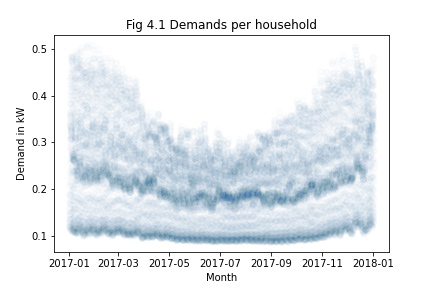

The monthly demand per household (Fig 4.2) is the highest in the winter (over 200 kWh) and lowest in the summer (less than 140 kWh). This again is reasonable due to more electricity for lightings or heatings during winter.

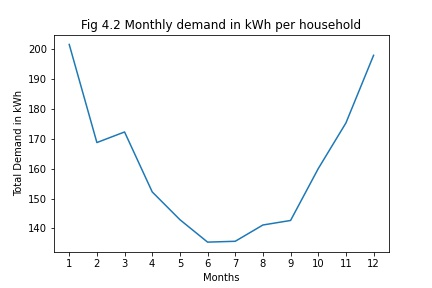

#### 4.1.1.1 Average demand in Scotland
Below table (Jon Davies, 2019 [[1]](#average-electricity-gas-bills-in-2019)) average Energy Monthly Consumption in Scotland was 308kWh as shown in this table:

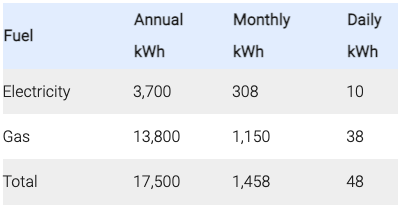

which is about 2 times more than Orkney average electricity demands:

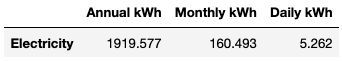

### 4.1.2 Windiest parts in the UK thus causing more curtailment

According to Metoffice statistics (Met Office, n.d. [[2]](#windiest-parts-of-UK)), Orkney is one of the windiest parts in the UK.

Fig 4.3 show that curtailment happens most between wind speed 7-25m/s. The pie chart in Fig 4.4 shows that 66% of data is within that range. 

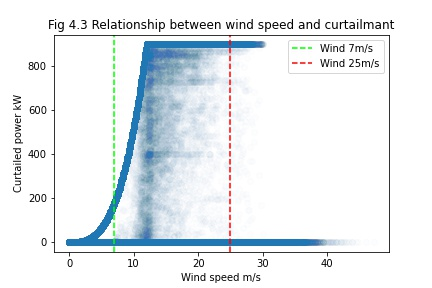

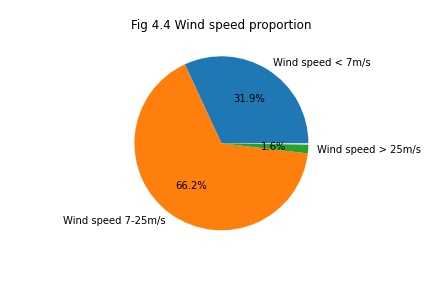

### 4.1.3 Power usage and generation pattern 

#### 4.1.3.1 Average Wind speed pattern:

In general, wind speed is highest in the winter (Nov - Feb), followed by spring and autumn, and the least in summer. Variance in terms of hours is not noticable.

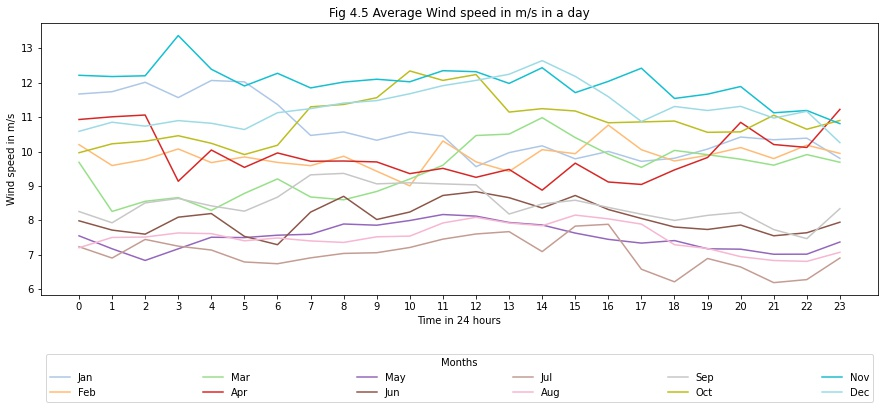

#### 4.1.3.2 Average Demand pattern:

The obvious and same trend across all months, which is related to and explainable by daily life.
1. 0am-5am: During the normal sleeping hour, demand is the lowest.
2. 5am-7am: This is the normal wakeup hour for residents to get ready for work and school. Therefore, higher demand than the sleeping period.
3. 7am-3pm: During the daytime, power demand is constant because most of the people are in the office or school.
4. 3pm-5pm: Demand rises and reaches a peak level at 5pm during the hours of heading back home from school and office. During winter, the peak is higher because the period is colder which they use more heatings, and dark earlier thus use more lightings.
5. 6pm-11pm: Demand drop during night hour which could be due to nightlife outside or time to sleep.

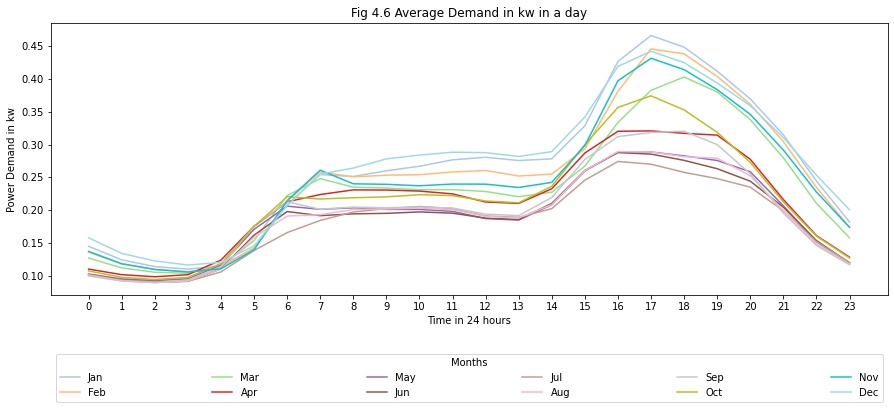

#### 4.1.3.3 Average Curatiled energy:
The two figures below show that during dec to feb, curtailment occurs least. In winter, setpoint was probably set to 900kW in most days to support extra heating or lighting usages.

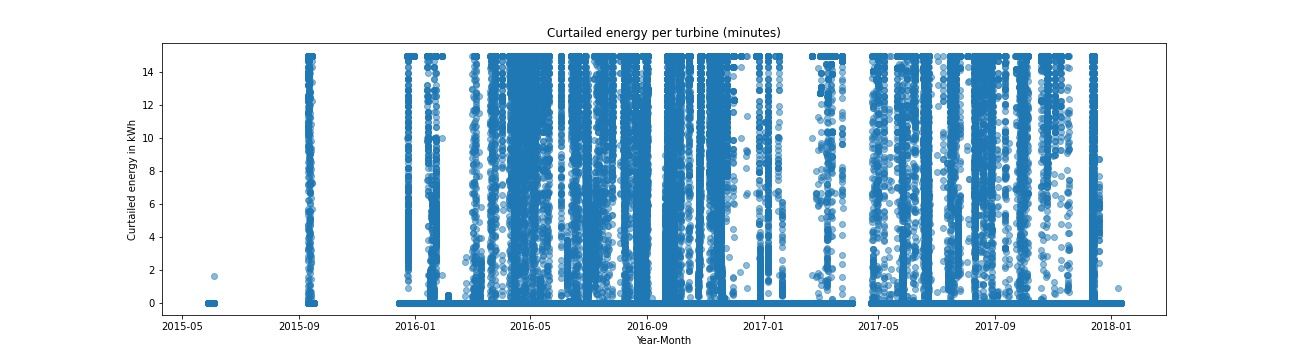

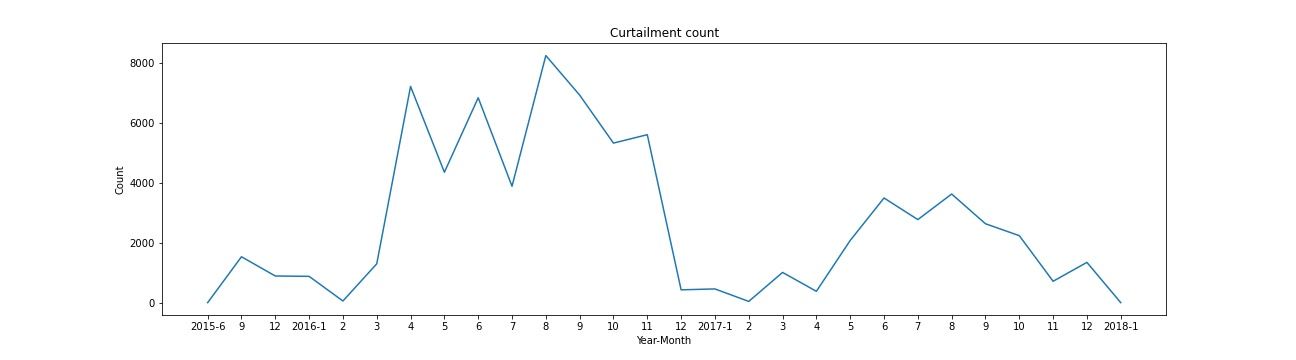

As shown in Fig 4.7, we don't see any obvious pattern across the year. Curtailed energy is calculated from potential power and setpoint which is not only affected by both demand and wind speed, but also other factors such as temperature and pressures and other nature impacts which were not recorded. Therefore, we rejected the hypothesis (7).

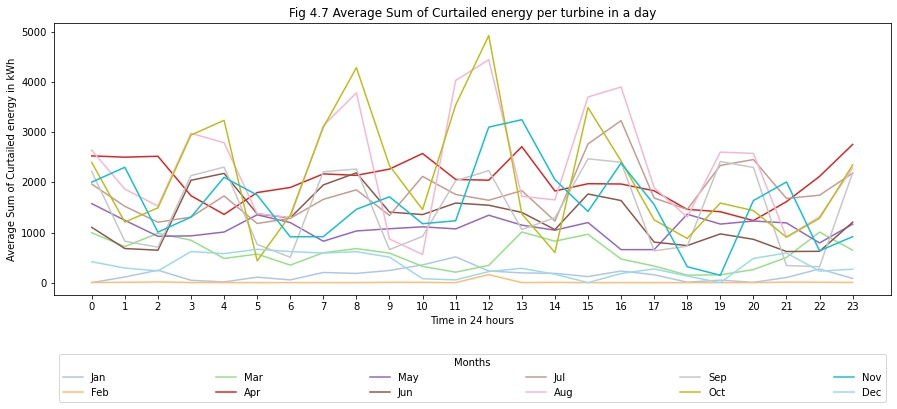

Drilled down into more details in a month, for instance, Jan below, constant wind speed with increase demand not necessary cause decrease in curtailed energy, such as 4:00-5:00, curtailed energy increased. Also, during 7:00-8:00, both wind speed and demand were quite constant, but curtailed energy decreased. There's no significant impact of wind speed and demand on curtailed energy.

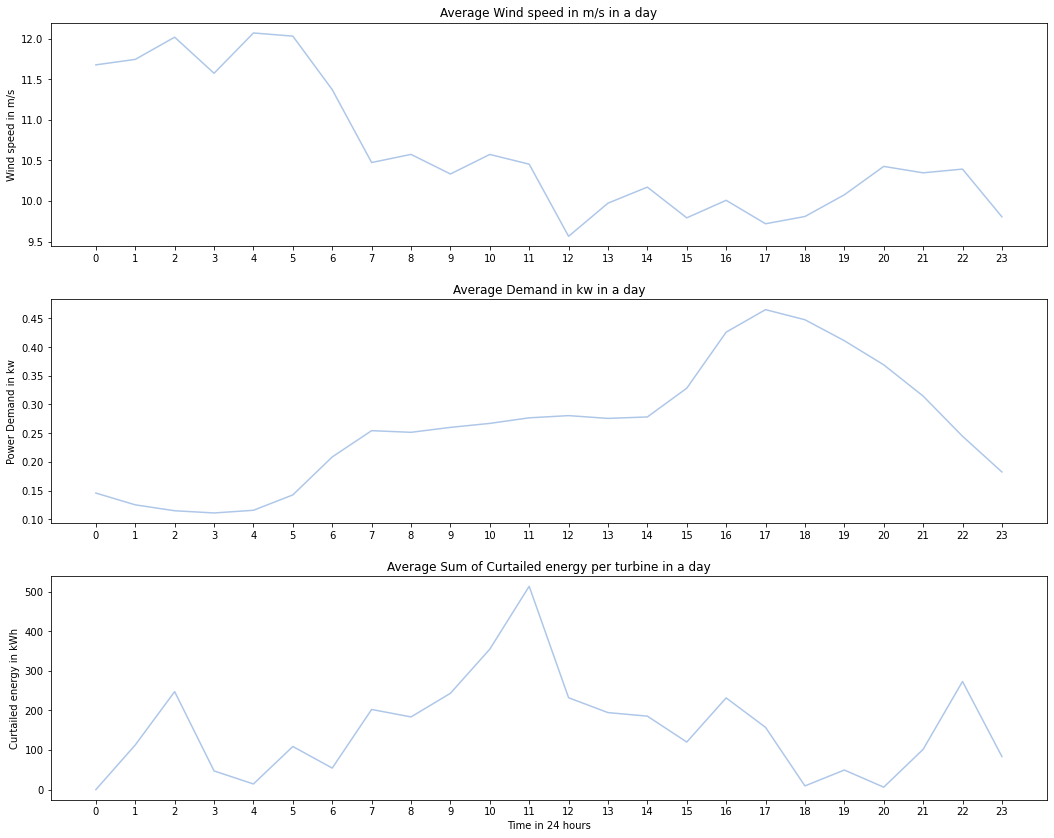

### 4.1.4 No significant impact of wind speed and demand on Setpoint
Our hypothesis of the impact of wind speed and demand on setpoint is rejected by the findings below.

As shown in Fig 4.8, setpoint only highly correlated with curtailed power attributes, which is for sure because curtailed attributes are calculated by Potential power - Setpoint. Other than curtailed power attributes, setpoint doesn't have a high correlation with any attributes such as wind speed and demand as stated in the hypothesis. In fact, their correlation is quite weak which rejected our hypothesis.

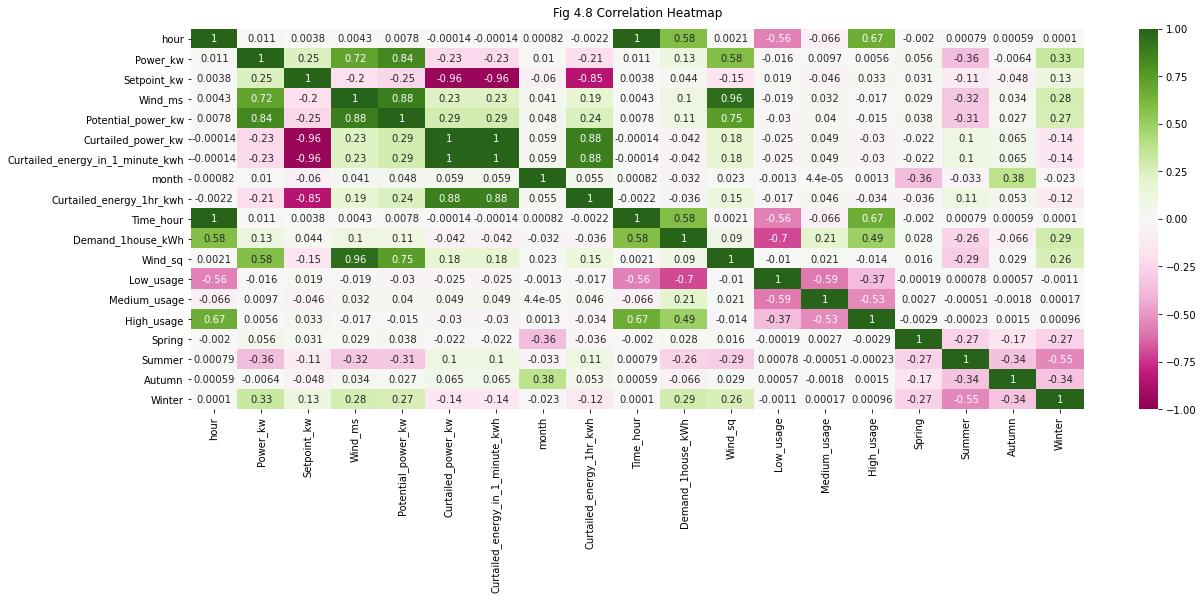

### 4.1.5 How much energy is currently curtailed annually across the Orkney Isles? 

The annual curtailment of 500 wind turbines was 265GWh and 125GWh in 2016 and 2017, respectively. This matches with our hypothesis 1 (There is sizable wasted power due to curtailment). The massive curtailment caused an average of 30+ million GBP revenue loss annually. 


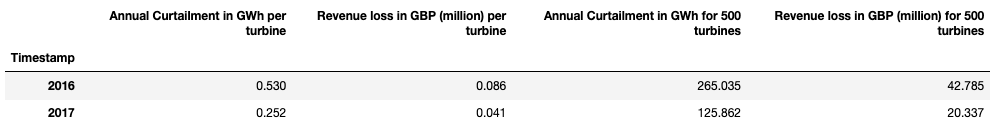

2017 values were half of 2016's. These huge differences could be due to two possible reasons.
1. Uncertainties in wind speed as we couldn't expect what happens in the nature
2. Somehow more usages in 2017 so actually generated more power

We couldn't foresee whether in the next few years it would continue to drop due to the second reason or have ups and downs due to the first reason, so we choose to take the average value as the denominator in the calculation of the percentage of curtailed energy in 5.5 analysis.

# 5. Discussion <a class="anchor" id="discussion"></a>

## 5.1 Summary of the overall trend of the findings
Firstly, the high average wind speed plus such a low electricty demand causes high curtailment thus high revenue loss. Secondly, sepoint has not significant correlation with other attributes, it is instead continuously controlled by the company depending on the grid demand. Last but not least, electricity demand is 2 times lower than Scotland average, residents probably use more power sources other than electricity, this implies opportunity on shifting gas energy to wind energy demand. 

## 5.2 Was the initial hypothesis correct?
The initial hypotheses about size of curtailment and wind condition is correct. Due to the geographical location, Orkney is the number 2 windiest part of the UK, 67% of the records were more than 7m/s. 

However, the correlation of wind speed and demand on curtailed power or setpoint are insignificant. Through the heatmap in 4.1.4, we observed that the correlation index between these are very insignificant i.e. very close to 0. Possible reasons are randomness of natural winds and demand fluctuation.

## 5.3 An explanation of any errors
Any errors that were seen as part of applying the analysis were resolved by either replacing any missing values in the attributes with the appropriate replacements, or by dropping the records with missing values. Thus, no errors are currently present in the codes given in the Appendix section.

## 5.4 Strengths and Limitations of the Analysis
#### Strengths
Firstly, the original data sets are clean and accurate enough with not much huge impact outliers. Without much data cleaning, an accurate business model could be derived. Secondly, daily electricity demands were so low that we could be quite sure that residents were using very much energy resources other than electricity, thus we've opportunities to shift energy usage to green wind energy with high discount value.

#### Limitations
Temperature and more weather records could be included for more correlation analysis and model prediction of setpoint and curtailment. With a precise model, it would be much easier and more accurate to predict seasonal curtailment and create even better penetration plan base on different seasons. Besides, it would be useful if actual gas demand was also recorded for more precise estimation. A few more full year of data available is also helpful to average estimation less volatile.

## 5.5 How much can this be reduced by different levels of DR penetration? How many local households would need to be on our DR scheme in order to supply this level of DR?

We have 22,000 total households on Orkney as of 2017 (National Records of Scotland, n.d. [[8]](#Orkney-pop)), so the maximum households we can penetrate DR to is 22,000. In the trial period, we may want to start with fewer households i.e. 30 first to see if the DR devices cost could be covered in a few years.

Below table shows the average energy consumption and cost at Scotland (Jon Davies, 2019 [[1]](#average-electricity-gas-bills-in-2019)) :

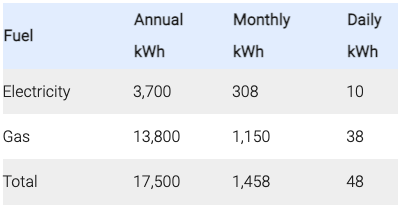

The average electricity monthly demand in Scotland is 308kWh, while Orkney was half of that (148kWh). The total energy consumption per household should not vary that much, therefore Orkney residents might be using far more gas than Scotland average. After installing DR devices, we could expect increase in demand to meet the Scotland average, and possibly also shift some gas usage to electricity, with the total overall energy usage unchanged.

We have several choices of power storage installation:
1. Battery storage for electricity energy:
    - CSE stated that 'On average installing a battery will cost £4,000-£8,000, with a useable capacity of 3.8-13.5 kWh' (CSE, n.d. [[3]](#avg-battery-storage-price)). Assume that to support daily usage of 5kWh (Orkney daily average) or 10kWh (Scotland daily average), we need a £5,000 or £6,500 battery storage respectively.
    
2. Storage heater to replace gas:
    - The storage capacity of a storage heater (Dimplex, n.d. [[4]](#storage-heater)) is 15.54kWh which can cover daily usage, costs £858.10. 
    - The energy needed exceeds daily average of demand per household (about 5kWh), so probably residents are using gas for heater, thus installing this could shift their energy usage from gas to wind. 

3. Hot water tank to replace gas:
    - A shower uses 8 litres per minute on average (CCW, n.d. [[5]](#shower-water-usage)). Assuming that all households have 3 residents, each of them take 10 minutes for a shower, they need 240 litres of hot water for shower per day. 240 litres of hot water needs 12.5kWh energy per day (Sust-it, n.d. [[6]](#water-heater-energy-calc)). 
    - A 210Ltrs 6kW immersion water heater (Shop4, n.d. [[7]](#water-heater)) costs £ 1,117.42. 
    - The energy needed for shower is 12.5kWh, which exceeds the daily average of demand per household (about 5kWh), so probably residents are using gas for hot water, thus installing this could shift their energy usage from gas to wind. 

##### How much gas could be shifted to wind energy through installing storage heater and hot water tank?
1. Assume storage heater annual usage 15.54kWh x 30 x 4 = 1864.8kWh (4 months winter usage)
2. Assume annual hot water usage 12.5kWh x 365 = 4562.5kWh
3. The maximum allowable gas shift is (1864.8 + 4562.5)/13800 = 46.6%
4. Becuase Feb total curtailed energy was particularly low in both 2016 and 2017, the curtailed energy will not be able to support full Feb heating usage, so the actaul gas shift percentage will be lower than 46.6% depends on the number of households joined the program.

We could also consider applying government subsidies on initial systems setup costs because our project helps carbon emission reduction which is one of the main focuses in upcoming decades. Therefore, for each of the below cases, we also have a subplan that include 10% government subsidy. 10% government subsidy is expected if successful because the UK number of CO2 in tons emission costs about 0.0148 GBP /kWh. Since variable portion of electricity price is 0.1613 GPB/kWh, it is roughly 10% impact in revenue.

Therefore, curtailment could be reduced further and calculated in following cases:
1. Installing battery storage (5kWh to meet Orkney demand)
    - Consumed energy kWh = Number of households x 5kW demands
2. Installing battery storage (10kWh to meet Scotland demand)
    - Consumed energy kWh = Number of households x 10kWh demands
3. Installing battery storage (10kWh) + storage heater + hot water tank
    - Consumed energy kWh = Number of households x (10kWh + 15.54kWh + 12.5kWh)
    - When the calculated total consumed energy is greater than total curtailed energy in that month, total consumed energy is set to total curtailed energy
4. Installing storage heater + hot water tank
    - Consumed energy kWh = Number of households x (15.54kWh + 12.5kWh)
    - When the calculated total consumed energy is greater than total curtailed energy in that month, total consumed energy is set to total curtailed energy
    
After DR rollout and if proved demand could increase after 1 year trial, we could start charging customers. If the cost could be compensated within 6 years of trial (5 years after charging), we'll go for the plan. 

6 years as the optimal payback period as we've assumed in session 3.1 that devices are simple and maintenance free up to its life cycle of 10 years. In the rest of operating period after the payback period, whole revenue becomes profit as is because initial investment was already covered and no other costs are incurred. Therefore, once we proved that 6 years is the payback period, we'll use that plan to draft a 10 year plan to see if the profit is appealing.

According to Switch plan, gas and electricity cost the same (Switch Plan, 2021 [[9]](#Orkney-power-costs)), and we'll use the same cost in below models.

### 5.5.1 Plan A: installing 5kWh battery storage
This is not profitable in 6 years, thus we don't suggest this direction.

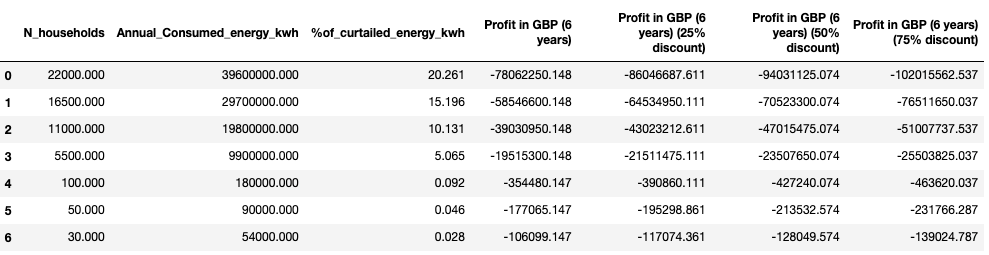

#### Plan A With 10% government subsidy
This is not profitable in 6 years, thus we don't suggest this direction.

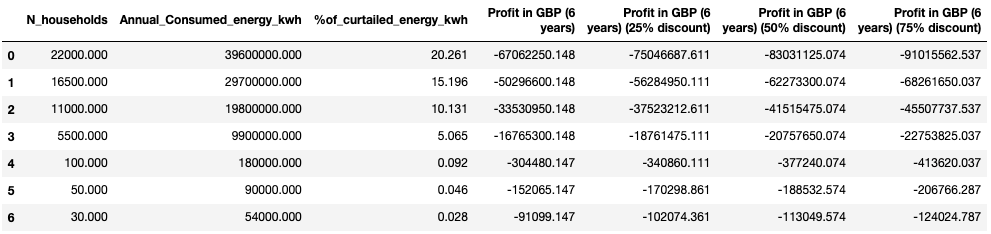

### 5.5.2 Plan B: installing 10kWh battery storage
This is not profitable in 6 years, thus we don't suggest this direction.

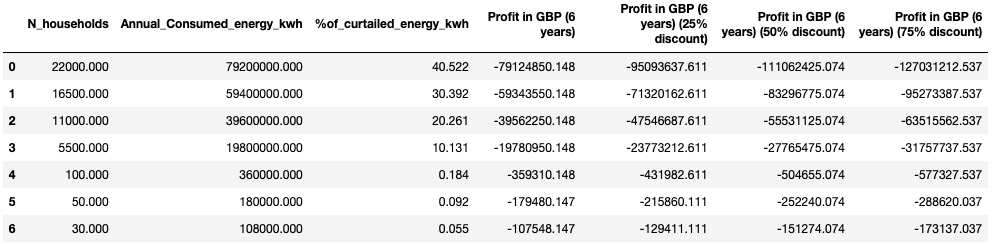

#### Plan B with 10% government subsidy
This is not profitable in 6 years, thus we don't suggest this direction.

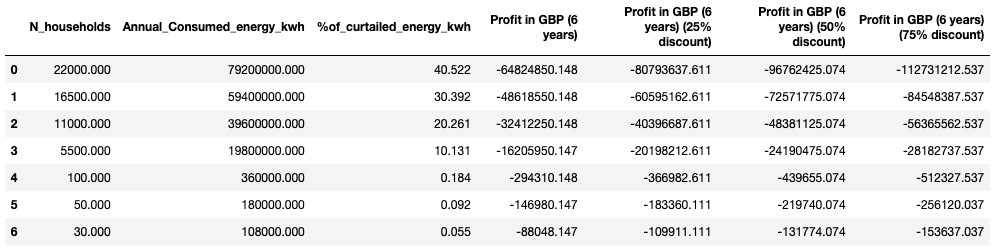

### 5.5.3 Plan C: installing 10kWh battery storage + storage heater + hot water tank
This is not profitable in 6 years, thus we don't suggest this direction.

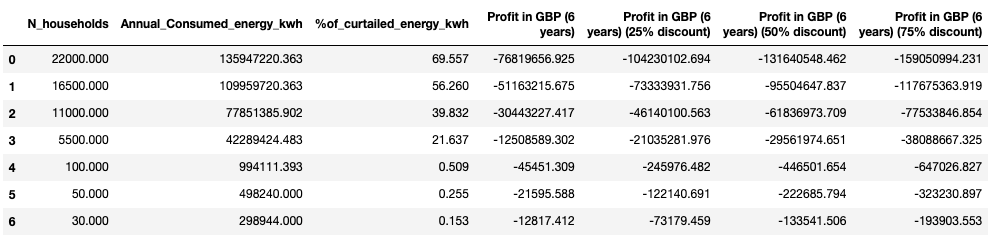

#### Plan C with 10% government subsidy
This profitable in 6 years just for small number of households and charge with full price, thus we don't suggest this direction.

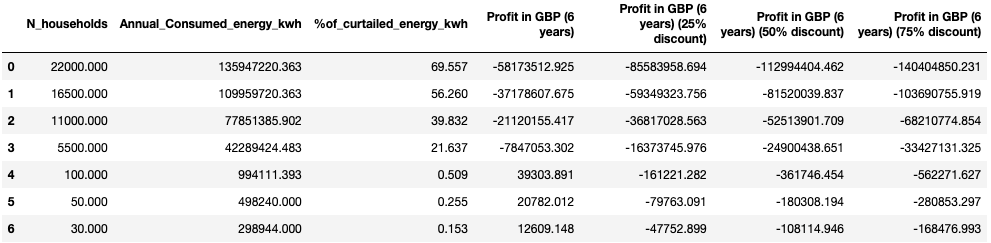

### 5.5.3 Plan D: installing storage heater + hot water tank
Among all four plans, this is the only plan that is profitable in 6 years, and can do even with 35% discount. With higher discount value, more households are willing join the program. Therefore, in the DR trial, we should target to replace gas demands by installing storage heater with 15.54kWh capacity, and 210Ltrs 6kW hot water tank, with total cost per household around £1,975.52. Once we proved during trial period of 30 households demands increased and consumed expected amount of energy, we could rollout this plan to more households to use up more curtailed energy. This supports our hypothesis (3).

Moreover, even if DR penetrates into all residents (22000 households), the total consumed energy is just 45% of annual curtailed energy. Because our estimation is based on 3 households home size, and each house install just one of each appliances, we could further increase the energy usage by installing more or bigger capacity appliances in one house according to their real usage after proving that customer demand do increase through our trial. 

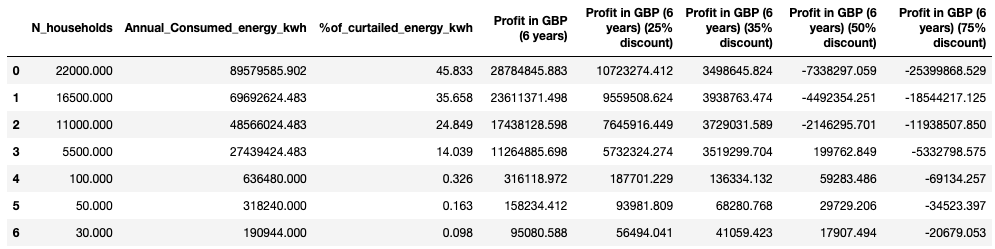

#### Plan D with 10% government subsidy
Plan D is the best plan, and could be even better if the government could sponsor 10% costs.

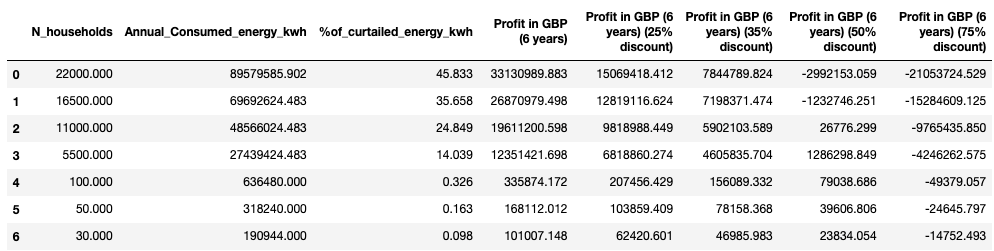

Assume we go for this plan, with 30 households in 1-year trial, and in 2nd year target to rollout to 100 more households, and start charging with 35% discount (in total 130 households, 3 residents in each).

Also, for easier calculation and understanding, we assume no earning in the first year of installations because installations are not done within 1 or 2 days, it would take months. Therefore, we only count earning from the 2nd year.

With the above assumptions, our total revenue of 130 households in 6 years will be:

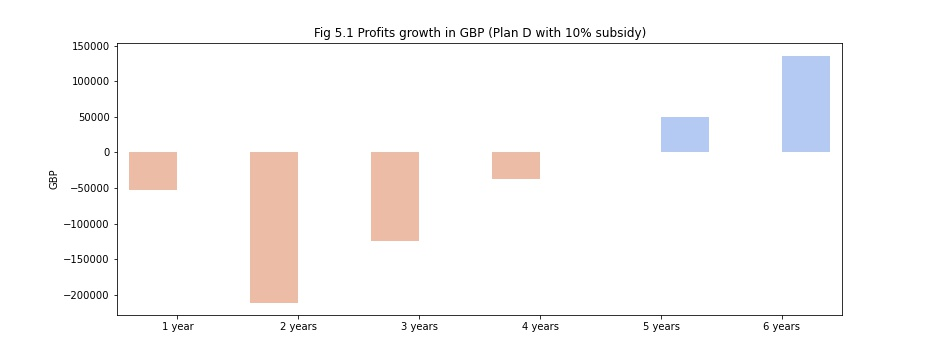

Payback period is just 5 years. 

Next, we drafted a 10-year plan for long run. Assume that number of households willing to join the plan grow gradually, so after the trial we can acheive 100 households, then 500, 2000 and 4000. We should not add further households after the 5th year because the payback period is 5 years, we won't see the total payback in 10 years. Below table and barchart demostrated the breakdown of yearly profit and cumulative profit. Year 8 is the payback year and then in just 2 more years, cumulative profit is 7 millions. 

#### Why this plan will work?
1. Households are benefited from 35% off energy cost
2. 16% of curtailed energy are used up if we introduce this to 6630 households in total in 5 years
3. 7 millions GBP profit in 10 years can be split between the wind generator and the DR solution supplier

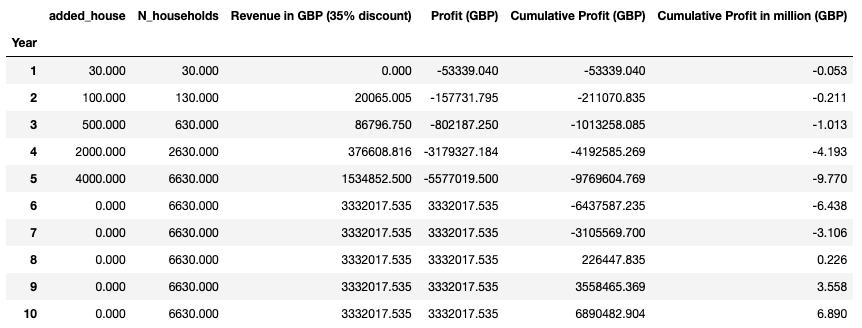

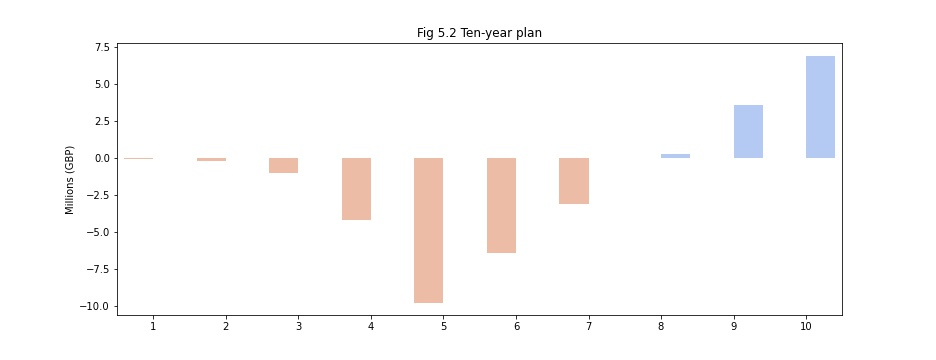

# 6. References <a class="anchor" id="references"></a>

<a id='average-electricity-gas-bills-in-2019'></a>
1. Jon Davies. (2019) Average Electricity & Gas Bills In 2019. Available from: https://great-home.co.uk/average-electricity-gas-bills-in-2019/ [Accessed 5th Sep 2021]
<a id='windiest-parts-of-UK'></a>
2. Met Office. (n.d.) Where are the windiest parts of the UK. Available from: https://www.metoffice.gov.uk/weather/learn-about/weather/types-of-weather/wind/windiest-place-in-uk [Accessed 5th Sep 2021]
<a id='avg-battery-storage-price'></a>
3. CSG. (n.d.) Installation and return on investment. Available from: https://www.cse.org.uk/advice/renewable-energy/battery-storage [Accessed 9th Sep 2021]
<a id='storage-heater'></a>
4. Dimplex. (n.d.) Quantum HHR Storage Heater. Available from: https://www.dimplex.co.uk/product/quantum-hhr-storage-heater [Accessed 9th Sep 2021]
<a id='shower-water-usage'></a>
5. CCW. (n.d.) Shower. Available from: https://www.ccwater.org.uk/households/using-water-wisely/averagewateruse/ [Accessed 9th Sep 2021]
<a id='water-heater-energy-calc'></a>
6. Sust-it. (n.d.) Electric Immersion Water Heater Running Costs Calculator. Available from: https://www.sust-it.net/immersion-heater-energy-calculator.php [Accessed 9th Sep 2021]
<a id='water-heater'></a>
7. Shop4. (n.d.) Heatrae Sadia 95.050.468 Megaflo Eco 210DD White Stainless Steel Direct Unvented Cylinder Style Water Heater With 2 x 3kW Immersion Elements 210Ltrs 6kW. Available from: https://www.shop4-waterheaters.co.uk/product.php/393405286/heatrae_sadia_95_050_468_megaflo_eco_210dd_white_stainless_steel_direct_unvented_cylinder_style_water_heater_with_2_x_3kw_immersion_elements_210ltrs_6kw?search_query=Megaflo+210+ltrs&results=75 [Accessed 9th Sep 2021]
<a id='Orkney-pop'></a>
8. National Records of Scotland. (n.d.) Total population, Orkney Islands, 1998-2019. Available from: https://www.nrscotland.gov.uk/files/statistics/council-area-data-sheets/orkney-islands-council-profile.html#table_pop_est [Accessed 9th Sep 2021]
<a id='Orkney-power-costs'></a>
9.  Switch Plan. (2021) Scottish Power plans and tariffs in Orkney. Available from: https://www.switch-plan.co.uk/suppliers/scottish-power/orkney/ [Accessed 5th Sep 2021]
<a id='wind-turbine-calculation'></a>
10. The Royal Academy of Engineering. (n.d.) Wind Turbine Power Calculations RWE npower renewables. Available from: https://www.raeng.org.uk/publications/other/23-wind-turbine [Accessed 30th Aug 2021]
<a id='OLS'></a>
11. Dudley L. Poston Jr. (n.d.) Ordinary Least Squares Regression. Available from: https://www.encyclopedia.com/social-sciences/applied-and-social-sciences-magazines/ordinary-least-squares-regression [Accessed 11th Sep 2021]

# 7. Appendix <a class="anchor" id="appendix"></a>

## 7.1 Data import

### 7.1.1 Importing residential_demand.csv 
The dataset residential_demand.csv is successfully imported and named df_demand. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# stop warning messages
import warnings
warnings.filterwarnings('ignore')

# show full number, not scientific
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df_demand = pd.read_csv('residential_demand.csv',parse_dates=['Timestamp'], infer_datetime_format= True)
df_demand.head(3)

Timestamp  Demand_mean_kw  N_households
0 2017-01-01 00:00:00           0.220          5428
1 2017-01-01 00:30:00           0.206          5429
2 2017-01-01 01:00:00           0.189          5429

In [3]:
# To check any null data
df_demand.isnull().describe()

Timestamp Demand_mean_kw N_households
count      17568          17568        17568
unique         1              1            1
top        False          False        False
freq       17568          17568        17568

In [4]:
# To check any 0 data
df_demand.describe()

Demand_mean_kw  N_households
count       17568.000     17568.000
mean            0.219      8630.642
std             0.090      2999.142
min             0.087      5406.000
25%             0.144      6781.000
50%             0.212      8190.500
75%             0.274      9652.000
max             0.510     30037.000

### 7.1.2 Importing turbine_telemetry.csv
The wind turbine power generation dataset turbine_telemetry.csv is imported and named df_supply.

In [5]:
df_supply = pd.read_csv('turbine_telemetry.csv',parse_dates=['Timestamp'], infer_datetime_format= True)
df_supply.head(3)

Timestamp  Power_kw  Setpoint_kw  Wind_ms
0 2015-05-28 00:00:23    80.000      900.000    4.900
1 2015-05-28 00:01:23    78.000      900.000    5.400
2 2015-05-28 00:02:23    52.000      900.000    4.900

In [6]:
# To check any null data
# 2 unique values mean True and False exists in checking null, thus null exists.
df_supply.isnull().describe()

Timestamp Power_kw Setpoint_kw  Wind_ms
count    1069636  1069636     1069636  1069636
unique         1        2           2        2
top        False    False       False    False
freq     1069636  1066934     1066921  1066931

In [7]:
# To check any 0 data shown
# Min get a zero value means 0 data exists.
df_supply.describe()

Power_kw  Setpoint_kw     Wind_ms
count 1066934.000  1066921.000 1066931.000
mean      367.187      810.658       9.955
std       339.964      261.507       5.454
min         0.000        0.000       0.000
25%        51.000      900.000       6.100
50%       251.000      900.000       9.000
75%       704.000      900.000      12.400
max       938.000      900.000      47.200

## 7.2 Visualising raw data see any obvious trends or missing data

### 7.2.1 Households demands (df_demand)

In [8]:
# Becuase the recorded time is the end of the time, Timestamp -1s to correct the hour of measurment
df_demand.Timestamp = df_demand.Timestamp - dt.timedelta(seconds=1)

# Becuase 2016 only have one data, we ignore this.
df_demand = df_demand[df_demand.Timestamp.dt.year != 2016]
df_demand.head(3)

Timestamp  Demand_mean_kw  N_households
1 2017-01-01 00:29:59           0.206          5429
2 2017-01-01 00:59:59           0.189          5429
3 2017-01-01 01:29:59           0.173          5429

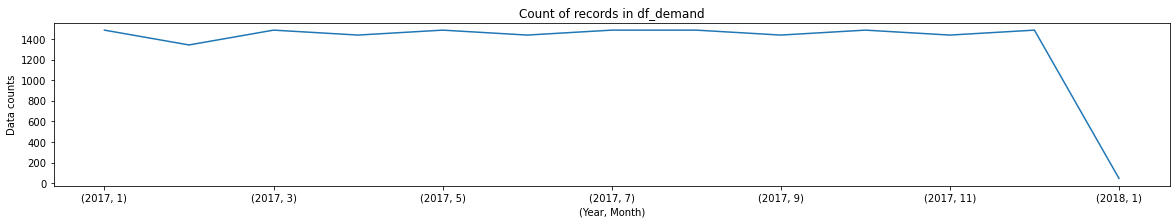

In [9]:
# check if number of data is constant in all months
# constant in all months except 2018. So we'll ignore 2018 in analysis.
df_demand.groupby([df_demand.Timestamp.dt.year,df_demand.Timestamp.dt.month]).count().iloc[:,:1].plot(figsize=(20,3), legend=None)
plt.ylabel('Data counts')
plt.xlabel('(Year, Month)')
plt.title('Count of records in df_demand')
plt.show()

In general, most households need 0.2-0.3kW and around 0.1 kW per minute throughout the year. Two dinstinct level of demands could possibly due to demands during different hours in a day. During midnights, 0.1kW demand becuase they're sleeping. While during dinner time that everyone back to home after work or school, 0.2-0.3kW needed for meals preparation, heaters, lights and hot water etc. 

From below figure, it shows that demand in Jan (coldest days in winter) is highest, and dropped constantly until Jul and Aug (hottest days in summer), then rose again and reached highest in Jan. Higher electricity needs could be related to  heater operations during cold hours.

Monthly demand per household is the highest in Winter (395kW) and lowest in Summer (270kW, 32% less). This again, is reasonable due to more electricity for heaters and lightings required during winter.

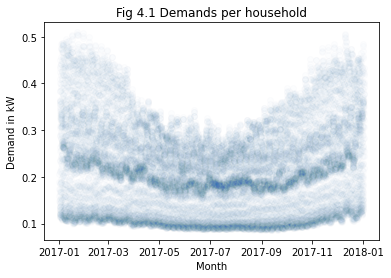

In [10]:
plt.scatter(df_demand['Timestamp'] , df_demand['Demand_mean_kw'], alpha=0.01)
plt.title('Fig 4.1 Demands per household')
plt.xlabel('Month')
plt.ylabel('Demand in kW')

plt.savefig('./img/Fig 4.1 Demands per household scatter.jpg')
plt.show()

In [11]:
print('Average demand during 0am-5am: ',df_demand[df_demand.Timestamp.dt.hour.isin(np.arange(0,6))].mean()[0])
print('Average demand during 6am-7am: ',df_demand[df_demand.Timestamp.dt.hour.isin(np.arange(6,8))].mean()[0])
print('Average demand during 8am-3pm: ',df_demand[df_demand.Timestamp.dt.hour.isin(np.arange(8,16))].mean()[0])
print('Average demand during 4pm-5pm: ',df_demand[df_demand.Timestamp.dt.hour.isin(np.arange(16,18))].mean()[0])
print('Average demand during 6pm-11pm: ',df_demand[df_demand.Timestamp.dt.hour.isin(np.arange(18,24))].mean()[0])

Average demand during 0am-5am:  0.11690719932291514
Average demand during 6am-7am:  0.21526142114697733
Average demand during 8am-3pm:  0.2338015407337872
Average demand during 4pm-5pm:  0.3497033189065092
Average demand during 6pm-11pm:  0.2594064493140798


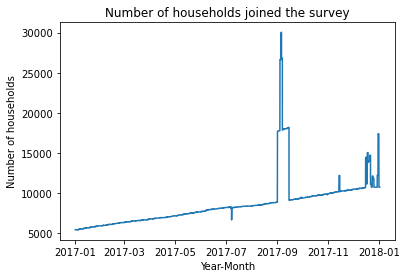

In [12]:
plt.plot(df_demand['Timestamp'] , df_demand['N_households'])
plt.ylabel('Number of households')
plt.xlabel('Year-Month')
plt.title('Number of households joined the survey')
plt.show()

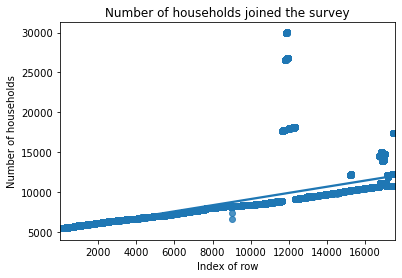

In [13]:
sns.regplot(df_demand.index , df_demand['N_households'])
plt.ylabel('Number of households')
plt.xlabel('Index of row')
plt.title('Number of households joined the survey')
plt.show()

#### These 4 spikes / outliers data of number of households:
1. Number of households <8000 in 2017-07
2. Number of households >15000 in 2017-09
3. Number of households >10500 in 2017-11
4. Number of households >11000 in 2017-12

But since the number of households are just sample data who participtated in the survey, as long as the average demand has no out liers, the dataset is good to use. We can also assume that total number of households in 2017 is 22,000 on the island according to the governement figure (National Records of Scotland, n.d. [[8]](#Orkney-pop)) and use this figure for our analysis.

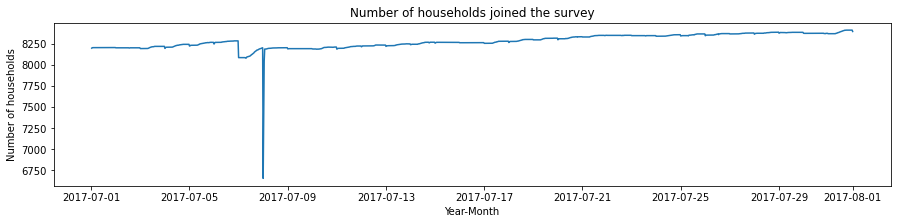

In [14]:
n=7
plt.figure(figsize=(15,3))
plt.plot(df_demand[df_demand['Timestamp'].dt.month == n]['Timestamp'], df_demand[df_demand['Timestamp'].dt.month == n]['N_households'])
plt.ylabel('Number of households')
plt.xlabel('Year-Month')
plt.title('Number of households joined the survey')
plt.show()

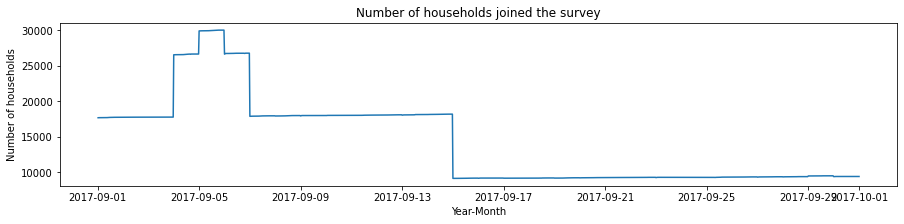

In [15]:
n=9
plt.figure(figsize=(15,3))
plt.plot(df_demand[df_demand['Timestamp'].dt.month == n]['Timestamp'], df_demand[df_demand['Timestamp'].dt.month == n]['N_households'])
plt.ylabel('Number of households')
plt.xlabel('Year-Month')
plt.title('Number of households joined the survey')
plt.show()

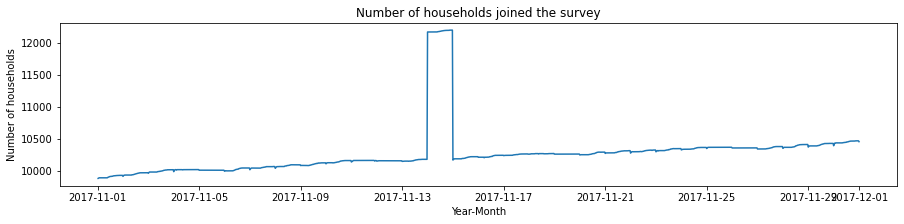

In [16]:
n=11
plt.figure(figsize=(15,3))
plt.plot(df_demand[df_demand['Timestamp'].dt.month == n]['Timestamp'], df_demand[df_demand['Timestamp'].dt.month == n]['N_households'])
plt.ylabel('Number of households')
plt.xlabel('Year-Month')
plt.title('Number of households joined the survey')
plt.show()

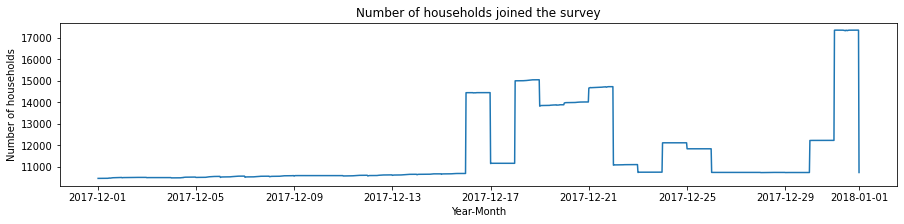

In [17]:
n=12
plt.figure(figsize=(15,3))
plt.plot(df_demand[df_demand['Timestamp'].dt.month == n]['Timestamp'], df_demand[df_demand['Timestamp'].dt.month == n]['N_households'])
plt.ylabel('Number of households')
plt.xlabel('Year-Month')
plt.title('Number of households joined the survey')
plt.show()

## 7.2.2 Wind turbines generation (df_supply)

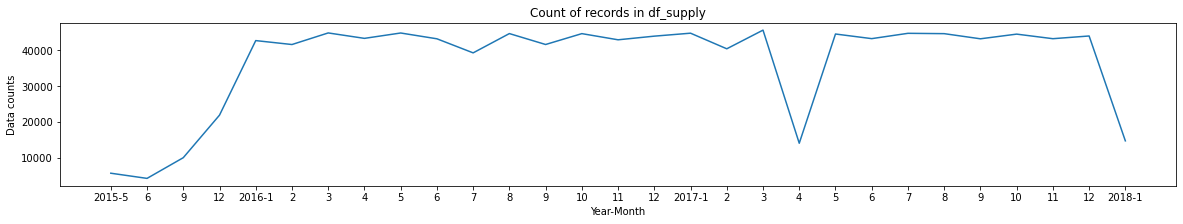

In [18]:
# check if number of data is constant in all months
# constant in all months except Apr 2017
# 2015 data not enough for analysis, we'll drop these when needed
df_supply.groupby([df_supply.Timestamp.dt.year,df_supply.Timestamp.dt.month]).count().iloc[:,:1].plot(figsize=(20,3), legend = None)

xticks = ['2015-5', 6, 9, 12, 
          '2016-1', 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 
          '2017-1', 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 
          '2018-1']

plt.title('Count of records in df_supply')
plt.xticks(np.arange(len(xticks)), xticks)
plt.xlabel('Year-Month')
plt.ylabel('Data counts')
plt.show()

For simplicity and conservative estimation, missing data in Apr 2017 was not corrected in our analysis not inferring more curtailed energy should have been available.

Below we plotted the scatter plot matrix between variables. The main findings are:
- Wind turbine hit the maximum design limit of 900kW at around 11-12m/s.
- Wind turbine seemed to be commanded shut-down beyond 30m/s wind. 
- There are two peak in generated power one in <100kW and another at 900kW. 
- There are transient data included not following setpoint where Power_kw > Setpoint_kw.
- Setpoint is set at 900kW at most of the time, but sometimes it was lowered (curtailment). 
- Wind of 5-15m/s is mostly frequent.  


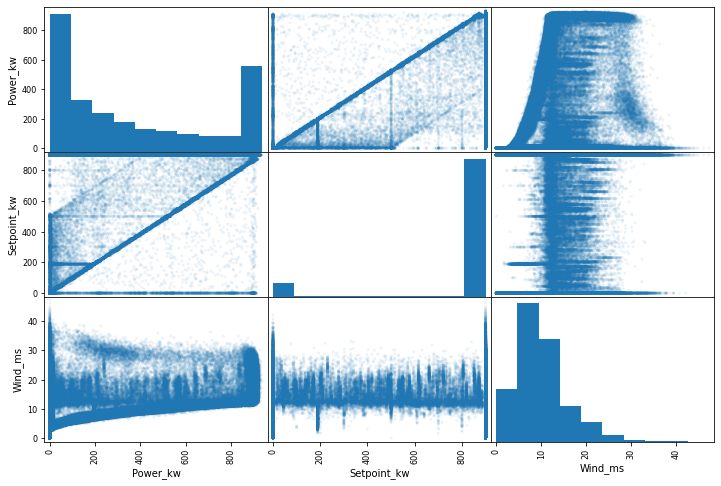

In [19]:
from pandas.plotting import scatter_matrix

#----------------------------------
#draw a scatterplot to look at the relationship of each variables
d=scatter_matrix(df_supply, figsize=(12,8),alpha=0.08)

Below scatterplot shows the power generation pattern. From the plot, we found missing data in 2015 and Apr 2017. In 2015, too few data for analysis so we'll simply drop all 2015 data in plotting some graphs later. Almost whole Apr 2017 data is missing, but since we have Apr 2016 data and the seaonsal pattern doesn't varies much, we could always choose to use 2016 data for the trend analysis when needed, therefore, the missing data won't pose huge problem on our analysis. Same case for missing data in Oct 2016.

Despite the missing data, it is observed that wind turbine generated 0-400 kW during summer (May - Sep) and 900 kW during winter (Nov-Feb). This matches with the demand pattern which has higher demand in winter and lower in summer.

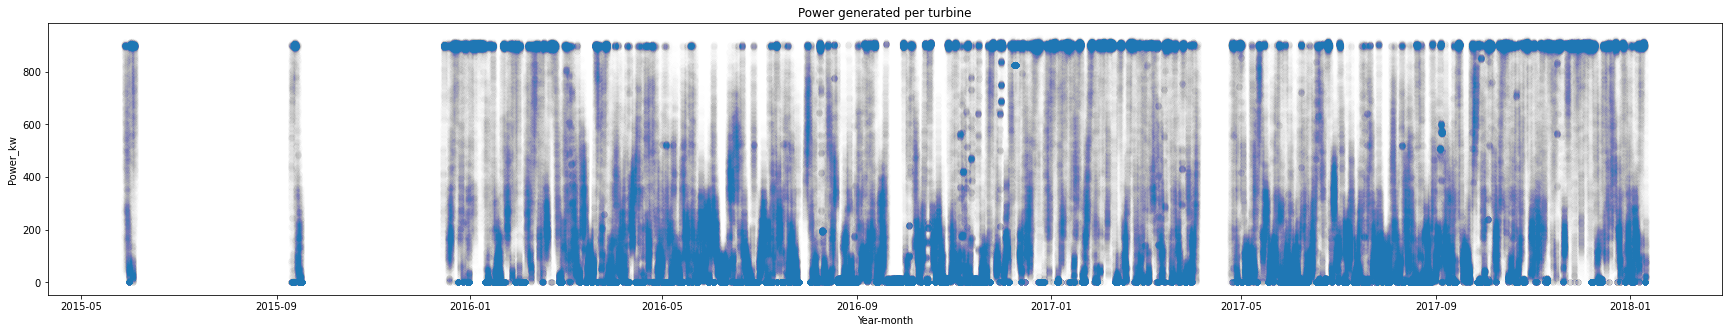

In [20]:
#----------------------------------
#draw a scatterplot to look at the power generation pattern

plt.figure(figsize=(30,5))
plt.scatter(df_supply['Timestamp'], df_supply['Power_kw'], alpha = 0.005)
plt.ylabel('Power_kw')
plt.xlabel('Year-month')
plt.title('Power generated per turbine')

plt.show()

Set point per turbine scatterplot below shows us that most of the time setpoint is 900kW. 

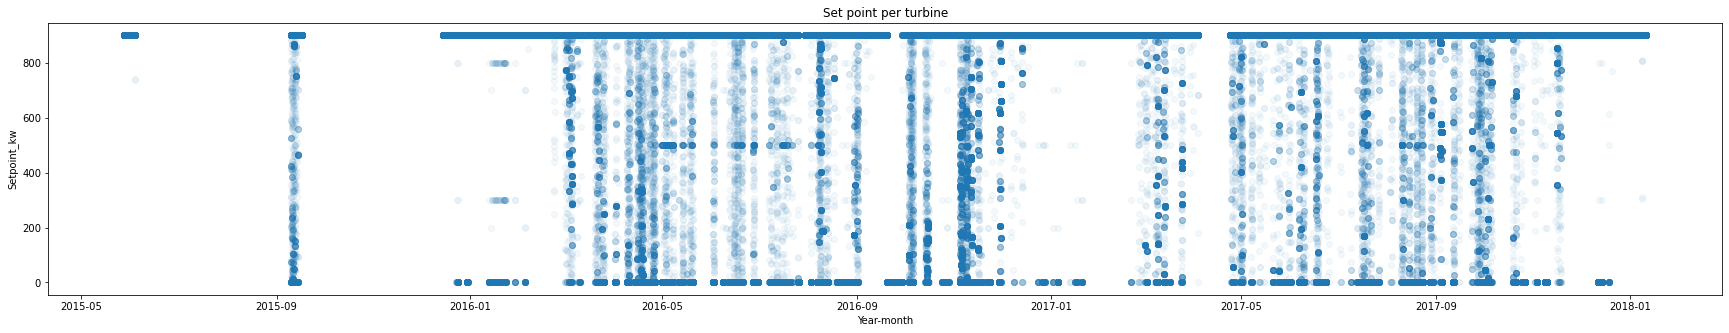

In [21]:
plt.figure(figsize=(30,5))
plt.scatter(df_supply['Timestamp'], df_supply['Setpoint_kw'], alpha = 0.05)
plt.ylabel('Setpoint_kw')
plt.xlabel('Year-month')
plt.title('Set point per turbine')

plt.show()

According to Metoffice statistics, Orkney is one of the top windiest parts in the UK. (Met Office, n.d. [[2]](#windiest-parts-of-UK))

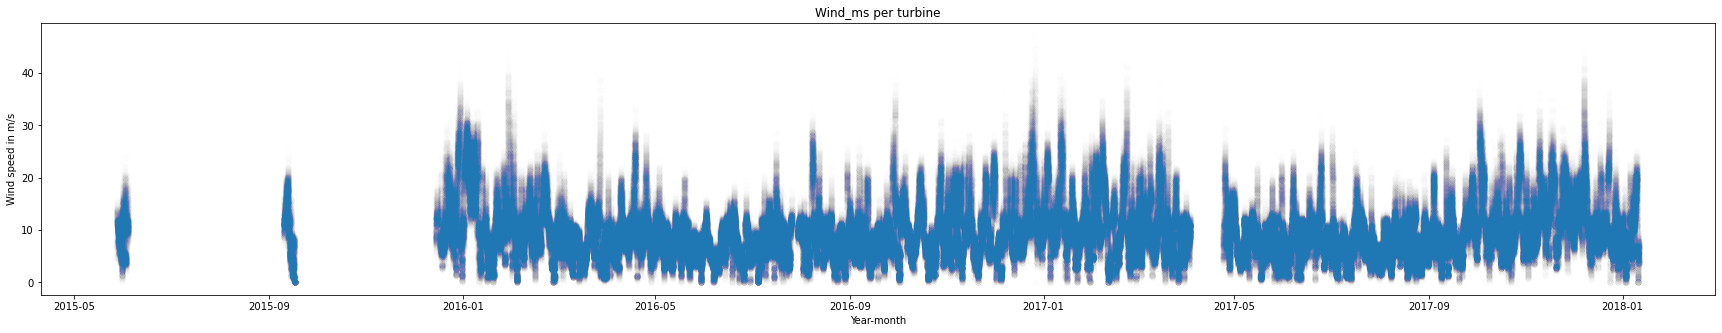

In [22]:
plt.figure(figsize=(30,5))
plt.scatter(df_supply['Timestamp'], df_supply['Wind_ms'], alpha = 0.003)
plt.xlabel('Year-month')
plt.ylabel('Wind speed in m/s')
plt.title('Wind_ms per turbine')

plt.show()

In [23]:
# 66% of record show wind speed >= 7m/s
tmp = pd.DataFrame(columns=['%'])
tmp.loc['Wind speed < 7m/s'] = len(df_supply[df_supply['Wind_ms'] < 7])/len(df_supply)
tmp.loc['Wind speed 7-25m/s'] = len(df_supply[df_supply['Wind_ms'] >= 7][df_supply['Wind_ms'] <= 25])/len(df_supply)
tmp.loc['Wind speed > 25m/s'] = len(df_supply[df_supply['Wind_ms'] > 25])/len(df_supply)

tmp

%
Wind speed < 7m/s  0.319
Wind speed 7-25m/s 0.662
Wind speed > 25m/s 0.016

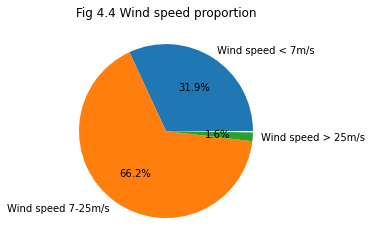

In [24]:
# pie chart here
plt.pie(tmp['%'], labels=tmp.index, autopct='%1.1f%%')
plt.title('Fig 4.4 Wind speed proportion')
plt.savefig('./img/Fig 4.4 Wind speed proportion.jpg')
plt.show()

#### 7.2.2.1 Check the trends again after cleaning data
Looks good as the overall trend remains.

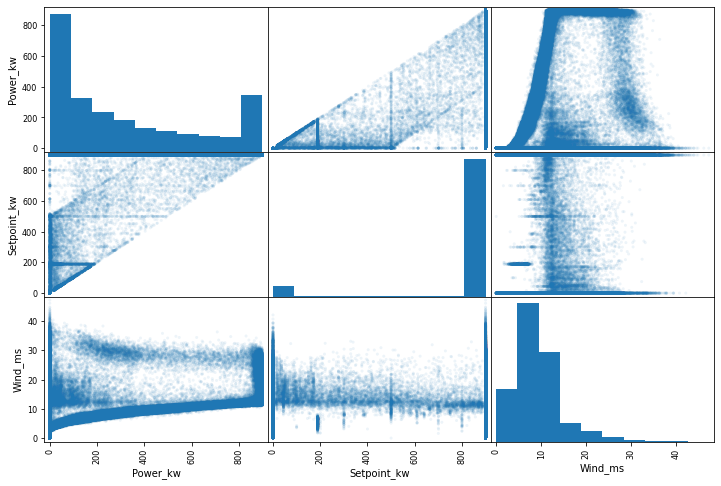

In [25]:
# drop all NA 
# drop all power kW > setpoint kW

df_supply = df_supply.dropna()[df_supply.Power_kw <= df_supply.Setpoint_kw]
d=scatter_matrix(df_supply, figsize=(12,8),alpha=0.08)

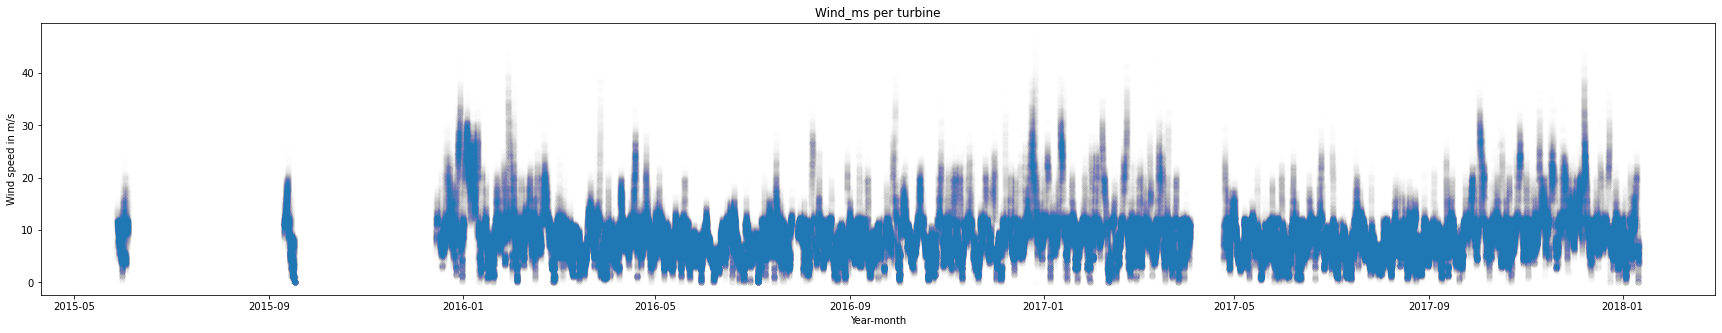

In [26]:
plt.figure(figsize=(30,5))
plt.scatter(df_supply['Timestamp'], df_supply['Wind_ms'], alpha = 0.003)
plt.xlabel('Year-month')
plt.ylabel('Wind speed in m/s')
plt.title('Wind_ms per turbine')

plt.show()

## 7.3 Choosing blade length for potential power calculation

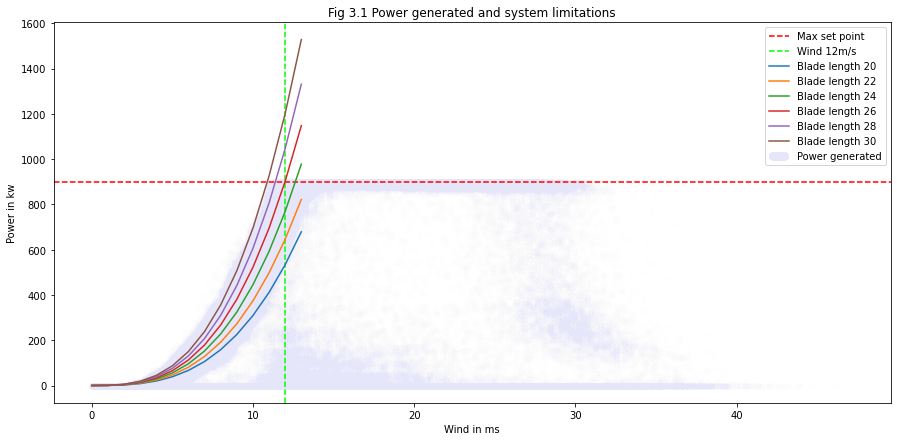

In [27]:
plt.figure(figsize=(15,7))

plt.scatter(df_supply['Wind_ms'],df_supply['Power_kw'], alpha=0.005, label='Power generated', color='lavender')
plt.axhline(y=900, color='r', linestyle='--', label='Max set point')
plt.axvline(12, color='lime', linestyle='--', label='Wind 12m/s')

# potential power curve
w = np.array(range(0,14)) # wind speed
length = range(20,31,2) # blade length in m
for l in length:
    potential_power=0.5*1.23*(np.pi*l**2)*(w**3)*0.4/1000
    plt.plot(potential_power, label='Blade length '+str(l))
    
plt.xlabel('Wind in ms')
plt.ylabel('Power in kw')
plt.title('Fig 3.1 Power generated and system limitations')
plt.legend(scatterpoints=1000)

plt.savefig('./img/Fig 3.1 Power generated and system limitations.jpg')
plt.show()

### 7.3.1 Curtailed power (kW)

#### What is curtailed power?
In layman's word with drawing analogy from water usage, power is water flow rate or $how\ strong$ water current is while energy is $how\ much$ water used, stored, and collected. So prior to calculating curtailed energy, we need to calculate curtailed power at first.

Curtailed power in wind turbine business is unused hidden capacity which cannot be used unfortunately. It could happen anytime because of random feature of mother nature and power balance between local grid demand and potential power. If wind velocity is high enough, potential power becomes 900kW, but if power demand is very low for some reason, a grid control center will send a command of lowering setpoint of the turbines to match the generation and consumption at point in time. Therefore, gap (or residual capacity) between potential power and setpoint is considered as curtailed power.  

#### Curtailed power equation
Curtailed power (kW) = Potential power (kW) - Setpoint (kW)

,where Potential power (kW) in terms of single turbine = 0.5 x 1.23 x (pi x 26^2) x wind speed^3 x 0.4 / 1000

In this case study, because setpoint of the turbine indicates whether the turbine is being forcibly curtailed by the setpoint commanded by the network operator, we used the above formula. 

Another alternative we conceived in the early stage of the study was: Curtailed power(kW) = Potential power kW - Total power generated (Power_kw). But considering that transient data were included in the turbine telemetry dataset, which could result in either overestimation or underestimation of the curtailment, we adopted the above formula.

### 7.3.2 Curtailed energy (kWh)

#### What is curtailed energy?
It stands for how $much$ energy was actually curtailed. We are interested in curtailed energy, not curtailed power because electricity provider charge us in terms of energy, not power.

- Energy: aggregate to area in time chart

#### Curtailed energy equation
Curtailed energy in one minute (kWh) = curtailed power(kW) x 0.278 x 10^-3 (=1hour/3600sec) x 60sec

Since energy is accumulation of every instant value of power, mathematically integral of power or calculating area under power curve, curtailed energy needs to be aggreagated from curtailed power. As the original turbine telemetry dataset stores operating data at 1-minute interval, curtailed energy is at first accumulated for one minute which means that a certain curtailed power at a certain time is interpreted as it lasted for one minute. The simplest understanding of the conversion is that curtailed power(kW) x 1hour is expected amount of curtailed energy(kWh) in 1 hour if the instant value does continulusly last for 1 hour, but here we want to calculate more granular curtailed energy of 60seconds, therefore, it is divided by 3600sec and multiplied back by 60seconds to make it 1-minute accumulated curtailed energy. Then the 1-minute curtailed energy can be used for further sum to 1month, 1year curtailed energy for the purposes of the analysis.     

### 7.3.3 Curtailment computation
Data used:
- df_supply: Drop all NA and Power_kw > Setpoint_kw
- Energy supply and demand should be quite constant in particular months across year, summer months should have less wind than winter months. Therefore, it is alright to have different years of supply and demand data, we can take the averages by months regardless year for curtailment calculation when needed.

A new dataset created (df_curtail) with below columns:
- Timestamp: the datatime in UTC of the measurement (the timestamp is situated at the end of the measurement period)
- Power_kw: average power in kW during the measurement period
- Setpoint_kw: the mean maximum-allowed generator output during the measurement period
- Wind_ms: mean wind speed at the turbine during the measurement period.
- Potential_power_kw: potential energy of single turbine = 0.5 x 1.23 x (pi x 26^2) x wind speed ^3 x 0.4 / 1000
    - Maximum must be 900kW. 
        - It cannot achieve a speed of 200km/h with kids bicycle. Any hardware has a certain limit by design.
        - In this case, 900kW is the limit. Therefore, to protect turbine, setpoint cannot be set beyond 900kW. 
        - Resultantly, we cannot count on potential power beyond 900kW.  
- Curtailed_power_kw: potential power - Setpoint_kw 
- Curtailed_energy_in_1_minute_kwh:	Aggregated power for 1 minute with " curtailed power(kW) x 0.278 x 10^-3 x 60sec ". 

In [28]:
df_curtail = df_supply[:]

# Calculate Potential power
df_curtail['Potential_power_kw'] = 0.5*1.23*np.pi*26**2*(df_curtail['Wind_ms']**3)*0.4/1000
# set potential power > 900 as 900
df_curtail['Potential_power_kw'][df_curtail['Potential_power_kw'] > 900] = 900

# Calculate Curtailed power kW
df_curtail['Curtailed_power_kw'] = df_curtail['Potential_power_kw'] - df_curtail['Setpoint_kw']

# set negative curtailment to 0
df_curtail['Curtailed_power_kw'][df_curtail['Curtailed_power_kw'] < 0] = 0 

# Assumed no curtailment when setpoint = 900
df_curtail['Curtailed_power_kw'][df_curtail['Setpoint_kw'] == 900] = 0 

# Assumed no curtailment when wind velocity is beyond 30m/s
df_curtail['Curtailed_power_kw'][df_curtail['Wind_ms'] > 30] = 0 

# Aggregate curtailed power to curtailed energy in 1 minute interval
df_curtail['Curtailed_energy_in_1_minute_kwh'] = df_curtail['Curtailed_power_kw']*60 * 0.278 * 10**(-3)
df_curtail.head(3)

Timestamp  Power_kw  Setpoint_kw  Wind_ms  Potential_power_kw  \
0 2015-05-28 00:00:23    80.000      900.000    4.900              61.464   
1 2015-05-28 00:01:23    78.000      900.000    5.400              82.265   
2 2015-05-28 00:02:23    52.000      900.000    4.900              61.464   

   Curtailed_power_kw  Curtailed_energy_in_1_minute_kwh  
0               0.000                             0.000  
1               0.000                             0.000  
2               0.000                             0.000

## 7.4 Curtailment visualisations
### 7.4.1 Curtailed power plots

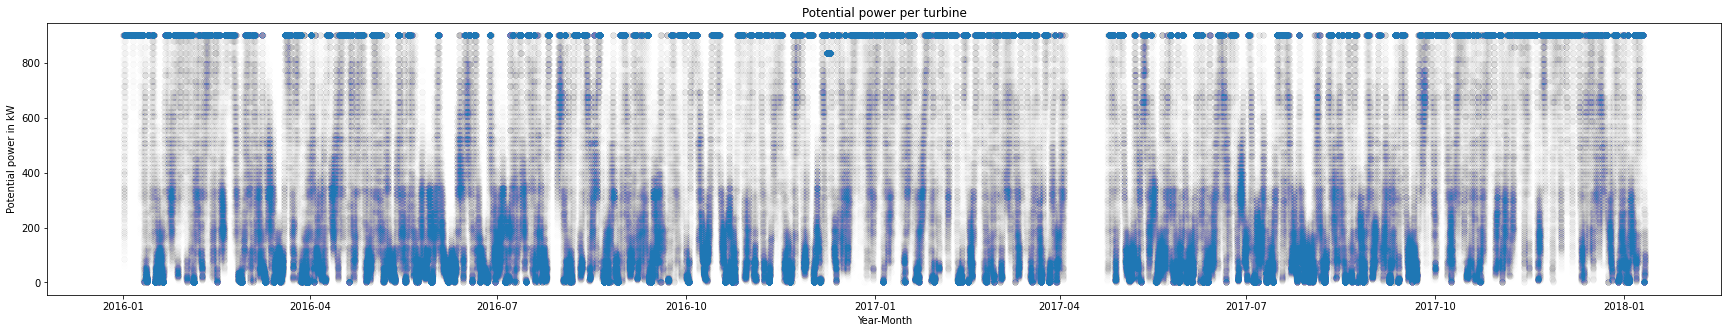

In [29]:
# Potential power
tmp = df_curtail[df_curtail['Timestamp'].dt.year != 2015]
plt.figure(figsize=(30,5))
plt.scatter(tmp['Timestamp'], tmp['Potential_power_kw'], alpha = 0.005)
plt.ylabel('Potential power in kW')
plt.xlabel('Year-Month')
plt.title('Potential power per turbine')

plt.savefig('./Img/Potential power per turbine.jpg')
plt.show()

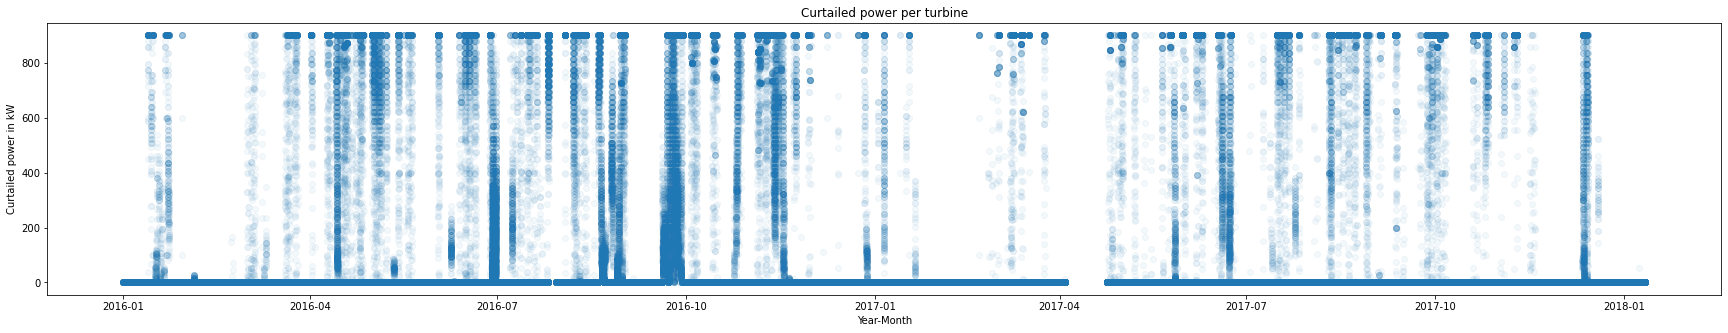

In [30]:
# Curtailed power
tmp = df_curtail[df_curtail['Timestamp'].dt.year != 2015]
plt.figure(figsize=(30,5))
plt.scatter(tmp['Timestamp'], tmp['Curtailed_power_kw'], alpha = 0.05)
plt.xlabel('Year-Month')
plt.ylabel('Curtailed power in kW')
plt.title('Curtailed power per turbine')

plt.savefig('./Img/Curtailed power per turbine.jpg')
plt.show()

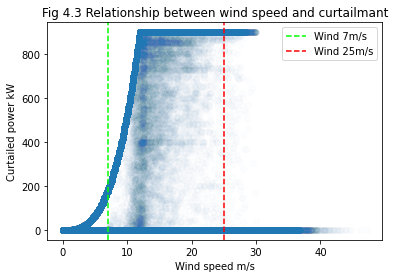

In [31]:
plt.scatter(df_curtail.Wind_ms, df_curtail.Curtailed_power_kw, alpha=0.01)
plt.axvline(7, color='lime', linestyle='--', label='Wind 7m/s')
plt.axvline(25, color='red', linestyle='--', label='Wind 25m/s')
plt.title('Fig 4.3 Relationship between wind speed and curtailmant')
plt.xlabel('Wind speed m/s')
plt.ylabel('Curtailed power kW')
plt.legend()

plt.savefig('./img/Fig 4.3 Relationship between wind speed and curtailmant.jpg')
plt.show()

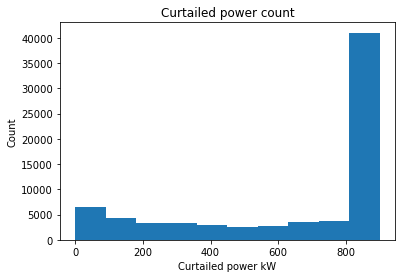

In [32]:
tmp = df_curtail[df_curtail.Curtailed_power_kw != 0]['Curtailed_power_kw']
plt.hist(tmp)
plt.title('Curtailed power count')
plt.ylabel('Count')
plt.xlabel('Curtailed power kW')
plt.show()

### 7.4.2 Curtailed energy plots

In [33]:
# get wind average per hour
tmp = df_supply[:]
tmp['Time_month'] = df_supply.Timestamp.dt.month
tmp['Time_hour'] = df_supply.Timestamp.dt.hour
wind_avg = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Wind_ms', aggfunc=np.mean)
wind_avg.head(3)

Wind_ms
Time_month Time_hour         
1          0           11.386
           1           11.347
           2           11.626

In [34]:
tmp = df_curtail[:] # include all 2015, 2016, 2017 records
tmp['Time_yyyymm'] = tmp.Timestamp.dt.strftime('%Y-%m')
tmp['Time_year'] = tmp.Timestamp.dt.year
tmp['Time_month'] = tmp.Timestamp.dt.month
tmp['Time_day'] = tmp.Timestamp.dt.day
tmp['Time_hour'] = tmp.Timestamp.dt.hour

# Hourly sum of curtailed energy
Sum_YearMonthHour_curtailed_energy_kWh = pd.pivot_table(tmp, index=['Time_year','Time_month','Time_hour'], values='Curtailed_energy_in_1_minute_kwh', aggfunc='sum').reset_index().rename(columns={'Curtailed_energy_in_1_minute_kwh': 'Curtailed_energy_kwh'})
# Daily sum of curtailed energy
Sum_YearMonthDay_curtailed_energy_kWh = pd.pivot_table(tmp, index=[tmp.Timestamp.dt.date,'Time_hour'], values='Curtailed_energy_in_1_minute_kwh', aggfunc='sum').rename(columns={'Curtailed_energy_in_1_minute_kwh': 'Curtailed_energy_kwh'})
# Monthly sum of curtailed energy
Sum_YearMonth_curtailed_energy_kWh = pd.pivot_table(tmp, index=['Time_year','Time_month'], values='Curtailed_energy_in_1_minute_kwh', aggfunc='sum').rename(columns={'Curtailed_energy_in_1_minute_kwh': 'Curtailed_energy_kwh'})

# Monthly Hourly avg of curtailed energy
Avg_MonthHour_curtailed_energy_kWh = pd.pivot_table(tmp, index=['Time_month','Time_hour'], values='Curtailed_energy_in_1_minute_kwh', aggfunc='mean').rename(columns={'Curtailed_energy_in_1_minute_kwh': 'Curtailed_energy_mean_kwh'})
# Yearly Monthly Hourly avg of curtailed energy
Avg_YearMonthHour_curtailed_energy_kWh = pd.pivot_table(tmp, index=['Time_year','Time_month','Time_hour'], values='Curtailed_energy_in_1_minute_kwh', aggfunc='mean').rename(columns={'Curtailed_energy_in_1_minute_kwh': 'Curtailed_energy_mean_kwh'})
# Monthly avg of curtailed energy
Avg_Month_curtailed_energy_kWh = pd.pivot_table(Sum_YearMonth_curtailed_energy_kWh, index=['Time_month'], aggfunc='mean')

# Average sum of curtailed energy per hour
AvgSum_MonthHour_curtailed_energy_kWh = pd.pivot_table(Sum_YearMonthHour_curtailed_energy_kWh, index=['Time_month','Time_hour'], values='Curtailed_energy_kwh', aggfunc='mean').join(wind_avg)
# Average sum of curtailed energy per months
tmp = Sum_YearMonth_curtailed_energy_kWh.reset_index()
AvgSum_Month_curtailed_energy_kWh = pd.pivot_table(tmp, index=['Time_month'], values='Curtailed_energy_kwh', aggfunc='mean')


In [35]:
Avg_YearMonthHour_curtailed_energy_kWh.head(3)

Curtailed_energy_mean_kwh
Time_year Time_month Time_hour                           
2015      5          0                              0.000
                     1                              0.000
                     2                              0.000

In [36]:
Sum_YearMonthHour_curtailed_energy_kWh.head(3)

Time_year  Time_month  Time_hour  Curtailed_energy_kwh
0       2015           5          0                 0.000
1       2015           5          1                 0.000
2       2015           5          2                 0.000

In [37]:
Sum_YearMonthDay_curtailed_energy_kWh.head(3)

Curtailed_energy_kwh
Timestamp  Time_hour                      
2015-05-28 0                         0.000
           1                         0.000
           2                         0.000

In [38]:
Sum_YearMonth_curtailed_energy_kWh.head(3)

Curtailed_energy_kwh
Time_year Time_month                      
2015      5                          0.000
          6                          1.630
          9                      21013.696

In [39]:
Avg_MonthHour_curtailed_energy_kWh.head(3)

Curtailed_energy_mean_kwh
Time_month Time_hour                           
1          0                              0.000
           1                              0.096
           2                              0.217

In [40]:
Avg_Month_curtailed_energy_kWh.head(3)

Curtailed_energy_kwh
Time_month                      
1                       3728.520
2                        223.503
3                      14020.723

In [41]:
AvgSum_MonthHour_curtailed_energy_kWh.head(3)

Curtailed_energy_kwh  Wind_ms
Time_month Time_hour                               
1          0                         0.000   11.386
           1                       112.864   11.347
           2                       247.579   11.626

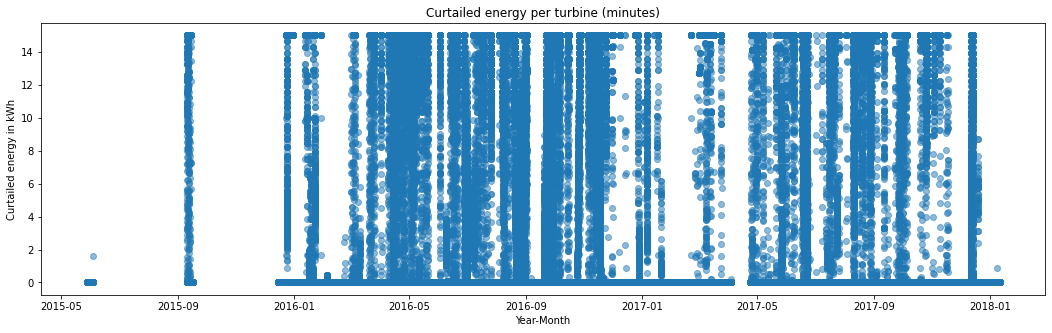

In [42]:
plt.figure(figsize=(18,5))
tmp = df_curtail[:]
plt.scatter(tmp['Timestamp'], tmp['Curtailed_energy_in_1_minute_kwh'], alpha = 0.5)
plt.ylabel('Curtailed energy in kWh')
plt.xlabel('Year-Month')
plt.title('Curtailed energy per turbine (minutes)')

plt.savefig('./Img/Curtailed energy per turbine(minutes).jpg')
plt.show()

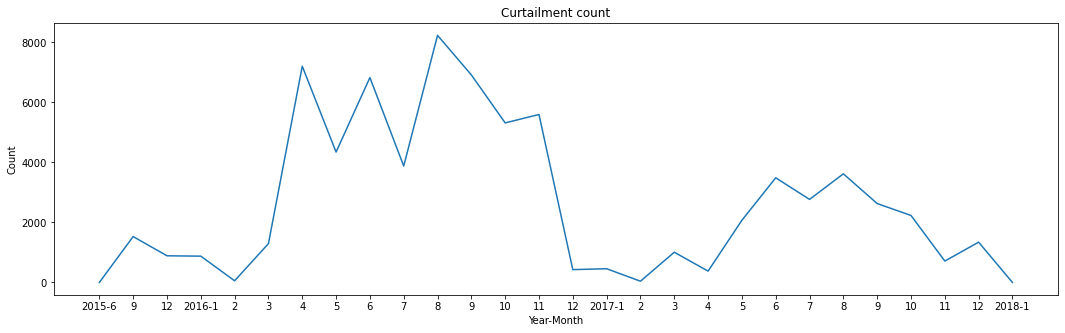

In [43]:
tmp = df_curtail[df_curtail.Curtailed_energy_in_1_minute_kwh != 0]

tmp = tmp.groupby([tmp.Timestamp.dt.year, tmp.Timestamp.dt.month]).count()[['Timestamp']]
tmp.plot(figsize=(18,5), legend=None)

xticks = ['2015-6', 9, 12, 
          '2016-1', 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 
          '2017-1', 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 
          '2018-1']

plt.title('Curtailment count')
plt.xticks(np.arange(len(tmp.index)), xticks)
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.savefig('./Img/Curtailed count.jpg')
plt.show()

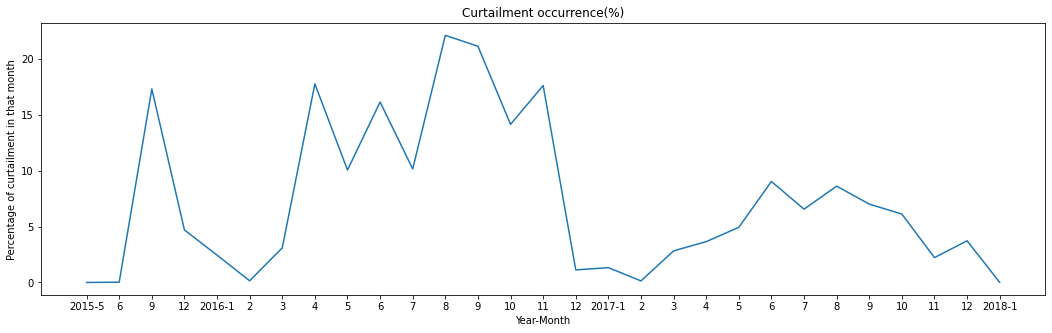

In [44]:
tmp = df_curtail[['Timestamp','Curtailed_energy_in_1_minute_kwh']]
tmp['Curtailed_energy>0'] = False
tmp['Curtailed_energy>0'][tmp['Curtailed_energy_in_1_minute_kwh']>0] = True
tmp1 = tmp.groupby([tmp.Timestamp.dt.year, tmp.Timestamp.dt.month]).sum()[['Curtailed_energy>0']]
tmp2 = tmp.groupby([tmp.Timestamp.dt.year, tmp.Timestamp.dt.month]).count()[['Curtailed_energy>0']]
tmp1['%'] = tmp1['Curtailed_energy>0'] / tmp2['Curtailed_energy>0'] *100
tmp1[['%']].plot(figsize=(18,5), legend=None)

xticks = ['2015-5', 6, 9, 12, 
          '2016-1', 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 
          '2017-1', 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 
          '2018-1']

plt.title('Curtailment occurrence(%)')
plt.xticks(np.arange(len(tmp1.index)), xticks)
plt.xlabel('Year-Month')
plt.ylabel('Percentage of curtailment in that month')
plt.show()

Curtailment occurrence was particularly low in Dec, Jan and Feb of this sample turbine. On the other hand, curtailment did not happen everyday throughout the year of this sample turbine. We assume that the other 500 turbines have curtailment in different days, so 500 turbines give curtailment everyday and able to support everyday households usage.

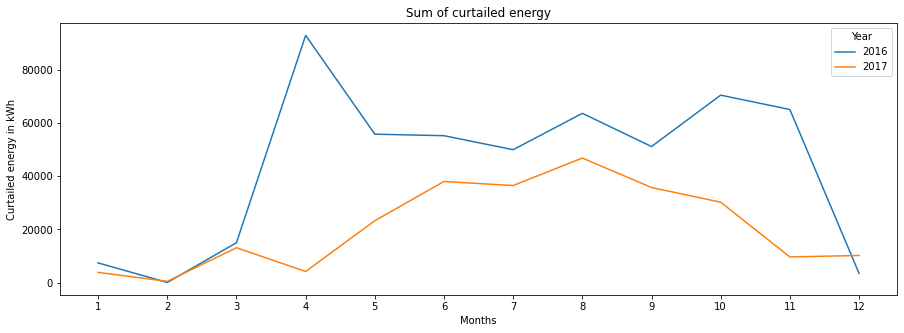

In [45]:
plt.figure(figsize=(15,5))
for i in [2016,2017]:
    plt.plot(Sum_YearMonth_curtailed_energy_kWh.loc[(i)], label=i)
plt.ylabel('Curtailed energy in kWh')
plt.xlabel('Months')
plt.xticks(range(1,13,1))
plt.title('Sum of curtailed energy')
plt.legend(title='Year')

plt.savefig('./Img/Sum of curtailed energy per turbine.jpg')
plt.show()

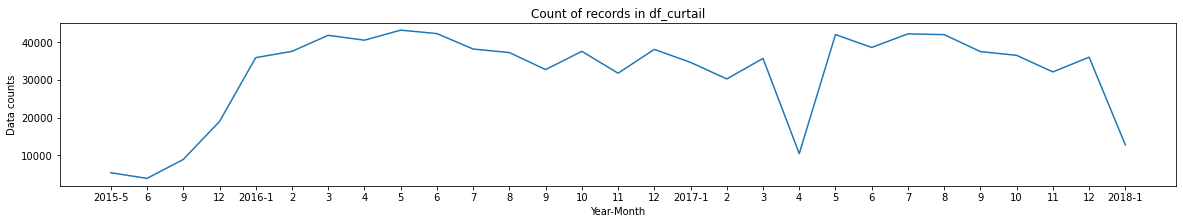

In [46]:
# counting missing data
tmp=df_curtail.groupby([df_curtail.Timestamp.dt.year,df_curtail.Timestamp.dt.month]).count().iloc[:,:1]
tmp.plot(figsize=(20,3), legend = None)

xticks = ['2015-5', 6, 9, 12, 
          '2016-1', 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 
          '2017-1', 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 
          '2018-1']

plt.title('Count of records in df_curtail')
plt.xticks(np.arange(len(tmp.index)), xticks)
plt.xlabel('Year-Month')
plt.ylabel('Data counts')
plt.show()

Sum of curtailed energy graph above illustrated that curtailed energy in 2017 is in general lower than 2016, this could possibly due to increasing households thus using more energy, or just annual effects or global warming related which were not recorded in the dataset.

Opposite trends in Apr could due to much less data in Apr 2017. For simplicity and conservative estimation, missing data in Apr 2017 was not corrected in our analysis not inferring more curtailed energy should have been available.

In [47]:
df_curtail[df_curtail.Timestamp.dt.year == 2016][df_curtail.Timestamp.dt.month == 4].sum()

Power_kw                           10530444.000
Setpoint_kw                        30383416.000
Wind_ms                              381702.200
Potential_power_kw                 17270817.404
Curtailed_power_kw                  5573405.371
Curtailed_energy_in_1_minute_kwh      92964.402
dtype: float64

In [48]:
df_curtail[df_curtail.Timestamp.dt.year == 2017][df_curtail.Timestamp.dt.month == 4].sum()

Power_kw                           4440123.000
Setpoint_kw                        9078186.000
Wind_ms                             102476.700
Potential_power_kw                 5010870.553
Curtailed_power_kw                  248531.777
Curtailed_energy_in_1_minute_kwh      4145.510
dtype: float64

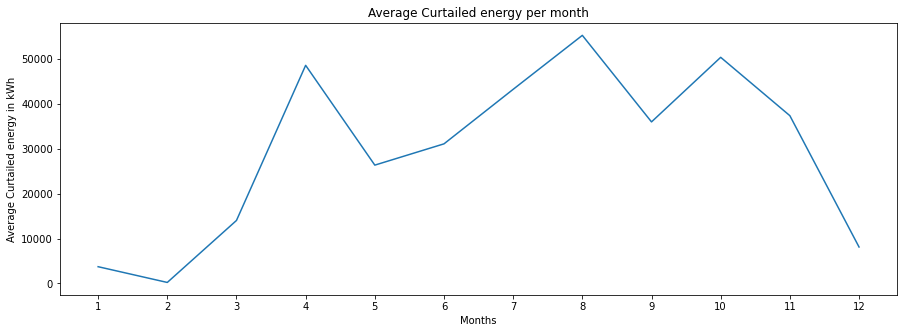

In [49]:
plt.figure(figsize=(15,5))
plt.plot(Avg_Month_curtailed_energy_kWh)
plt.ylabel('Average Curtailed energy in kWh')
plt.xlabel('Months')
plt.xticks(range(1,13,1))
plt.title('Average Curtailed energy per month')

plt.savefig('./Img/Average Curtailed energy per month per turbine.jpg')
plt.show()

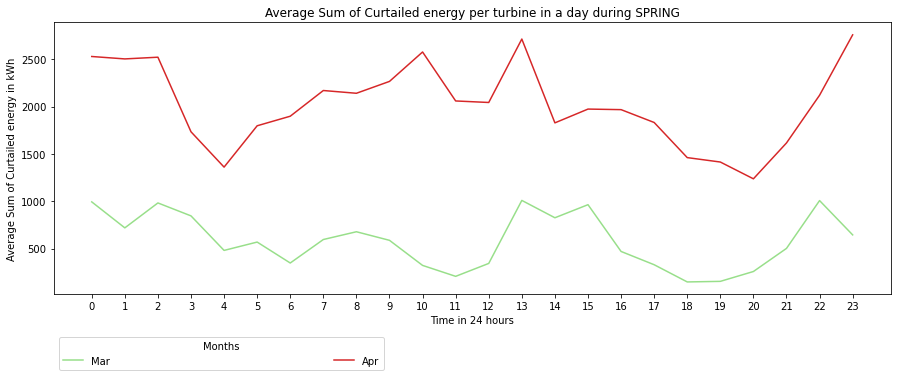

In [50]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(3,5):   
    plt.plot(AvgSum_MonthHour_curtailed_energy_kWh.loc[(i),'Curtailed_energy_kwh'], label=month[i-1], color=colors[i])

plt.ylabel('Average Sum of Curtailed energy in kWh')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Average Sum of Curtailed energy per turbine in a day during SPRING')
plt.legend(title='Months',bbox_to_anchor=(0., -0.24, 0.4, .102),ncol=6, mode="expand",loc='upper center')

plt.savefig('./Img/Average Curtailed energy per turbine in a day during SPRING per turbine.jpg')
plt.show()

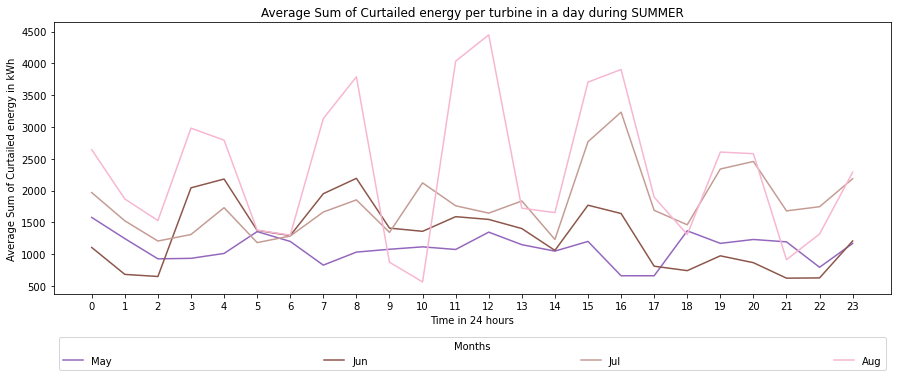

In [51]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(5,9):
    plt.plot(AvgSum_MonthHour_curtailed_energy_kWh.loc[(i),'Curtailed_energy_kwh'], label=month[i-1], color=colors[i])
plt.ylabel('Average Sum of Curtailed energy in kWh')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Average Sum of Curtailed energy per turbine in a day during SUMMER')
plt.legend(title='Months',bbox_to_anchor=(0., -0.24, 1, .102),ncol=6, mode="expand",loc='upper center')

plt.savefig('./Img/Average Curtailed energy per turbine in a day during SUMMER per turbine.jpg')
plt.show()

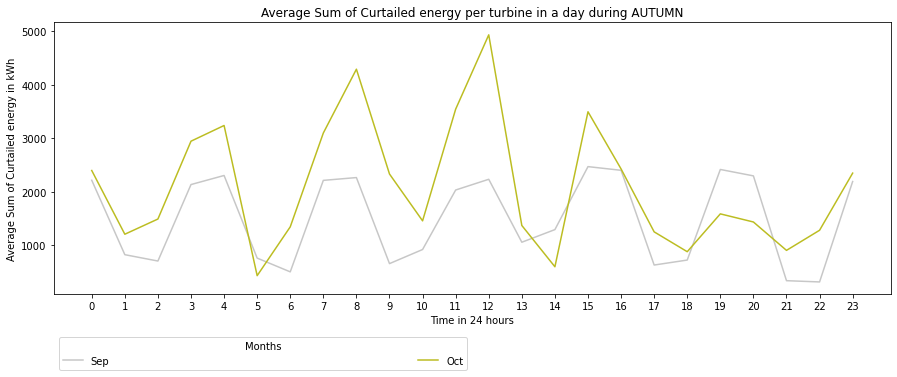

In [52]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(9,11):
    plt.plot(AvgSum_MonthHour_curtailed_energy_kWh.loc[(i),'Curtailed_energy_kwh'], label=month[i-1], color=colors[i])
plt.ylabel('Average Sum of Curtailed energy in kWh')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Average Sum of Curtailed energy per turbine in a day during AUTUMN')
plt.legend(title='Months',bbox_to_anchor=(0., -0.24, 0.5, .102),ncol=6, mode="expand",loc='upper center')

plt.savefig('./Img/Average Curtailed energy per turbine in a day during AUTUMN per turbine.jpg')
plt.show()

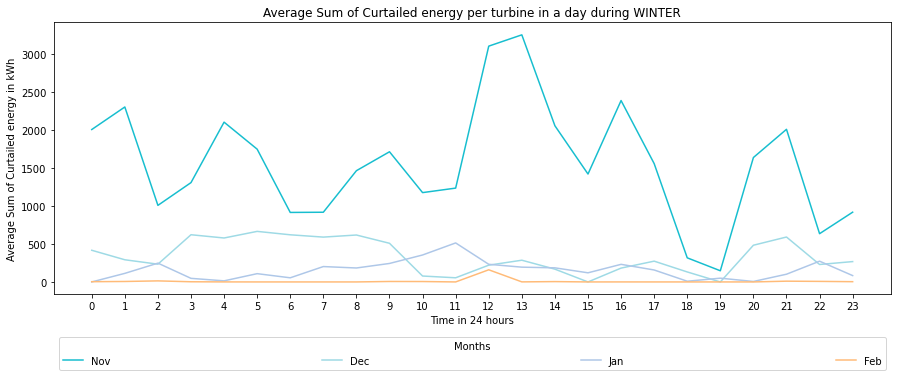

In [53]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in [11,12,1,2]:
    plt.plot(AvgSum_MonthHour_curtailed_energy_kWh.loc[(i),'Curtailed_energy_kwh'], label=month[i-1], color=colors[i])
plt.ylabel('Average Sum of Curtailed energy in kWh')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Average Sum of Curtailed energy per turbine in a day during WINTER')
plt.legend(title='Months',bbox_to_anchor=(0., -0.24, 1, .102),ncol=6, mode="expand",loc='upper center')

plt.savefig('./Img/Average Curtailed energy per turbine in a day during WINTER per turbine.jpg')
plt.show()

## 7.5 User behaviors

### 7.5.1  Average Wind speed pattern (Fig 4.5):
1. Winter (Nov - Feb): highest
2. Summer (May - Aug): lowest
3. Spring and Autumn: moderate
4. Not much differences in terms of hours

### 7.5.2 Average Demand pattern (Fig 4.6):
1. 0am-5am: low, sleeping
2. 5am-7am: start rising coz time to wakeup
3. 7am-3pm: constant coz people in office/ school, maybe just one person at home watching TV or doing houseworks.
4. 3pm-5pm: rise, peak at 6pm. People off work/ school, back to home and start using electricity like TV, computer, lights....
5. Winter time colder and dark earlier thus higher demand during 5pm-11pm
6. 6pm-11pm dropping: Night life outside, time to sleep

### 7.5.3 Average Curatiled energy (Fig 4.7):
1. Don't have obvious pattern because setpoint has no siginificant relationship with any variables as shown later in 7.5.6 

In [54]:
import matplotlib.transforms
bbox = matplotlib.transforms.Bbox([[0., -0.3], [1, .102]])

<Figure size 1080x1080 with 0 Axes>

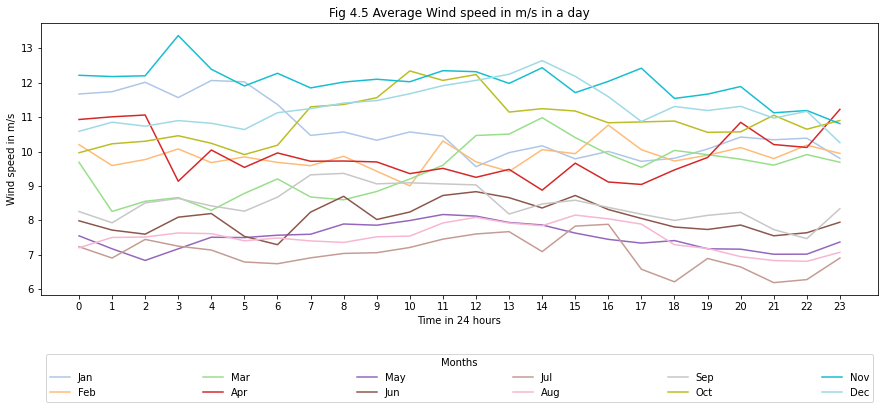

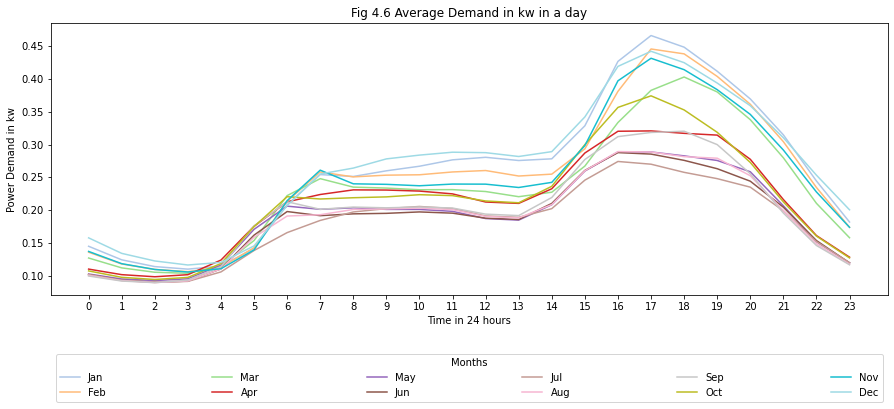

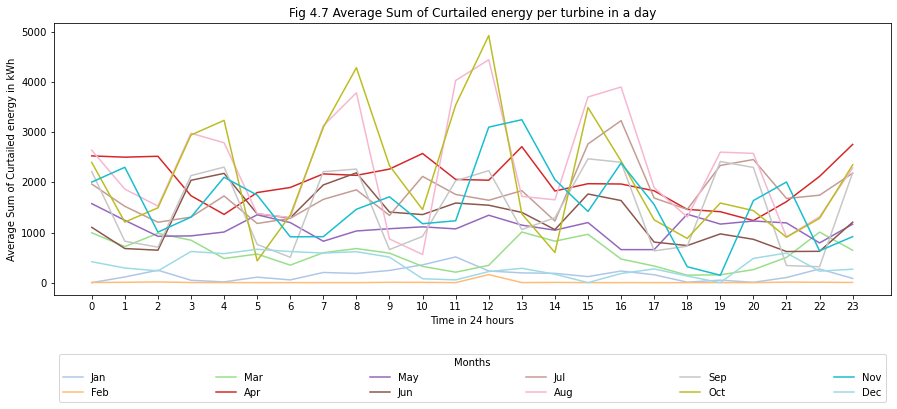

In [197]:
plt.figure(figsize=(15,15))

##### ---- Average Wind speed in m/s in a day (2017)
tmp = df_supply[df_supply.Timestamp.dt.year == 2017] # only 2017 for consistency with demand data
tmp['Time_month'] = df_supply.Timestamp.dt.month
tmp['Time_hour'] = df_supply.Timestamp.dt.hour
wind_avg = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Wind_ms', aggfunc=np.mean)

# plot
plt.figure(figsize=(15,5))
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for Month in range(1,13): 
    plt.plot(wind_avg.loc[(Month),'Wind_ms'], label=month[Month-1], color=colors[Month])
plt.xticks(range(0,24,1))
plt.ylabel('Wind speed in m/s')
plt.xlabel('Time in 24 hours')
plt.legend(title='Months',bbox_to_anchor=(0., -0.3, 1, .102),ncol=6, mode="expand",loc='upper center')
plt.title('Fig 4.5 Average Wind speed in m/s in a day')
plt.savefig('./Img/Fig 4.5 Average Wind speed in ms in a day.jpg',bbox_inches='tight')
plt.show()

##### ---- Average Demand in kw in a day (2017)
# Averge demands per households

tmp=df_demand[:]
tmp['Time_month'] = tmp['Timestamp'].dt.month
tmp['Time_hour'] = tmp['Timestamp'].dt.hour

monthly_avg_demand = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Demand_mean_kw', aggfunc=np.mean)

# plot
plt.figure(figsize=(15,5))
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for Month in range(1,13): 
    plt.plot(monthly_avg_demand.loc[(Month),'Demand_mean_kw'], label=month[Month-1], color=colors[Month])
plt.xticks(range(0,24,1))
plt.ylabel('Power Demand in kw')
plt.xlabel('Time in 24 hours')
plt.legend(title='Months',bbox_to_anchor=(0., -0.3, 1, .102),ncol=6, mode="expand",loc='upper center')
plt.title('Fig 4.6 Average Demand in kw in a day')
plt.savefig('./Img/Fig 4.6 Average Demand in kw in a day.jpg',bbox_inches='tight')
plt.show()


##### ---- Average Sum of Curtailed energy per turbine in a day 
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for Month in range(1,13):
    plt.plot(AvgSum_MonthHour_curtailed_energy_kWh.loc[(Month),'Curtailed_energy_kwh'], label=month[Month-1], color=colors[Month])
plt.ylabel('Average Sum of Curtailed energy in kWh')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Fig 4.7 Average Sum of Curtailed energy per turbine in a day')
plt.legend(title='Months',bbox_to_anchor=(0., -0.3, 1, .102),ncol=6, mode="expand",loc='upper center')

plt.savefig('./Img/Fig 4.7 Average Sum of Curtailed energy per turbine in a day.jpg',bbox_inches='tight')
plt.show()


### 7.5.4 Interaction graph

In [198]:
from ipywidgets import interact, interact_manual

@interact(Month=[1,2,3,4,5,6,7,8,9,10,11,12])
##### ---- Average Curtailed energy per turbine in a day (2017)
def graph(Month):
    
    plt.figure(figsize=(15,12))
    
    
    ax1 = plt.subplot(311)
    ax2 = plt.subplot(312)
    ax3 = plt.subplot(313)
    
    ##### ---- Average Wind speed in m/s in a day (2017)
    tmp = df_supply[df_supply.Timestamp.dt.year == 2017] # Include only 2017 for consistency
    tmp['Time_month'] = df_supply.Timestamp.dt.month
    tmp['Time_hour'] = df_supply.Timestamp.dt.hour
    wind_avg = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Wind_ms', aggfunc=np.mean)

    # plot
    n=13
    colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
    month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    
    ax1.plot(wind_avg.loc[(Month),'Wind_ms'], label=month[Month-1], color=colors[Month])
    ax1.set_xticks(range(0,24,1))
    ax1.set_ylabel('Wind speed in m/s')
    ax1.set_title('Average Wind speed in m/s in a day')
    
    ##### ---- Average Demand in kw in a day (2017)
    # Averge demands per households

    tmp=df_demand[:]
    tmp['Time_month'] = tmp['Timestamp'].dt.month
    tmp['Time_hour'] = tmp['Timestamp'].dt.hour

    monthly_avg_demand = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Demand_mean_kw', aggfunc=np.mean)

    # plot
    n=13
    colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
    month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    ax2.plot(monthly_avg_demand.loc[(Month),'Demand_mean_kw'], label=month[Month-1], color=colors[Month])
    ax2.set_xticks(range(0,24,1))
    ax2.set_ylabel('Power Demand in kw')
    ax2.set_title('Average Demand in kw in a day')
    
    ##### ---- Average Curtailed energy per turbine in a day 
    tmp = Avg_YearMonthHour_curtailed_energy_kWh.loc[(2017)]
    n=13
    colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
    months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
    ax3.plot(AvgSum_MonthHour_curtailed_energy_kWh.loc[(Month),'Curtailed_energy_kwh'], 
             label=month[Month-1], color=colors[Month])
  
    ax3.set_ylabel('Curtailed energy in kWh')
    ax3.set_xticks(range(0,24,1))
    ax3.set_title('Average Sum of Curtailed energy per turbine in a day') 
    ax3.set_xlabel('Time in 24 hours')
    

    plt.tight_layout(pad=2.0)
    plt.show()
    


interactive(children=(Dropdown(description='Month', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), value=1),…

### 7.5.5 Sum of demands
Demand_mean_kw provided is the mean demand of the sample of households during the measurement period where the timestamp is situated at the end of the measurement period. Assuming that every minutes within that period have the same demand in kW, we can calculate sum of demand in terms of energy (kWh) by:
1. Aggregated demand power in 1 minute = Demand_mean_kw x 60 sec x 0.278 x 10^-3
2. Thus, aggregated demand power in 30 minutes = (Demand_mean_kw x 60 sec x 0.278 x 10^-3) x 30

We also assumed total number of households was 22000 in 2017, referencing figure from the government (National Records of Scotland, n.d. [[8]](#Orkney-pop))

In [57]:
tmp=df_demand[:]
n=22000
tmp['Sum_demand_30min_kWh_1_household'] = (tmp['Demand_mean_kw']* 60 * 0.278 /1000) * 30
tmp['Total_demand_30min_kWh_N_households'] = tmp['Sum_demand_30min_kWh_1_household']* n

tmp['Time_month'] = tmp['Timestamp'].dt.month
tmp['Time_day'] = tmp['Timestamp'].dt.day
tmp['Time_hour'] = tmp['Timestamp'].dt.hour

DateHour_sum_demand_1house = pd.pivot_table(tmp, index=[tmp['Timestamp'].dt.date, 'Time_hour'], values='Sum_demand_30min_kWh_1_household', aggfunc='sum').rename(columns={'Sum_demand_30min_kWh_1_household': 'Demand_1house_kWh'})
MonthHour_sum_demand_1house = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Sum_demand_30min_kWh_1_household', aggfunc='sum').rename(columns={'Sum_demand_30min_kWh_1_household': 'Demand_1house_kWh'})

DateHour_sum_demand_Nhouses = pd.pivot_table(tmp, index=[tmp['Timestamp'].dt.date, 'Time_hour'], values='Total_demand_30min_kWh_N_households', aggfunc='sum').rename(columns={'Total_demand_30min_kWh_N_households': 'Demand_Nhouse_kWh'})
MonthHour_sum_demand_Nhouses = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Total_demand_30min_kWh_N_households', aggfunc='sum').rename(columns={'Total_demand_30min_kWh_N_households': 'Demand_Nhouse_kWh'})

DateHour_sum_demand = DateHour_sum_demand_1house.join(DateHour_sum_demand_Nhouses)
MonthHour_sum_demand = MonthHour_sum_demand_1house.join(MonthHour_sum_demand_Nhouses)

monthly_sum_demand = MonthHour_sum_demand_1house.reset_index().groupby('Time_month').sum().iloc[:,1:]
monthly_sum_demand['Demand_Nhouse_kWh'] = monthly_sum_demand['Demand_1house_kWh'] * n
monthly_sum_demand

Demand_1house_kWh  Demand_Nhouse_kWh
Time_month                                      
1                     201.576        4434681.672
2                     168.741        3712291.034
3                     172.284        3790244.931
4                     152.217        3348783.553
5                     142.931        3144473.886
6                     135.418        2979192.612
7                     135.696        2985312.219
8                     141.149        3105271.491
9                     142.663        3138580.243
10                    160.013        3520278.881
11                    175.291        3856412.162
12                    197.941        4354710.152

In [58]:
a=tmp.groupby([tmp.Timestamp.dt.year]).sum().rename(columns={'Sum_demand_30min_kWh_1_household': 'Annual kWh'}).loc[2017][['Annual kWh']]
m=tmp.groupby([tmp.Timestamp.dt.month]).sum().rename(columns={'Sum_demand_30min_kWh_1_household': 'Monthly kWh'}).mean()[['Monthly kWh']]
d=tmp.groupby([tmp.Timestamp.dt.date]).sum().rename(columns={'Sum_demand_30min_kWh_1_household': 'Daily kWh'}).mean()[['Daily kWh']]
avg_energy_consumption = pd.DataFrame()
avg_energy_consumption.loc['Electricity','Annual kWh'] = a.values
avg_energy_consumption.loc['Electricity','Monthly kWh'] = m.values
avg_energy_consumption.loc['Electricity','Daily kWh'] = d.values
avg_energy_consumption

Annual kWh  Monthly kWh  Daily kWh
Electricity    1919.577      160.493      5.262

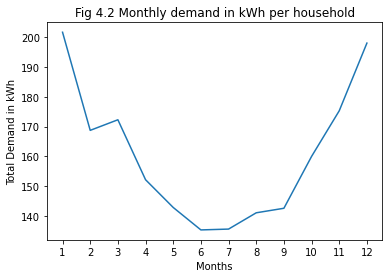

In [59]:
monthly_sum_demand['Demand_1house_kWh'].plot()
plt.xticks(np.arange(1,13))
plt.title('Fig 4.2 Monthly demand in kWh per household')
plt.xlabel('Months')
plt.ylabel('Total Demand in kWh')

plt.savefig('./img/Fig 4.2 Monthly demands per household scatter.jpg')
plt.show()

### 7.5.6 Relationship between setpoint and other variables
We would like to see any relationship between setpoint and other variables, under what circumstances they change setpoint lower or higher. However, from results below, we don't see a clear relationships.

In [60]:
avg_curtail = df_curtail[:]
avg_curtail['month'] = avg_curtail['Timestamp'].dt.month
avg_curtail['hour'] = avg_curtail['Timestamp'].dt.hour

tmp1 = avg_curtail[avg_curtail['Timestamp'].dt.year==2017].groupby([avg_curtail.Timestamp.dt.date, 'hour']).mean().reset_index()
tmp2 = avg_curtail[avg_curtail['Timestamp'].dt.year==2017].groupby([avg_curtail.Timestamp.dt.date, 'hour']).sum().reset_index()
tmp1['Curtailed_energy_1hr_kwh'] = tmp2['Curtailed_energy_in_1_minute_kwh']
tmp1=tmp1.merge(DateHour_sum_demand_1house.reset_index(), how='left', left_on=["Timestamp","hour"], right_on=["Timestamp", "Time_hour"]).dropna()
tmp1['Wind_sq'] = tmp1['Wind_ms'] **2

tmp1['Low_usage'] = 0
tmp1['Medium_usage'] = 0
tmp1['High_usage'] = 0
tmp1['Spring'] = 0
tmp1['Summer'] = 0
tmp1['Autumn'] = 0
tmp1['Winter'] = 0


tmp1['Low_usage'][tmp1['hour'].isin([23,0,1,2,3,4,5])] = 1 #Low usage
tmp1['Medium_usage'][tmp1['hour'].isin(list(range(6,17)))] = 1 #Medium usage
tmp1['High_usage'][tmp1['hour'].isin(list(range(17,23)))] = 1
tmp1['Spring'][tmp1['month'].isin([3,4])] = 1
tmp1['Summer'][tmp1['month'].isin([5,6,7,8])] = 1
tmp1['Autumn'][tmp1['month'].isin([9,10])] = 1
tmp1['Winter'][tmp1['month'].isin([11,12,1,2])] = 1

x = tmp1[['Demand_1house_kWh','Potential_power_kw']]
y = tmp1['Setpoint_kw']


No significant correlation between Setpoint and Demand. Wind or potential power.

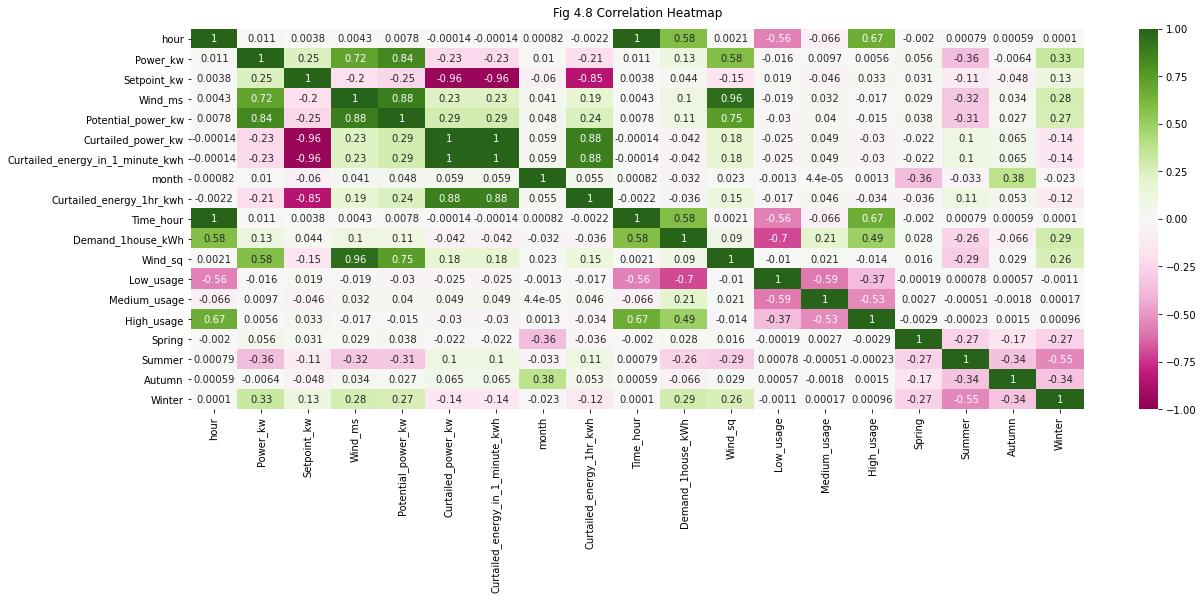

In [61]:
plt.figure(figsize=(20,7))

heatmap = sns.heatmap(tmp1.corr(), vmin=-1, vmax=1, annot=True, cmap="PiYG")

heatmap.set_title('Fig 4.8 Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

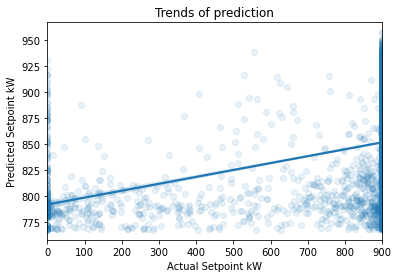

In [62]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
predictions = model.predict(x)
sns.regplot(y,predictions,scatter_kws={'alpha':0.1})
plt.title('Trends of prediction')
plt.ylabel('Predicted Setpoint kW')
plt.xlabel('Actual Setpoint kW')
plt.show()

In [63]:
import statsmodels.api as sm

X = sm.add_constant(x)
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            Setpoint_kw   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     291.4
Date:                Mon, 13 Sep 2021   Prob (F-statistic):          5.39e-123
Time:                        15:08:29   Log-Likelihood:                -54353.
No. Observations:                8202   AIC:                         1.087e+05
Df Residuals:                    8199   BIC:                         1.087e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                883.2790      5

R-sqaured is very low thus we can't predict setpoint using the OLS.

## 7.6 Problems of curtailment

### 7.6.1 How much energy is currently curtailed annually across the Orkney Isles? And the revenue loss? 

Electricity cost in Orkney (Switch Plan, 2021 [[9]](#Orkney-power-costs)):

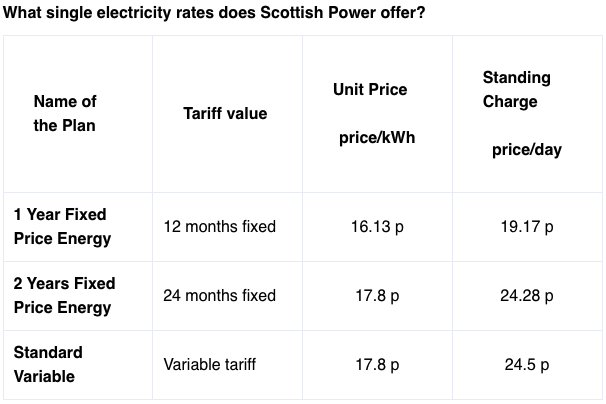

Assume the Orkney wind turbine provider charges customers the lowest rate of Scottish Power: 16.13p /kWh and 19.17p /day, revenue loss per minute due to curtailment equals to (Curtailed energy in kWh/minute x 16.13) x 0.01. Then,  standard price per day (in a year total) is added by (+ 19.17 x 365 x 0.01).

In [64]:
##----- yearly revenue loss in GBP

# calculate the revenue loss in unit price 
df_curtail['Revenue_loss_GBP'] = (df_curtail.Curtailed_energy_in_1_minute_kwh* 16.13)*0.01

# create tmp table to store yearly sum
tmp = df_curtail[df_curtail.Timestamp.dt.year.isin([2016,2017])].groupby(df_curtail['Timestamp'].dt.year).sum()[['Curtailed_energy_in_1_minute_kwh','Revenue_loss_GBP']].rename(columns={'Curtailed_energy_in_1_minute_kwh':'Annual Curtailment in kWh per turbine', 'Revenue_loss_GBP': 'Revenue loss in GBP per turbine'})

# add the yearly revenue loss in standing charge
tmp['Revenue loss in GBP per turbine'] = tmp['Revenue loss in GBP per turbine'] + 19.17*365*0.01

# Calculate yearly total for 500 turbines
tmp['Annual Curtailment in kWh for 500 turbines'] = tmp['Annual Curtailment in kWh per turbine'] * 500
tmp['Revenue loss in GBP for 500 turbines'] = tmp['Revenue loss in GBP per turbine'] * 500

tmp

Annual Curtailment in kWh per turbine  \
Timestamp                                          
2016                                  530069.072   
2017                                  251724.527   

           Revenue loss in GBP per turbine  \
Timestamp                                    
2016                             85570.112   
2017                             40673.137   

           Annual Curtailment in kWh for 500 turbines  \
Timestamp                                               
2016                                    265034536.059   
2017                                    125862263.324   

           Revenue loss in GBP for 500 turbines  
Timestamp                                        
2016                               42785055.916  
2017                               20336568.324

In [65]:
# display table in million dollars and GWh
(tmp/1000000).rename(columns={'Annual Curtailment in kWh per turbine':'Annual Curtailment in GWh per turbine' ,
                           'Revenue loss in GBP per turbine':'Revenue loss in GBP (million) per turbine',
                           'Annual Curtailment in kWh for 500 turbines':'Annual Curtailment in GWh for 500 turbines',
                           'Revenue loss in GBP for 500 turbines':'Revenue loss in GBP (million) for 500 turbines'})

Annual Curtailment in GWh per turbine  \
Timestamp                                          
2016                                       0.530   
2017                                       0.252   

           Revenue loss in GBP (million) per turbine  \
Timestamp                                              
2016                                           0.086   
2017                                           0.041   

           Annual Curtailment in GWh for 500 turbines  \
Timestamp                                               
2016                                          265.035   
2017                                          125.862   

           Revenue loss in GBP (million) for 500 turbines  
Timestamp                                                  
2016                                               42.785  
2017                                               20.337

2017 values were half of 2016's. This huge differences could due to 
1. Uncertainties in wind speed as we couldn't expect what happens in the nature
2. Somehow more usages in 2017 so actually generated more power

We couldn't foresee whether in the next few years it is continue to drop due to reason 2, or have ups and downs due to reason 1, so we choose to take the average value as denominator in 7.6.2 - calculation of percentage of curtailed energy.

In [66]:
avg_16_17 = tmp.describe().loc[['mean']]
avg_16_17.index = ['Mean_2016&2017']
avg_16_17

Annual Curtailment in kWh per turbine  \
Mean_2016&2017                             390896.799   

                Revenue loss in GBP per turbine  \
Mean_2016&2017                        63121.624   

                Annual Curtailment in kWh for 500 turbines  \
Mean_2016&2017                               195448399.692   

                Revenue loss in GBP for 500 turbines  
Mean_2016&2017                          31560812.120

### 7.6.2 How much can this be reduced by different levels of DR penetration? How many local households would need to be on our DR scheme in order to supply this level of DR?
We have 22000 total households on the island as of 2017, so the maximum households we can penetrate DR to is 22000. In the trial period, we may want to start with fewer households i.e. 30 first to see if the DR devices cost could be covered in a few years.

Below table shows the average energy consumption and cost at Scotland (Jon Davies, 2019 [[1]](#average-electricity-gas-bills-in-2019)) :

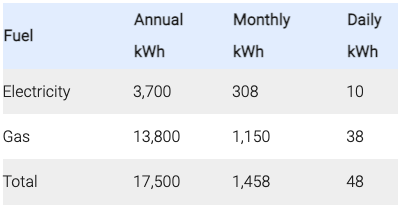

The average electricity monthly demand in Scotland is 308kWh, while Orkney was half of that (148kWh). The total energy consumption per household should not vary that much, therefore Orkney residents might be using far more gas than Scotland average. After installing DR devices, we could expect increase in demand to meet the average, and possibly also shift some gas usage to electricity, with the total overall energy usage unchanged.

In [67]:
print('Daily average electricity demand of one household (Orkney Island) is ',( monthly_sum_demand.sum()/365 )['Demand_1house_kWh'],'kWh')
print('Daily average electricity demand of one household (Scotland) is 10 kWh')

Daily average electricity demand of one household (Orkney Island) is  5.276492258372609 kWh
Daily average electricity demand of one household (Scotland) is 10 kWh


We have several choices of power storage installation:
1. Battery storage for electricity energy:
    - CSE stated that 'On average installing a battery will cost £4,000-£8,000, with a useable capacity of 3.8-13.5 kWh' (CSE, n.d. [[3]](#avg-battery-storage-price)). Assume that to support daily usage of 5kWh (Orkney daily average) or 10kWh (Scotland daily average), we need a £5,000 or £6,500 battery storage respectively.
    
2. Storage heater to replace gas:
    - The storage capacity of a storage heater (Dimplex, n.d. [[4]](#storage-heater)) is 15.54kWh which can cover daily usage, costs £858.10. 
    - The energy needed exceeds daily average of demand per household (about 5kWh), so probably residents are using gas for heater, thus installing this could shift their energy usage from gas to wind. 

3. Hot water tank to replace gas:
    - A shower uses 8 litres per minute on average (CCW, n.d. [[5]](#shower-water-usage)). Assuming that all households have 3 residents, each of them take 10 minutes for a shower, they need 240 litres of hot water for shower per day. 240 litres of hot water needs 12.5kWh energy per day (Sust-it, n.d. [[6]](#water-heater-energy-calc)). 
    - A 210Ltrs 6kW immersion water heater (Shop4, n.d. [[7]](#water-heater)) costs £ 1,117.42. 
    - The energy needed for shower is 12.5kWh, which exceeds the daily average of demand per household (about 5kWh), so probably residents are using gas for hot water, thus installing this could shift their energy usage from gas to wind. 

##### How much gas could be shifted to wind energy through installing storage heater and hot water tank?
1. Assume storage heater annual usage 15.54kWh x 30 x 4 = 1864.8kWh (4 months winter usage)
2. Assume annual hot water usage 12.5kWh x 365 = 4562.5kWh
3. The maximum allowable gas shift is (1864.8 + 4562.5)/13800 = 46.6%
4. Becuase Feb total curtailed energy was particularly low in both 2016 and 2017, the curtailed energy will not be able to support full Feb heating usage, so the actaul gas shift percentage will be lower than 46.6% depends on the number of households joined the program.

We could also consider applying government subsidies on initial systems setup costs because our project helps carbon emission reduction which is one of the main focuses in upcoming decades. Therefore, for each of the below cases, we also have a subplan that include 10% government subsidy. 10% government subsidy is expected if successful because the UK number of CO2 in tons emission costs about 0.0148 GBP /kWh. Since variable portion of electricity price is 0.1613 GPB/kWh, it is roughly 10% impact in revenue.

Therefore, curtailment could be reduced further and calculated in following cases:
1. Installing battery storage (5kWh to meet Orkney demand)
    - Consumed energy kWh = Number of households x 5kW demands
2. Installing battery storage (10kWh to meet Scotland demand)
    - Consumed energy kWh = Number of households x 10kWh demands
3. Installing battery storage (10kWh) + storage heater + hot water tank
    - Consumed energy kWh = Number of households x (10kWh + 15.54kWh + 12.5kWh)
    - When the calculated total consumed energy is greater than total curtailed energy in that month, total consumed energy is set to total curtailed energy
4. Installing storage heater + hot water tank
    - Consumed energy kWh = Number of households x (15.54kWh + 12.5kWh)
    - When the calculated total consumed energy is greater than total curtailed energy in that month, total consumed energy is set to total curtailed energy
    
After DR rollout and if proved demand could increase after 1 year trial, we could start charging customers. If the cost could be compensated within 6 years of trial (5 years after charging), we'll go for the plan. 6 years as the cut off point because we don't want to risk for the cost of appliances maintenance. Gas and electricity cost the same (Switch Plan, 2021 [[9]](#Orkney-power-costs)).

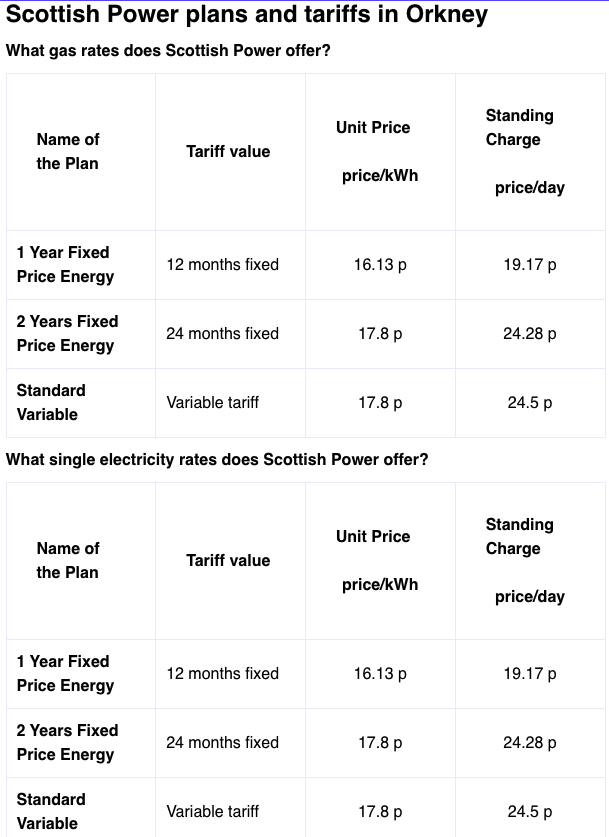

In [98]:
tmp = df_curtail[df_curtail.Timestamp.dt.year.isin([2016,2017])][['Timestamp','Curtailed_energy_in_1_minute_kwh']]
tmp = tmp.groupby([tmp.Timestamp.dt.date]).sum()
tmp['Count days curtailed'] = False
tmp['Count days curtailed'][tmp.Curtailed_energy_in_1_minute_kwh > 0]=True
tmp.index = pd.to_datetime(tmp.index)
tmp = tmp.groupby([tmp.index.year,tmp.index.month]).sum()
tmp.index.names=('Year','Month')
tmp.reset_index()
tmp=tmp.groupby('Month').mean()
tmp['Curtailed_energy_in_1_minute_kwh'] = tmp['Curtailed_energy_in_1_minute_kwh'] * 500
tmp=tmp.rename(columns={'Curtailed_energy_in_1_minute_kwh':'500turbines_Curtailed_energy_kwh'})
tmp['Energy kWh needed for 1 battery storage (Orkney demand)'] = 5
tmp['Energy kWh needed for 1 battery storage (Scotland demand)'] = 10
tmp['Energy kWh needed for 1 storage heater'] = 15.54
tmp['Energy kWh needed for 1 storage heater'][tmp.index.isin([3,4,5,6,7,8,9,10])] = 0
tmp['Energy kWh needed for 1 hot water tank'] = 12.5
install_devices = tmp[:]
install_devices

500turbines_Curtailed_energy_kwh  Count days curtailed  \
Month                                                           
1                           2796167.207                 9.000   
2                            111751.393                 4.500   
3                           7010361.419                14.000   
4                          24277477.905                13.500   
5                          19755775.816                16.000   
6                          23306771.825                16.500   
7                          21607122.718                15.500   
8                          27614494.310                18.500   
9                          21719942.546                13.500   
10                         25169594.209                11.500   
11                         18674034.461                13.500   
12                          3404905.883                 6.500   

       Energy kWh needed for 1 battery storage (Orkney demand)  \
Month                                                            
1                                                      5         
2                                                      5         
3                                                      5         
4                                                      5         
5                                                      5         
6                                                      5         
7                                                      5         
8                                                      5         
9                                                      5         
10                                                     5         
11                                                     5         
12                                                     5         

       Energy kWh needed for 1 battery storage (Scotland demand)  \
Month                                                              
1                                                     10           
2                                                     10           
3                                                     10           
4                                                     10           
5                                                     10           
6                                                     10           
7                                                     10           
8                                                     10           
9                                                     10           
10                                                    10           
11                                                    10           
12                                                    10           

       Energy kWh needed for 1 storage heater  \
Month                                           
1                                      15.540   
2                                      15.540   
3                                       0.000   
4                                       0.000   
5                                       0.000   
6                                       0.000   
7                                       0.000   
8                                       0.000   
9                                       0.000   
10                                      0.000   
11                                     15.540   
12                                     15.540   

       Energy kWh needed for 1 hot water tank  
Month                                          
1                                      12.500  
2                                      12.500  
3                                      12.500  
4                                      12.500  
5                                      12.500  
6                                      12.500  
7                                      12.500  
8                                      12.500  
9                                      12.500  
10 

Although curtailment occurrence was particularly low in Dec, Jan and Feb of this sample turbine, and did not happen everyday throughout the year of this sample turbine. We assume that the other 500 turbines have curtailment in different days, so 500 turbines give curtailment everyday and able to support everyday households usage. Therefore, we multiply daily usage of each appliances by 365.

#### 7.6.2.1 Plan A: installing battery storage, based on Orkney eletricity demand

Result: Not recommended. Not profitable in 6 years.

In [99]:
DR=pd.DataFrame()

n = [22000, 22000*0.75, 22000*0.5, 22000*0.25, 100, 50, 30]
for i in range(len(n)):
    n_house = n[i]
    
    # calculate monthly sum of energy consumption
    tmp=install_devices[['500turbines_Curtailed_energy_kwh','Energy kWh needed for 1 battery storage (Orkney demand)']]
    tmp['total_energy_consumed_kWh'] = tmp['Energy kWh needed for 1 battery storage (Orkney demand)'] * 30 * n_house
    tmp['%of_curtailed_energy_kwh'] = tmp['total_energy_consumed_kWh']/tmp['500turbines_Curtailed_energy_kwh'] * 100
    
    # calculate yearly sum of profits
    DR.loc[i,'N_households']=n_house
    DR.loc[i,'Consumed_energy_kwh'] = tmp['total_energy_consumed_kWh'].sum()
    DR.loc[i,'%of_curtailed_energy_kwh'] = DR.loc[i,'Consumed_energy_kwh'] / avg_16_17['Annual Curtailment in kWh for 500 turbines'].values * 100
    
    DR.loc[i,'Revenue in GBP'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01
    DR.loc[i,'Revenue in GBP (25% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.75
    DR.loc[i,'Revenue in GBP (50% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.5
    DR.loc[i,'Revenue in GBP (75% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.25
    
    DR.loc[i,'Cost of battery storage'] = 5000 
    DR.loc[i,'Battery storage capacity kWh'] = 5
    
    # First year is not profitable because under DR trial. 
    DR.loc[i,'Profit in GBP (2nd year)'] = DR.loc[i,'Revenue in GBP'] - 5000 * n_house
    DR.loc[i,'Profit in GBP (2nd year) (25% discount)'] = DR.loc[i,'Revenue in GBP (25% discount)'] - 5000 * n_house
    DR.loc[i,'Profit in GBP (2nd year) (50% discount)'] = DR.loc[i,'Revenue in GBP (50% discount)'] - 5000 * n_house
    DR.loc[i,'Profit in GBP (2nd year) (75% discount)'] = DR.loc[i,'Revenue in GBP (75% discount)'] - 5000 * n_house
    
    DR.loc[i,'Profit in GBP (6 years)'] = 5*DR.loc[i,'Revenue in GBP'] - 5000 * n_house
    DR.loc[i,'Profit in GBP (6 years) (25% discount)'] = 5*DR.loc[i,'Revenue in GBP (25% discount)'] - 5000 * n_house
    DR.loc[i,'Profit in GBP (6 years) (50% discount)'] = 5*DR.loc[i,'Revenue in GBP (50% discount)'] - 5000 * n_house
    DR.loc[i,'Profit in GBP (6 years) (75% discount)'] = 5*DR.loc[i,'Revenue in GBP (75% discount)'] - 5000 * n_house

DR

N_households  Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000         39600000.000                    20.261   
1     16500.000         29700000.000                    15.196   
2     11000.000         19800000.000                    10.131   
3      5500.000          9900000.000                     5.065   
4       100.000           180000.000                     0.092   
5        50.000            90000.000                     0.046   
6        30.000            54000.000                     0.028   

   Revenue in GBP  Revenue in GBP (25% discount)  \
0     6387549.970                    4790662.478   
1     4790679.970                    3593009.978   
2     3193809.971                    2395357.478   
3     1596939.971                    1197704.978   
4       29103.970                      21827.978   
5       14586.971                      10940.228   
6        8780.171                       6585.128   

   Revenue in GBP (50% discount)  Revenue in GBP (75% discount)  \
0                    3193774.985                    1596887.493   
1                    2395339.985                    1197669.993   
2                    1596904.985                     798452.493   
3                     798469.985                     399234.993   
4                      14551.985                       7275.993   
5                       7293.485                       3646.743   
6                       4390.085                       2195.043   

   Cost of battery storage  Battery storage capacity kWh  \
0                 5000.000                         5.000   
1                 5000.000                         5.000   
2                 5000.000                         5.000   
3                 5000.000                         5.000   
4                 5000.000                         5.000   
5                 5000.000                         5.000   
6                 5000.000                         5.000   

   Profit in GBP (2nd year)  Profit in GBP (2nd year) (25% discount)  \
0            -103612450.030                           -105209337.522   
1             -77709320.030                            -78906990.022   
2             -51806190.030                            -52604642.522   
3             -25903060.030                            -26302295.022   
4               -470896.030                              -478172.022   
5               -235413.030                              -239059.772   
6               -141219.829                              -143414.872   

   Profit in GBP (2nd year) (50% discount)  \
0                           -106806225.015   
1                            -80104660.015   
2                            -53403095.015   
3                            -26701530.015   
4                              -485448.015   
5                              -242706.515   
6                              -145609.915   

   Profit in GBP (2nd year) (75% discount)  Profit in GBP (6 years)  \
0                           -108403112.507            -78062250.148   
1                            -81302330.007            -58546600.148   
2                            -54201547.507            -39030950.148   
3                            -27100765.007            -19515300.148   
4                              -492724.007              -354480.147   
5                              -246353.257              -177065.147   
6                              -147804.957              -106099.147   

   Profit in GBP (6 years) (25% discount)  \
0                           -86046687.611   
1                           -64534950.111   
2                           -43023212.611   
3                           -21511475.111   
4                             -390860.111   
5                             -195298.861   
6                             -117074.361   

   Profit in GBP (6 years) (50% discount)  \
0                           -94031125.074   
1                           -70523300.074   
2                           

In [100]:
DR=DR.rename(columns={'Consumed_energy_kwh':'Annual_Consumed_energy_kwh'})
DR[['N_households','Annual_Consumed_energy_kwh','%of_curtailed_energy_kwh','Profit in GBP (6 years)','Profit in GBP (6 years) (25% discount)','Profit in GBP (6 years) (50% discount)','Profit in GBP (6 years) (75% discount)']]

N_households  Annual_Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000                39600000.000                    20.261   
1     16500.000                29700000.000                    15.196   
2     11000.000                19800000.000                    10.131   
3      5500.000                 9900000.000                     5.065   
4       100.000                  180000.000                     0.092   
5        50.000                   90000.000                     0.046   
6        30.000                   54000.000                     0.028   

   Profit in GBP (6 years)  Profit in GBP (6 years) (25% discount)  \
0            -78062250.148                           -86046687.611   
1            -58546600.148                           -64534950.111   
2            -39030950.148                           -43023212.611   
3            -19515300.148                           -21511475.111   
4              -354480.147                             -390860.111   
5              -177065.147                             -195298.861   
6              -106099.147                             -117074.361   

   Profit in GBP (6 years) (50% discount)  \
0                           -94031125.074   
1                           -70523300.074   
2                           -47015475.074   
3                           -23507650.074   
4                             -427240.074   
5                             -213532.574   
6                             -128049.574   

   Profit in GBP (6 years) (75% discount)  
0                          -102015562.537  
1                           -76511650.037  
2                           -51007737.537  
3                           -25503825.037  
4                             -463620.037  
5                             -231766.287  
6                             -139024.787

#### 7.6.2.1a Plan A: installing battery storage, based on Orkney eletricity demand (with 10% government subsidy on costs)

Result: Not recommended. Not profitable in 6 years.

In [71]:
DR=pd.DataFrame()

n = [22000, 22000*0.75, 22000*0.5, 22000*0.25, 100, 50, 30]
for i in range(len(n)):
    n_house = n[i]
    
    # calculate monthly sum of energy consumption
    tmp=install_devices[['500turbines_Curtailed_energy_kwh','Energy kWh needed for 1 battery storage (Orkney demand)']]
    tmp['total_energy_consumed_kWh'] = tmp['Energy kWh needed for 1 battery storage (Orkney demand)'] * 30 * n_house
    tmp['%of_curtailed_energy_kwh'] = tmp['total_energy_consumed_kWh']/tmp['500turbines_Curtailed_energy_kwh'] * 100
    
    # calculate yearly sum of profits
    DR.loc[i,'N_households']=n_house
    DR.loc[i,'Consumed_energy_kwh'] = tmp['total_energy_consumed_kWh'].sum()
    DR.loc[i,'%of_curtailed_energy_kwh'] = DR.loc[i,'Consumed_energy_kwh'] / avg_16_17['Annual Curtailment in kWh for 500 turbines'].values * 100
    
    DR.loc[i,'Revenue in GBP'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01
    DR.loc[i,'Revenue in GBP (25% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.75
    DR.loc[i,'Revenue in GBP (50% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.5
    DR.loc[i,'Revenue in GBP (75% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.25
    
    DR.loc[i,'Cost of battery storage'] = 5000 
    DR.loc[i,'Battery storage capacity kWh'] = 5
    
    # First year is not profitable because under DR trial. 
    DR.loc[i,'Profit in GBP (2nd year)'] = DR.loc[i,'Revenue in GBP'] - 5000 * n_house * 0.9
    DR.loc[i,'Profit in GBP (2nd year) (25% discount)'] = DR.loc[i,'Revenue in GBP (25% discount)'] - 5000 * n_house * 0.9
    DR.loc[i,'Profit in GBP (2nd year) (50% discount)'] = DR.loc[i,'Revenue in GBP (50% discount)'] - 5000 * n_house * 0.9
    DR.loc[i,'Profit in GBP (2nd year) (75% discount)'] = DR.loc[i,'Revenue in GBP (75% discount)'] - 5000 * n_house * 0.9
    
    DR.loc[i,'Profit in GBP (6 years)'] = 5*DR.loc[i,'Revenue in GBP'] - 5000 * n_house * 0.9
    DR.loc[i,'Profit in GBP (6 years) (25% discount)'] = 5*DR.loc[i,'Revenue in GBP (25% discount)'] - 5000 * n_house * 0.9
    DR.loc[i,'Profit in GBP (6 years) (50% discount)'] = 5*DR.loc[i,'Revenue in GBP (50% discount)'] - 5000 * n_house * 0.9
    DR.loc[i,'Profit in GBP (6 years) (75% discount)'] = 5*DR.loc[i,'Revenue in GBP (75% discount)'] - 5000 * n_house * 0.9

DR

N_households  Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000         39600000.000                    20.261   
1     16500.000         29700000.000                    15.196   
2     11000.000         19800000.000                    10.131   
3      5500.000          9900000.000                     5.065   
4       100.000           180000.000                     0.092   
5        50.000            90000.000                     0.046   
6        30.000            54000.000                     0.028   

   Revenue in GBP  Revenue in GBP (25% discount)  \
0     6387549.970                    4790662.478   
1     4790679.970                    3593009.978   
2     3193809.971                    2395357.478   
3     1596939.971                    1197704.978   
4       29103.970                      21827.978   
5       14586.971                      10940.228   
6        8780.171                       6585.128   

   Revenue in GBP (50% discount)  Revenue in GBP (75% discount)  \
0                    3193774.985                    1596887.493   
1                    2395339.985                    1197669.993   
2                    1596904.985                     798452.493   
3                     798469.985                     399234.993   
4                      14551.985                       7275.993   
5                       7293.485                       3646.743   
6                       4390.085                       2195.043   

   Cost of battery storage  Battery storage capacity kWh  \
0                 5000.000                         5.000   
1                 5000.000                         5.000   
2                 5000.000                         5.000   
3                 5000.000                         5.000   
4                 5000.000                         5.000   
5                 5000.000                         5.000   
6                 5000.000                         5.000   

   Profit in GBP (2nd year)  Profit in GBP (2nd year) (25% discount)  \
0             -92612450.030                            -94209337.522   
1             -69459320.030                            -70656990.022   
2             -46306190.030                            -47104642.522   
3             -23153060.030                            -23552295.022   
4               -420896.030                              -428172.022   
5               -210413.030                              -214059.772   
6               -126219.829                              -128414.872   

   Profit in GBP (2nd year) (50% discount)  \
0                            -95806225.015   
1                            -71854660.015   
2                            -47903095.015   
3                            -23951530.015   
4                              -435448.015   
5                              -217706.515   
6                              -130609.915   

   Profit in GBP (2nd year) (75% discount)  Profit in GBP (6 years)  \
0                            -97403112.507            -67062250.148   
1                            -73052330.007            -50296600.148   
2                            -48701547.507            -33530950.148   
3                            -24350765.007            -16765300.148   
4                              -442724.007              -304480.147   
5                              -221353.257              -152065.147   
6                              -132804.957               -91099.147   

   Profit in GBP (6 years) (25% discount)  \
0                           -75046687.611   
1                           -56284950.111   
2                           -37523212.611   
3                           -18761475.111   
4                             -340860.111   
5                             -170298.861   
6                             -102074.361   

   Profit in GBP (6 years) (50% discount)  \
0                           -83031125.074   
1                           -62273300.074   
2                           

In [72]:
DR=DR.rename(columns={'Consumed_energy_kwh':'Annual_Consumed_energy_kwh'})
DR[['N_households','Annual_Consumed_energy_kwh','%of_curtailed_energy_kwh','Profit in GBP (6 years)','Profit in GBP (6 years) (25% discount)','Profit in GBP (6 years) (50% discount)','Profit in GBP (6 years) (75% discount)']]

N_households  Annual_Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000                39600000.000                    20.261   
1     16500.000                29700000.000                    15.196   
2     11000.000                19800000.000                    10.131   
3      5500.000                 9900000.000                     5.065   
4       100.000                  180000.000                     0.092   
5        50.000                   90000.000                     0.046   
6        30.000                   54000.000                     0.028   

   Profit in GBP (6 years)  Profit in GBP (6 years) (25% discount)  \
0            -67062250.148                           -75046687.611   
1            -50296600.148                           -56284950.111   
2            -33530950.148                           -37523212.611   
3            -16765300.148                           -18761475.111   
4              -304480.147                             -340860.111   
5              -152065.147                             -170298.861   
6               -91099.147                             -102074.361   

   Profit in GBP (6 years) (50% discount)  \
0                           -83031125.074   
1                           -62273300.074   
2                           -41515475.074   
3                           -20757650.074   
4                             -377240.074   
5                             -188532.574   
6                             -113049.574   

   Profit in GBP (6 years) (75% discount)  
0                           -91015562.537  
1                           -68261650.037  
2                           -45507737.537  
3                           -22753825.037  
4                             -413620.037  
5                             -206766.287  
6                             -124024.787

#### 7.6.2.2 Plan B: installing battery storage, based on Scotland electricity demand

Result: Not recommended. Not profitable in 6 years.

In [73]:
DR=pd.DataFrame()

n = [22000, 22000*0.75, 22000*0.5, 22000*0.25, 100, 50, 30]
for i in range(len(n)):
    n_house = n[i]
    
    # calculate monthly sum of energy consumption
    tmp=install_devices[['500turbines_Curtailed_energy_kwh','Energy kWh needed for 1 battery storage (Scotland demand)']]
    tmp['total_energy_consumed_kWh'] = tmp['Energy kWh needed for 1 battery storage (Scotland demand)'] * 30 * n_house
    tmp['%of_curtailed_energy_kwh'] = tmp['total_energy_consumed_kWh']/tmp['500turbines_Curtailed_energy_kwh'] * 100
    
    # calculate yearly sum of profits
    DR.loc[i,'N_households']=n_house
    DR.loc[i,'Consumed_energy_kwh'] = tmp['total_energy_consumed_kWh'].sum()
    DR.loc[i,'%of_curtailed_energy_kwh'] = DR.loc[i,'Consumed_energy_kwh'] / avg_16_17['Annual Curtailment in kWh for 500 turbines'].values * 100
    
    DR.loc[i,'Revenue in GBP'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01
    DR.loc[i,'Revenue in GBP (25% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.75
    DR.loc[i,'Revenue in GBP (50% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.5
    DR.loc[i,'Revenue in GBP (75% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.25
    
    DR.loc[i,'Cost of battery storage'] = 6500
    DR.loc[i,'Battery storage capacity kWh'] = 10
    
    # First year is not profitable because under DR trial. 
    DR.loc[i,'Profit in GBP (2nd year)'] = DR.loc[i,'Revenue in GBP'] - 6500 * n_house
    DR.loc[i,'Profit in GBP (2nd year) (25% discount)'] = DR.loc[i,'Revenue in GBP (25% discount)'] - 6500 * n_house
    DR.loc[i,'Profit in GBP (2nd year) (50% discount)'] = DR.loc[i,'Revenue in GBP (50% discount)'] - 6500 * n_house
    DR.loc[i,'Profit in GBP (2nd year) (75% discount)'] = DR.loc[i,'Revenue in GBP (75% discount)'] - 6500 * n_house
    
    DR.loc[i,'Profit in GBP (6 years)'] = 5*DR.loc[i,'Revenue in GBP'] - 6500 * n_house
    DR.loc[i,'Profit in GBP (6 years) (25% discount)'] = 5*DR.loc[i,'Revenue in GBP (25% discount)'] - 6500 * n_house
    DR.loc[i,'Profit in GBP (6 years) (50% discount)'] = 5*DR.loc[i,'Revenue in GBP (50% discount)'] - 6500 * n_house
    DR.loc[i,'Profit in GBP (6 years) (75% discount)'] = 5*DR.loc[i,'Revenue in GBP (75% discount)'] - 6500 * n_house
DR

N_households  Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000         79200000.000                    40.522   
1     16500.000         59400000.000                    30.392   
2     11000.000         39600000.000                    20.261   
3      5500.000         19800000.000                    10.131   
4       100.000           360000.000                     0.184   
5        50.000           180000.000                     0.092   
6        30.000           108000.000                     0.055   

   Revenue in GBP  Revenue in GBP (25% discount)  \
0    12775029.970                    9581272.478   
1     9581289.970                    7185967.478   
2     6387549.970                    4790662.478   
3     3193809.971                    2395357.478   
4       58137.970                      43603.478   
5       29103.970                      21827.978   
6       17490.371                      13117.778   

   Revenue in GBP (50% discount)  Revenue in GBP (75% discount)  \
0                    6387514.985                    3193757.493   
1                    4790644.985                    2395322.493   
2                    3193774.985                    1596887.493   
3                    1596904.985                     798452.493   
4                      29068.985                      14534.493   
5                      14551.985                       7275.993   
6                       8745.185                       4372.593   

   Cost of battery storage  Battery storage capacity kWh  \
0                 6500.000                        10.000   
1                 6500.000                        10.000   
2                 6500.000                        10.000   
3                 6500.000                        10.000   
4                 6500.000                        10.000   
5                 6500.000                        10.000   
6                 6500.000                        10.000   

   Profit in GBP (2nd year)  Profit in GBP (2nd year) (25% discount)  \
0            -130224970.030                           -133418727.522   
1             -97668710.030                           -100064032.522   
2             -65112450.030                            -66709337.522   
3             -32556190.030                            -33354642.522   
4               -591862.029                              -606396.522   
5               -295896.030                              -303172.022   
6               -177509.630                              -181882.222   

   Profit in GBP (2nd year) (50% discount)  \
0                           -136612485.015   
1                           -102459355.015   
2                            -68306225.015   
3                            -34153095.015   
4                              -620931.015   
5                              -310448.015   
6                              -186254.815   

   Profit in GBP (2nd year) (75% discount)  Profit in GBP (6 years)  \
0                           -139806242.507            -79124850.148   
1                           -104854677.507            -59343550.148   
2                            -69903112.507            -39562250.148   
3                            -34951547.507            -19780950.148   
4                              -635465.507              -359310.148   
5                              -317724.007              -179480.147   
6                              -190627.407              -107548.147   

   Profit in GBP (6 years) (25% discount)  \
0                           -95093637.611   
1                           -71320162.611   
2                           -47546687.611   
3                           -23773212.611   
4                             -431982.611   
5                             -215860.111   
6                             -129411.111   

   Profit in GBP (6 years) (50% discount)  \
0                          -111062425.074   
1                           -83296775.074   
2                           

In [74]:
DR=DR.rename(columns={'Consumed_energy_kwh':'Annual_Consumed_energy_kwh'})
DR[['N_households','Annual_Consumed_energy_kwh','%of_curtailed_energy_kwh','Profit in GBP (6 years)','Profit in GBP (6 years) (25% discount)','Profit in GBP (6 years) (50% discount)','Profit in GBP (6 years) (75% discount)']]

N_households  Annual_Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000                79200000.000                    40.522   
1     16500.000                59400000.000                    30.392   
2     11000.000                39600000.000                    20.261   
3      5500.000                19800000.000                    10.131   
4       100.000                  360000.000                     0.184   
5        50.000                  180000.000                     0.092   
6        30.000                  108000.000                     0.055   

   Profit in GBP (6 years)  Profit in GBP (6 years) (25% discount)  \
0            -79124850.148                           -95093637.611   
1            -59343550.148                           -71320162.611   
2            -39562250.148                           -47546687.611   
3            -19780950.148                           -23773212.611   
4              -359310.148                             -431982.611   
5              -179480.147                             -215860.111   
6              -107548.147                             -129411.111   

   Profit in GBP (6 years) (50% discount)  \
0                          -111062425.074   
1                           -83296775.074   
2                           -55531125.074   
3                           -27765475.074   
4                             -504655.074   
5                             -252240.074   
6                             -151274.074   

   Profit in GBP (6 years) (75% discount)  
0                          -127031212.537  
1                           -95273387.537  
2                           -63515562.537  
3                           -31757737.537  
4                             -577327.537  
5                             -288620.037  
6                             -173137.037

#### 7.6.2.2a Plan B: installing battery storage, based on Scotland electricity demand (with 10% government subsidy on costs)

Result: Not recommended. Not profitable in 6 years.

In [75]:
DR=pd.DataFrame()

n = [22000, 22000*0.75, 22000*0.5, 22000*0.25, 100, 50, 30]
for i in range(len(n)):
    n_house = n[i]
    
    # calculate monthly sum of energy consumption
    tmp=install_devices[['500turbines_Curtailed_energy_kwh','Energy kWh needed for 1 battery storage (Scotland demand)']]
    tmp['total_energy_consumed_kWh'] = tmp['Energy kWh needed for 1 battery storage (Scotland demand)'] * 30 * n_house
    tmp['%of_curtailed_energy_kwh'] = tmp['total_energy_consumed_kWh']/tmp['500turbines_Curtailed_energy_kwh'] * 100
    
    # calculate yearly sum of profits
    DR.loc[i,'N_households']=n_house
    DR.loc[i,'Consumed_energy_kwh'] = tmp['total_energy_consumed_kWh'].sum()
    DR.loc[i,'%of_curtailed_energy_kwh'] = DR.loc[i,'Consumed_energy_kwh'] / avg_16_17['Annual Curtailment in kWh for 500 turbines'].values * 100
    
    DR.loc[i,'Revenue in GBP'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01
    DR.loc[i,'Revenue in GBP (25% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.75
    DR.loc[i,'Revenue in GBP (50% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.5
    DR.loc[i,'Revenue in GBP (75% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.25
    
    DR.loc[i,'Cost of battery storage'] = 6500
    DR.loc[i,'Battery storage capacity kWh'] = 10
    
    # First year is not profitable because under DR trial. 
    DR.loc[i,'Profit in GBP (2nd year)'] = DR.loc[i,'Revenue in GBP'] - 6500 * n_house * 0.9
    DR.loc[i,'Profit in GBP (2nd year) (25% discount)'] = DR.loc[i,'Revenue in GBP (25% discount)'] - 6500 * n_house * 0.9
    DR.loc[i,'Profit in GBP (2nd year) (50% discount)'] = DR.loc[i,'Revenue in GBP (50% discount)'] - 6500 * n_house * 0.9
    DR.loc[i,'Profit in GBP (2nd year) (75% discount)'] = DR.loc[i,'Revenue in GBP (75% discount)'] - 6500 * n_house * 0.9
    
    DR.loc[i,'Profit in GBP (6 years)'] = 5*DR.loc[i,'Revenue in GBP'] - 6500 * n_house * 0.9
    DR.loc[i,'Profit in GBP (6 years) (25% discount)'] = 5*DR.loc[i,'Revenue in GBP (25% discount)'] - 6500 * n_house * 0.9
    DR.loc[i,'Profit in GBP (6 years) (50% discount)'] = 5*DR.loc[i,'Revenue in GBP (50% discount)'] - 6500 * n_house * 0.9
    DR.loc[i,'Profit in GBP (6 years) (75% discount)'] = 5*DR.loc[i,'Revenue in GBP (75% discount)'] - 6500 * n_house * 0.9
DR

N_households  Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000         79200000.000                    40.522   
1     16500.000         59400000.000                    30.392   
2     11000.000         39600000.000                    20.261   
3      5500.000         19800000.000                    10.131   
4       100.000           360000.000                     0.184   
5        50.000           180000.000                     0.092   
6        30.000           108000.000                     0.055   

   Revenue in GBP  Revenue in GBP (25% discount)  \
0    12775029.970                    9581272.478   
1     9581289.970                    7185967.478   
2     6387549.970                    4790662.478   
3     3193809.971                    2395357.478   
4       58137.970                      43603.478   
5       29103.970                      21827.978   
6       17490.371                      13117.778   

   Revenue in GBP (50% discount)  Revenue in GBP (75% discount)  \
0                    6387514.985                    3193757.493   
1                    4790644.985                    2395322.493   
2                    3193774.985                    1596887.493   
3                    1596904.985                     798452.493   
4                      29068.985                      14534.493   
5                      14551.985                       7275.993   
6                       8745.185                       4372.593   

   Cost of battery storage  Battery storage capacity kWh  \
0                 6500.000                        10.000   
1                 6500.000                        10.000   
2                 6500.000                        10.000   
3                 6500.000                        10.000   
4                 6500.000                        10.000   
5                 6500.000                        10.000   
6                 6500.000                        10.000   

   Profit in GBP (2nd year)  Profit in GBP (2nd year) (25% discount)  \
0            -115924970.030                           -119118727.522   
1             -86943710.030                            -89339032.522   
2             -57962450.030                            -59559337.522   
3             -28981190.030                            -29779642.522   
4               -526862.029                              -541396.522   
5               -263396.030                              -270672.022   
6               -158009.630                              -162382.222   

   Profit in GBP (2nd year) (50% discount)  \
0                           -122312485.015   
1                            -91734355.015   
2                            -61156225.015   
3                            -30578095.015   
4                              -555931.015   
5                              -277948.015   
6                              -166754.815   

   Profit in GBP (2nd year) (75% discount)  Profit in GBP (6 years)  \
0                           -125506242.507            -64824850.148   
1                            -94129677.507            -48618550.148   
2                            -62753112.507            -32412250.148   
3                            -31376547.507            -16205950.147   
4                              -570465.507              -294310.148   
5                              -285224.007              -146980.147   
6                              -171127.407               -88048.147   

   Profit in GBP (6 years) (25% discount)  \
0                           -80793637.611   
1                           -60595162.611   
2                           -40396687.611   
3                           -20198212.611   
4                             -366982.611   
5                             -183360.111   
6                             -109911.111   

   Profit in GBP (6 years) (50% discount)  \
0                           -96762425.074   
1                           -72571775.074   
2                           

In [76]:
DR=DR.rename(columns={'Consumed_energy_kwh':'Annual_Consumed_energy_kwh'})
DR[['N_households','Annual_Consumed_energy_kwh','%of_curtailed_energy_kwh','Profit in GBP (6 years)','Profit in GBP (6 years) (25% discount)','Profit in GBP (6 years) (50% discount)','Profit in GBP (6 years) (75% discount)']]

N_households  Annual_Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000                79200000.000                    40.522   
1     16500.000                59400000.000                    30.392   
2     11000.000                39600000.000                    20.261   
3      5500.000                19800000.000                    10.131   
4       100.000                  360000.000                     0.184   
5        50.000                  180000.000                     0.092   
6        30.000                  108000.000                     0.055   

   Profit in GBP (6 years)  Profit in GBP (6 years) (25% discount)  \
0            -64824850.148                           -80793637.611   
1            -48618550.148                           -60595162.611   
2            -32412250.148                           -40396687.611   
3            -16205950.147                           -20198212.611   
4              -294310.148                             -366982.611   
5              -146980.147                             -183360.111   
6               -88048.147                             -109911.111   

   Profit in GBP (6 years) (50% discount)  \
0                           -96762425.074   
1                           -72571775.074   
2                           -48381125.074   
3                           -24190475.074   
4                             -439655.074   
5                             -219740.074   
6                             -131774.074   

   Profit in GBP (6 years) (75% discount)  
0                          -112731212.537  
1                           -84548387.537  
2                           -56365562.537  
3                           -28182737.537  
4                             -512327.537  
5                             -256120.037  
6                             -153637.037

#### 7.6.2.3 Plan C: installing battery storage + storage heater + hot water tank

Result: Not recommended. Not profitable in 6 years.

In [77]:
DR=pd.DataFrame()

n = [22000, 22000*0.75, 22000*0.5, 22000*0.25, 100, 50, 30]
for i in range(len(n)):
    n_house = n[i]
   
    # calculate monthly sum of energy consumption
    tmp=install_devices[['500turbines_Curtailed_energy_kwh','Energy kWh needed for 1 battery storage (Scotland demand)','Energy kWh needed for 1 storage heater','Energy kWh needed for 1 hot water tank']]
    tmp['total_energy_consumed_kWh'] = (tmp['Energy kWh needed for 1 battery storage (Scotland demand)'] +tmp['Energy kWh needed for 1 storage heater'] + tmp['Energy kWh needed for 1 hot water tank']) * 30* n_house
    tmp['total_energy_consumed_kWh'][tmp['total_energy_consumed_kWh'] > tmp['500turbines_Curtailed_energy_kwh']] = tmp['500turbines_Curtailed_energy_kwh']
    tmp['%of_curtailed_energy_kwh'] = tmp['total_energy_consumed_kWh']/tmp['500turbines_Curtailed_energy_kwh'] * 100
    
    # calculate yearly sum of profits
    DR.loc[i,'N_households']=n_house
    DR.loc[i,'Consumed_energy_kwh'] = tmp['total_energy_consumed_kWh'].sum()
    DR.loc[i,'%of_curtailed_energy_kwh'] = DR.loc[i,'Consumed_energy_kwh'] / avg_16_17['Annual Curtailment in kWh for 500 turbines'].values * 100

    DR.loc[i,'Revenue in GBP'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01
    DR.loc[i,'Revenue in GBP (25% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.75
    DR.loc[i,'Revenue in GBP (50% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.5
    DR.loc[i,'Revenue in GBP (75% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.25
    
    DR.loc[i,'Cost of battery storage'] = 6500
    DR.loc[i,'Battery storage capacity kWh'] = 10
    
    DR.loc[i,'Cost of storage heater'] = 858.1
    DR.loc[i,'Storage heater capacity kWh'] = 15.54
    
    DR.loc[i,'Cost of immersion hot water tank'] = 1117.42
    DR.loc[i,'Hot water tank energy per day kWh'] = 12.5
    
    DR.loc[i,'Profit in GBP (2nd year)'] = DR.loc[i,'Revenue in GBP'] - (6500 + 858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (2nd year) (25% discount)'] = DR.loc[i,'Revenue in GBP (25% discount)']- (6500 + 858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (2nd year) (50% discount)'] = DR.loc[i,'Revenue in GBP (50% discount)']- (6500 + 858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (2nd year) (75% discount)'] = DR.loc[i,'Revenue in GBP (75% discount)']- (6500 + 858.1 + 1117.42) * n_house

    DR.loc[i,'Profit in GBP (6 years)'] = 5*DR.loc[i,'Revenue in GBP'] - (6500 + 858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (6 years) (25% discount)'] = 5*DR.loc[i,'Revenue in GBP (25% discount)'] - (6500 + 858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (6 years) (50% discount)'] = 5*DR.loc[i,'Revenue in GBP (50% discount)'] - (6500 + 858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (6 years) (75% discount)'] = 5*DR.loc[i,'Revenue in GBP (75% discount)'] - (6500 + 858.1 + 1117.42) * n_house

DR

N_households  Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000        135947220.363                    69.557   
1     16500.000        109959720.363                    56.260   
2     11000.000         77851385.902                    39.832   
3      5500.000         42289424.483                    21.637   
4       100.000           994111.393                     0.509   
5        50.000           498240.000                     0.255   
6        30.000           298944.000                     0.153   

   Revenue in GBP  Revenue in GBP (25% discount)  \
0    21928356.615                   16446267.461   
1    17736572.865                   13302429.649   
2    12557498.517                    9418123.887   
3     6821354.140                    5116015.605   
4      160420.138                     120315.104   
5       80436.082                      60327.062   
6       48289.638                      36217.228   

   Revenue in GBP (50% discount)  Revenue in GBP (75% discount)  \
0                   10964178.308                    5482089.154   
1                    8868286.433                    4434143.216   
2                    6278749.258                    3139374.629   
3                    3410677.070                    1705338.535   
4                      80210.069                      40105.035   
5                      40218.041                      20109.021   
6                      24144.819                      12072.409   

   Cost of battery storage  Battery storage capacity kWh  \
0                 6500.000                        10.000   
1                 6500.000                        10.000   
2                 6500.000                        10.000   
3                 6500.000                        10.000   
4                 6500.000                        10.000   
5                 6500.000                        10.000   
6                 6500.000                        10.000   

   Cost of storage heater  ...  Cost of immersion hot water tank  \
0                 858.100  ...                          1117.420   
1                 858.100  ...                          1117.420   
2                 858.100  ...                          1117.420   
3                 858.100  ...                          1117.420   
4                 858.100  ...                          1117.420   
5                 858.100  ...                          1117.420   
6                 858.100  ...                          1117.420   

   Hot water tank energy per day kWh  Profit in GBP (2nd year)  \
0                             12.500            -164533083.385   
1                             12.500            -122109507.135   
2                             12.500             -80673221.483   
3                             12.500             -39794005.860   
4                             12.500               -687131.862   
5                             12.500               -343339.917   
6                             12.500               -205975.962   

   Profit in GBP (2nd year) (25% discount)  \
0                           -170015172.539   
1                           -126543650.351   
2                            -83812596.113   
3                            -41499344.395   
4                              -727236.896   
5                              -363448.938   
6                              -218048.372   

   Profit in GBP (2nd year) (50% discount)  \
0                           -175497261.692   
1                           -130977793.567   
2                            -86951970.742   
3                            -43204682.930   
4                              -767341.931   
5                              -383557.959   
6                              -230120.781   

   Profit in GBP (2nd year) (75% discount)  Profit in GBP (6 years)  \
0                           -180979350.846            -76819656.925   
1                           -135411936.784            -51163215.675   
2             

In [78]:
DR=DR.rename(columns={'Consumed_energy_kwh':'Annual_Consumed_energy_kwh'})
DR[['N_households','Annual_Consumed_energy_kwh','%of_curtailed_energy_kwh','Profit in GBP (6 years)','Profit in GBP (6 years) (25% discount)','Profit in GBP (6 years) (50% discount)','Profit in GBP (6 years) (75% discount)']]

N_households  Annual_Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000               135947220.363                    69.557   
1     16500.000               109959720.363                    56.260   
2     11000.000                77851385.902                    39.832   
3      5500.000                42289424.483                    21.637   
4       100.000                  994111.393                     0.509   
5        50.000                  498240.000                     0.255   
6        30.000                  298944.000                     0.153   

   Profit in GBP (6 years)  Profit in GBP (6 years) (25% discount)  \
0            -76819656.925                          -104230102.694   
1            -51163215.675                           -73333931.756   
2            -30443227.417                           -46140100.563   
3            -12508589.302                           -21035281.976   
4               -45451.309                             -245976.482   
5               -21595.588                             -122140.691   
6               -12817.412                              -73179.459   

   Profit in GBP (6 years) (50% discount)  \
0                          -131640548.462   
1                           -95504647.837   
2                           -61836973.709   
3                           -29561974.651   
4                             -446501.654   
5                             -222685.794   
6                             -133541.506   

   Profit in GBP (6 years) (75% discount)  
0                          -159050994.231  
1                          -117675363.919  
2                           -77533846.854  
3                           -38088667.325  
4                             -647026.827  
5                             -323230.897  
6                             -193903.553

#### 7.6.2.3b Plan C: installing battery storage + storage heater + hot water tank (with 10% government subsidy on costs)

Result: Not recommended. Only profitable in 6 years in full costs and below 100 households.

In [79]:
DR=pd.DataFrame()

n = [22000, 22000*0.75, 22000*0.5, 22000*0.25, 100, 50, 30]
for i in range(len(n)):
    n_house = n[i]
    
    # calculate monthly sum of energy consumption
    tmp=install_devices[['500turbines_Curtailed_energy_kwh','Energy kWh needed for 1 battery storage (Scotland demand)','Energy kWh needed for 1 storage heater','Energy kWh needed for 1 hot water tank']]
    tmp['total_energy_consumed_kWh'] = (tmp['Energy kWh needed for 1 battery storage (Scotland demand)'] +tmp['Energy kWh needed for 1 storage heater'] + tmp['Energy kWh needed for 1 hot water tank'])* 30 * n_house
    tmp['total_energy_consumed_kWh'][tmp['total_energy_consumed_kWh'] > tmp['500turbines_Curtailed_energy_kwh']] = tmp['500turbines_Curtailed_energy_kwh']
    tmp['%of_curtailed_energy_kwh'] = tmp['total_energy_consumed_kWh']/tmp['500turbines_Curtailed_energy_kwh'] * 100
    
    # calculate yearly sum of profits
    DR.loc[i,'N_households']=n_house
    DR.loc[i,'Consumed_energy_kwh'] = tmp['total_energy_consumed_kWh'].sum()
    DR.loc[i,'%of_curtailed_energy_kwh'] = DR.loc[i,'Consumed_energy_kwh'] / avg_16_17['Annual Curtailment in kWh for 500 turbines'].values * 100

    DR.loc[i,'Revenue in GBP'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01
    DR.loc[i,'Revenue in GBP (25% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.75
    DR.loc[i,'Revenue in GBP (50% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.5
    DR.loc[i,'Revenue in GBP (75% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.25
    
    DR.loc[i,'Cost of battery storage'] = 6500
    DR.loc[i,'Battery storage capacity kWh'] = 10
    
    DR.loc[i,'Cost of storage heater'] = 858.1
    DR.loc[i,'Storage heater capacity kWh'] = 15.54
    
    DR.loc[i,'Cost of immersion hot water tank'] = 1117.42
    DR.loc[i,'Hot water tank energy per day kWh'] = 12.5
    
    DR.loc[i,'Profit in GBP (2nd year)'] = DR.loc[i,'Revenue in GBP'] - (6500 + 858.1 + 1117.42) * n_house * 0.9
    DR.loc[i,'Profit in GBP (2nd year) (25% discount)'] = DR.loc[i,'Revenue in GBP (25% discount)']- (6500 + 858.1 + 1117.42) * n_house * 0.9
    DR.loc[i,'Profit in GBP (2nd year) (50% discount)'] = DR.loc[i,'Revenue in GBP (50% discount)']- (6500 + 858.1 + 1117.42) * n_house * 0.9
    DR.loc[i,'Profit in GBP (2nd year) (75% discount)'] = DR.loc[i,'Revenue in GBP (75% discount)']- (6500 + 858.1 + 1117.42) * n_house * 0.9

    DR.loc[i,'Profit in GBP (6 years)'] = 5*DR.loc[i,'Revenue in GBP'] - (6500 + 858.1 + 1117.42) * n_house * 0.9
    DR.loc[i,'Profit in GBP (6 years) (25% discount)'] = 5*DR.loc[i,'Revenue in GBP (25% discount)'] - (6500 + 858.1 + 1117.42) * n_house * 0.9
    DR.loc[i,'Profit in GBP (6 years) (50% discount)'] = 5*DR.loc[i,'Revenue in GBP (50% discount)'] - (6500 + 858.1 + 1117.42) * n_house * 0.9
    DR.loc[i,'Profit in GBP (6 years) (75% discount)'] = 5*DR.loc[i,'Revenue in GBP (75% discount)'] - (6500 + 858.1 + 1117.42) * n_house * 0.9

DR

N_households  Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000        135947220.363                    69.557   
1     16500.000        109959720.363                    56.260   
2     11000.000         77851385.902                    39.832   
3      5500.000         42289424.483                    21.637   
4       100.000           994111.393                     0.509   
5        50.000           498240.000                     0.255   
6        30.000           298944.000                     0.153   

   Revenue in GBP  Revenue in GBP (25% discount)  \
0    21928356.615                   16446267.461   
1    17736572.865                   13302429.649   
2    12557498.517                    9418123.887   
3     6821354.140                    5116015.605   
4      160420.138                     120315.104   
5       80436.082                      60327.062   
6       48289.638                      36217.228   

   Revenue in GBP (50% discount)  Revenue in GBP (75% discount)  \
0                   10964178.308                    5482089.154   
1                    8868286.433                    4434143.216   
2                    6278749.258                    3139374.629   
3                    3410677.070                    1705338.535   
4                      80210.069                      40105.035   
5                      40218.041                      20109.021   
6                      24144.819                      12072.409   

   Cost of battery storage  Battery storage capacity kWh  \
0                 6500.000                        10.000   
1                 6500.000                        10.000   
2                 6500.000                        10.000   
3                 6500.000                        10.000   
4                 6500.000                        10.000   
5                 6500.000                        10.000   
6                 6500.000                        10.000   

   Cost of storage heater  ...  Cost of immersion hot water tank  \
0                 858.100  ...                          1117.420   
1                 858.100  ...                          1117.420   
2                 858.100  ...                          1117.420   
3                 858.100  ...                          1117.420   
4                 858.100  ...                          1117.420   
5                 858.100  ...                          1117.420   
6                 858.100  ...                          1117.420   

   Hot water tank energy per day kWh  Profit in GBP (2nd year)  \
0                             12.500            -145886939.385   
1                             12.500            -108124899.135   
2                             12.500             -71350149.483   
3                             12.500             -35132469.860   
4                             12.500               -602376.662   
5                             12.500               -300962.318   
6                             12.500               -180549.402   

   Profit in GBP (2nd year) (25% discount)  \
0                           -151369028.539   
1                           -112559042.351   
2                            -74489524.113   
3                            -36837808.395   
4                              -642481.696   
5                              -321071.338   
6                              -192621.812   

   Profit in GBP (2nd year) (50% discount)  \
0                           -156851117.692   
1                           -116993185.567   
2                            -77628898.742   
3                            -38543146.930   
4                              -682586.731   
5                              -341180.359   
6                              -204694.221   

   Profit in GBP (2nd year) (75% discount)  Profit in GBP (6 years)  \
0                           -162333206.846            -58173512.925   
1                           -121427328.784            -37178607.675   
2             

In [80]:
DR=DR.rename(columns={'Consumed_energy_kwh':'Annual_Consumed_energy_kwh'})
DR[['N_households','Annual_Consumed_energy_kwh','%of_curtailed_energy_kwh','Profit in GBP (6 years)','Profit in GBP (6 years) (25% discount)','Profit in GBP (6 years) (50% discount)','Profit in GBP (6 years) (75% discount)']]

N_households  Annual_Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000               135947220.363                    69.557   
1     16500.000               109959720.363                    56.260   
2     11000.000                77851385.902                    39.832   
3      5500.000                42289424.483                    21.637   
4       100.000                  994111.393                     0.509   
5        50.000                  498240.000                     0.255   
6        30.000                  298944.000                     0.153   

   Profit in GBP (6 years)  Profit in GBP (6 years) (25% discount)  \
0            -58173512.925                           -85583958.694   
1            -37178607.675                           -59349323.756   
2            -21120155.417                           -36817028.563   
3             -7847053.302                           -16373745.976   
4                39303.891                             -161221.282   
5                20782.012                              -79763.091   
6                12609.148                              -47752.899   

   Profit in GBP (6 years) (50% discount)  \
0                          -112994404.462   
1                           -81520039.837   
2                           -52513901.709   
3                           -24900438.651   
4                             -361746.454   
5                             -180308.194   
6                             -108114.946   

   Profit in GBP (6 years) (75% discount)  
0                          -140404850.231  
1                          -103690755.919  
2                           -68210774.854  
3                           -33427131.325  
4                             -562271.627  
5                             -280853.297  
6                             -168476.993

#### 7.6.2.4 Plan D: installing storage heater + hot water tank

Result: Profitable in 6 years even with 35% discount. 2nd best choice.

In [81]:
DR=pd.DataFrame()

n = [22000, 22000*0.75, 22000*0.5, 22000*0.25, 100, 50, 30]
for i in range(len(n)):
    n_house = n[i]
    
    # calculate monthly sum of energy consumption
    tmp=install_devices[['500turbines_Curtailed_energy_kwh','Energy kWh needed for 1 storage heater','Energy kWh needed for 1 hot water tank']]
    tmp['total_energy_consumed_kWh'] = (tmp['Energy kWh needed for 1 storage heater'] + tmp['Energy kWh needed for 1 hot water tank'])* n_house * 30
    tmp['total_energy_consumed_kWh'][tmp['total_energy_consumed_kWh'] > tmp['500turbines_Curtailed_energy_kwh']] = tmp['500turbines_Curtailed_energy_kwh']
    tmp['%of_curtailed_energy_kwh'] = tmp['total_energy_consumed_kWh']/tmp['500turbines_Curtailed_energy_kwh'] * 100
    
    # calculate yearly sum of profits
    DR.loc[i,'N_households']=n_house
    DR.loc[i,'Consumed_energy_kwh'] = tmp['total_energy_consumed_kWh'].sum()
    DR.loc[i,'%of_curtailed_energy_kwh'] = DR.loc[i,'Consumed_energy_kwh'] / avg_16_17['Annual Curtailment in kWh for 500 turbines'].values * 100

    DR.loc[i,'Revenue in GBP'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01
    DR.loc[i,'Revenue in GBP (25% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.75
    DR.loc[i,'Revenue in GBP (35% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.65
    DR.loc[i,'Revenue in GBP (50% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.5
    DR.loc[i,'Revenue in GBP (75% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.25
    
    DR.loc[i,'Cost of storage heater'] = 858.1
    DR.loc[i,'Storage heater capacity kWh'] = 15.54
    
    DR.loc[i,'Cost of immersion hot water tank'] = 1117.42
    DR.loc[i,'Hot water tank energy per day kWh'] = 12.5
    
    DR.loc[i,'Profit in GBP (2nd year)'] = DR.loc[i,'Revenue in GBP'] - (858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (2nd year) (25% discount)'] = DR.loc[i,'Revenue in GBP (25% discount)']- (858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (2nd year) (50% discount)'] = DR.loc[i,'Revenue in GBP (50% discount)']- (858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (2nd year) (75% discount)'] = DR.loc[i,'Revenue in GBP (75% discount)']- (858.1 + 1117.42) * n_house
    
    DR.loc[i,'Profit in GBP (6 years)'] = 5*DR.loc[i,'Revenue in GBP'] - (858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (6 years) (25% discount)'] = 5*DR.loc[i,'Revenue in GBP (25% discount)'] - (858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (6 years) (35% discount)'] = 5*DR.loc[i,'Revenue in GBP (35% discount)'] - (858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (6 years) (50% discount)'] = 5*DR.loc[i,'Revenue in GBP (50% discount)'] - (858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (6 years) (75% discount)'] = 5*DR.loc[i,'Revenue in GBP (75% discount)'] - (858.1 + 1117.42) * n_house

DR

N_households  Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000         89579585.902                    45.833   
1     16500.000         69692624.483                    35.658   
2     11000.000         48566024.483                    24.849   
3      5500.000         27439424.483                    14.039   
4       100.000           636480.000                     0.326   
5        50.000           318240.000                     0.163   
6        30.000           190944.000                     0.098   

   Revenue in GBP  Revenue in GBP (25% discount)  \
0    14449257.177                   10836942.882   
1    11241490.300                    8431117.725   
2     7833769.720                    5875327.290   
3     4426049.140                    3319536.855   
4      102734.194                      77050.646   
5       51402.082                      38551.562   
6       30869.238                      23151.928   

   Revenue in GBP (35% discount)  Revenue in GBP (50% discount)  \
0                    9392017.165                    7224628.588   
1                    7306968.695                    5620745.150   
2                    5091950.318                    3916884.860   
3                    2876931.941                    2213024.570   
4                      66777.226                      51367.097   
5                      33411.354                      25701.041   
6                      20065.005                      15434.619   

   Revenue in GBP (75% discount)  Cost of storage heater  \
0                    3612314.294                 858.100   
1                    2810372.575                 858.100   
2                    1958442.430                 858.100   
3                    1106512.285                 858.100   
4                      25683.549                 858.100   
5                      12850.521                 858.100   
6                       7717.309                 858.100   

   Storage heater capacity kWh  ...  Hot water tank energy per day kWh  \
0                       15.540  ...                             12.500   
1                       15.540  ...                             12.500   
2                       15.540  ...                             12.500   
3                       15.540  ...                             12.500   
4                       15.540  ...                             12.500   
5                       15.540  ...                             12.500   
6                       15.540  ...                             12.500   

   Profit in GBP (2nd year)  Profit in GBP (2nd year) (25% discount)  \
0             -29012182.823                            -32624497.118   
1             -21354589.700                            -24164962.275   
2             -13896950.280                            -15855392.710   
3              -6439310.860                             -7545823.145   
4                -94817.806                              -120501.354   
5                -47373.918                               -60224.438   
6                -28396.362                               -36113.672   

   Profit in GBP (2nd year) (50% discount)  \
0                            -36236811.412   
1                            -26975334.850   
2                            -17813835.140   
3                             -8652335.430   
4                              -146184.903   
5                               -73074.959   
6                               -43830.981   

   Profit in GBP (2nd year) (75% discount)  Profit in GBP (6 years)  \
0                            -39849125.706             28784845.883   
1                            -29785707.425             23611371.498   
2                            -19772277.570             17438128.598   
3                             -9758847.715             11264885.698   
4                              -171868.451               316118.972   
5                               -85925.479               158234.412   
6  

In [82]:
DR=DR.rename(columns={'Consumed_energy_kwh':'Annual_Consumed_energy_kwh'})
DR[['N_households','Annual_Consumed_energy_kwh','%of_curtailed_energy_kwh','Profit in GBP (6 years)','Profit in GBP (6 years) (25% discount)','Profit in GBP (6 years) (35% discount)','Profit in GBP (6 years) (50% discount)','Profit in GBP (6 years) (75% discount)']]

N_households  Annual_Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000                89579585.902                    45.833   
1     16500.000                69692624.483                    35.658   
2     11000.000                48566024.483                    24.849   
3      5500.000                27439424.483                    14.039   
4       100.000                  636480.000                     0.326   
5        50.000                  318240.000                     0.163   
6        30.000                  190944.000                     0.098   

   Profit in GBP (6 years)  Profit in GBP (6 years) (25% discount)  \
0             28784845.883                            10723274.412   
1             23611371.498                             9559508.624   
2             17438128.598                             7645916.449   
3             11264885.698                             5732324.274   
4               316118.972                              187701.229   
5               158234.412                               93981.809   
6                95080.588                               56494.041   

   Profit in GBP (6 years) (35% discount)  \
0                             3498645.824   
1                             3938763.474   
2                             3729031.589   
3                             3519299.704   
4                              136334.132   
5                               68280.768   
6                               41059.423   

   Profit in GBP (6 years) (50% discount)  \
0                            -7338297.059   
1                            -4492354.251   
2                            -2146295.701   
3                              199762.849   
4                               59283.486   
5                               29729.206   
6                               17907.494   

   Profit in GBP (6 years) (75% discount)  
0                           -25399868.529  
1                           -18544217.125  
2                           -11938507.850  
3                            -5332798.575  
4                              -69134.257  
5                              -34523.397  
6                              -20679.053

#### 7.6.2.4b Plan D: installing storage heater + hot water tank (with 10% government subsidy on costs)

Profitable in 6 years even with 35% discount. Best choice. 

In [83]:
DR=pd.DataFrame()

n = [22000, 22000*0.75, 22000*0.5, 22000*0.25, 100, 50, 30]

for i in range(len(n)):
    n_house = n[i]
    
    tmp=install_devices[['500turbines_Curtailed_energy_kwh','Energy kWh needed for 1 storage heater','Energy kWh needed for 1 hot water tank']]
    tmp['total_energy_consumed_kWh'] = (tmp['Energy kWh needed for 1 storage heater'] + tmp['Energy kWh needed for 1 hot water tank'])* n_house * 30
    tmp['total_energy_consumed_kWh'][tmp['total_energy_consumed_kWh'] > tmp['500turbines_Curtailed_energy_kwh']] = tmp['500turbines_Curtailed_energy_kwh']
    tmp['%of_curtailed_energy_kwh'] = tmp['total_energy_consumed_kWh']/tmp['500turbines_Curtailed_energy_kwh'] * 100
    
    DR.loc[i,'N_households']=n_house
    DR.loc[i,'Consumed_energy_kwh'] = tmp['total_energy_consumed_kWh'].sum()
    DR.loc[i,'%of_curtailed_energy_kwh'] = DR.loc[i,'Consumed_energy_kwh'] / avg_16_17['Annual Curtailment in kWh for 500 turbines'].values * 100

    DR.loc[i,'Revenue in GBP'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01
    DR.loc[i,'Revenue in GBP (25% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.75
    DR.loc[i,'Revenue in GBP (35% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.65
    DR.loc[i,'Revenue in GBP (50% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.5
    DR.loc[i,'Revenue in GBP (75% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.25
    
    DR.loc[i,'Cost of storage heater'] = 858.1
    DR.loc[i,'Storage heater capacity kWh'] = 15.54
    
    DR.loc[i,'Cost of immersion hot water tank'] = 1117.42
    DR.loc[i,'Hot water tank energy per day kWh'] = 12.5
    
    DR.loc[i,'Profit in GBP (2nd year)'] = DR.loc[i,'Revenue in GBP'] - (858.1 + 1117.42) * n_house * 0.9
    DR.loc[i,'Profit in GBP (2nd year) (25% discount)'] = DR.loc[i,'Revenue in GBP (25% discount)']- (858.1 + 1117.42) * n_house * 0.9
    DR.loc[i,'Profit in GBP (2nd year) (50% discount)'] = DR.loc[i,'Revenue in GBP (50% discount)']- (858.1 + 1117.42) * n_house * 0.9
    DR.loc[i,'Profit in GBP (2nd year) (75% discount)'] = DR.loc[i,'Revenue in GBP (75% discount)']- (858.1 + 1117.42) * n_house * 0.9
    
    DR.loc[i,'Profit in GBP (6 years)'] = 5*DR.loc[i,'Revenue in GBP'] - (858.1 + 1117.42) * n_house * 0.9
    DR.loc[i,'Profit in GBP (6 years) (25% discount)'] = 5*DR.loc[i,'Revenue in GBP (25% discount)'] - (858.1 + 1117.42) * n_house * 0.9
    DR.loc[i,'Profit in GBP (6 years) (35% discount)'] = 5*DR.loc[i,'Revenue in GBP (35% discount)'] - (858.1 + 1117.42) * n_house * 0.9
    DR.loc[i,'Profit in GBP (6 years) (50% discount)'] = 5*DR.loc[i,'Revenue in GBP (50% discount)'] - (858.1 + 1117.42) * n_house * 0.9
    DR.loc[i,'Profit in GBP (6 years) (75% discount)'] = 5*DR.loc[i,'Revenue in GBP (75% discount)'] - (858.1 + 1117.42) * n_house * 0.9

DR

N_households  Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000         89579585.902                    45.833   
1     16500.000         69692624.483                    35.658   
2     11000.000         48566024.483                    24.849   
3      5500.000         27439424.483                    14.039   
4       100.000           636480.000                     0.326   
5        50.000           318240.000                     0.163   
6        30.000           190944.000                     0.098   

   Revenue in GBP  Revenue in GBP (25% discount)  \
0    14449257.177                   10836942.882   
1    11241490.300                    8431117.725   
2     7833769.720                    5875327.290   
3     4426049.140                    3319536.855   
4      102734.194                      77050.646   
5       51402.082                      38551.562   
6       30869.238                      23151.928   

   Revenue in GBP (35% discount)  Revenue in GBP (50% discount)  \
0                    9392017.165                    7224628.588   
1                    7306968.695                    5620745.150   
2                    5091950.318                    3916884.860   
3                    2876931.941                    2213024.570   
4                      66777.226                      51367.097   
5                      33411.354                      25701.041   
6                      20065.005                      15434.619   

   Revenue in GBP (75% discount)  Cost of storage heater  \
0                    3612314.294                 858.100   
1                    2810372.575                 858.100   
2                    1958442.430                 858.100   
3                    1106512.285                 858.100   
4                      25683.549                 858.100   
5                      12850.521                 858.100   
6                       7717.309                 858.100   

   Storage heater capacity kWh  ...  Hot water tank energy per day kWh  \
0                       15.540  ...                             12.500   
1                       15.540  ...                             12.500   
2                       15.540  ...                             12.500   
3                       15.540  ...                             12.500   
4                       15.540  ...                             12.500   
5                       15.540  ...                             12.500   
6                       15.540  ...                             12.500   

   Profit in GBP (2nd year)  Profit in GBP (2nd year) (25% discount)  \
0             -24666038.823                            -28278353.118   
1             -18094981.700                            -20905354.275   
2             -11723878.280                            -13682320.710   
3              -5352774.860                             -6459287.145   
4                -75062.606                              -100746.154   
5                -37496.318                               -50346.838   
6                -22469.802                               -30187.112   

   Profit in GBP (2nd year) (50% discount)  \
0                            -31890667.412   
1                            -23715726.850   
2                            -15640763.140   
3                             -7565799.430   
4                              -126429.703   
5                               -63197.359   
6                               -37904.421   

   Profit in GBP (2nd year) (75% discount)  Profit in GBP (6 years)  \
0                            -35502981.706             33130989.883   
1                            -26526099.425             26870979.498   
2                            -17599205.570             19611200.598   
3                             -8672311.715             12351421.698   
4                              -152113.251               335874.172   
5                               -76047.879               168112.012   
6  

In [84]:
DR=DR.rename(columns={'Consumed_energy_kwh':'Annual_Consumed_energy_kwh'})
DR[['N_households','Annual_Consumed_energy_kwh','%of_curtailed_energy_kwh','Profit in GBP (6 years)','Profit in GBP (6 years) (25% discount)','Profit in GBP (6 years) (35% discount)','Profit in GBP (6 years) (50% discount)','Profit in GBP (6 years) (75% discount)']]


N_households  Annual_Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000                89579585.902                    45.833   
1     16500.000                69692624.483                    35.658   
2     11000.000                48566024.483                    24.849   
3      5500.000                27439424.483                    14.039   
4       100.000                  636480.000                     0.326   
5        50.000                  318240.000                     0.163   
6        30.000                  190944.000                     0.098   

   Profit in GBP (6 years)  Profit in GBP (6 years) (25% discount)  \
0             33130989.883                            15069418.412   
1             26870979.498                            12819116.624   
2             19611200.598                             9818988.449   
3             12351421.698                             6818860.274   
4               335874.172                              207456.429   
5               168112.012                              103859.409   
6               101007.148                               62420.601   

   Profit in GBP (6 years) (35% discount)  \
0                             7844789.824   
1                             7198371.474   
2                             5902103.589   
3                             4605835.704   
4                              156089.332   
5                               78158.368   
6                               46985.983   

   Profit in GBP (6 years) (50% discount)  \
0                            -2992153.059   
1                            -1232746.251   
2                               26776.299   
3                             1286298.849   
4                               79038.686   
5                               39606.806   
6                               23834.054   

   Profit in GBP (6 years) (75% discount)  
0                           -21053724.529  
1                           -15284609.125  
2                            -9765435.850  
3                            -4246262.575  
4                              -49379.057  
5                              -24645.797  
6                              -14752.493

If we go for this plan, with 30 households in 1-year trial, and in 2nd year target to rollout and start charging with 35% discount for another 100 households per year (6 years in total 630 households), our total revenue of 630 households (3 residents in each) in 6 years will be:

In [184]:
n_house = 130
i=0

DR = pd.DataFrame()

tmp=install_devices[['500turbines_Curtailed_energy_kwh','Energy kWh needed for 1 storage heater','Energy kWh needed for 1 hot water tank']]
tmp['total_energy_consumed_kWh'] = (tmp['Energy kWh needed for 1 storage heater'] + tmp['Energy kWh needed for 1 hot water tank'])* n_house * 30
tmp['total_energy_consumed_kWh'][tmp['total_energy_consumed_kWh'] > tmp['500turbines_Curtailed_energy_kwh']] = tmp['500turbines_Curtailed_energy_kwh']
tmp['%of_curtailed_energy_kwh'] = tmp['total_energy_consumed_kWh']/tmp['500turbines_Curtailed_energy_kwh'] * 100

DR.loc[i,'N_households']=n_house
DR.loc[i,'Consumed_energy_kwh'] = tmp['total_energy_consumed_kWh'].sum()

DR.loc[i,'Revenue in GBP (35% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.65

DR.loc[i,'1 year'] = - (858.1 + 1117.42) * 30 * 0.9

# For easier calculation and understanding, we assume no earning in the first year of installation because installations are not done within 1 or 2 days
# only start earning from the 2nd year
DR.loc[i,'2 years'] = DR.loc[i,'1 year'] + DR.loc[i,'Revenue in GBP (35% discount)']*30/n_house - (858.1 + 1117.42) * 100 * 0.9
DR.loc[i,'3 years'] = DR.loc[i,'2 years'] + DR.loc[i,'Revenue in GBP (35% discount)']
DR.loc[i,'4 years'] = DR.loc[i,'3 years'] + DR.loc[i,'Revenue in GBP (35% discount)']
DR.loc[i,'5 years'] = DR.loc[i,'4 years'] + DR.loc[i,'Revenue in GBP (35% discount)']
DR.loc[i,'6 years'] = DR.loc[i,'5 years'] + DR.loc[i,'Revenue in GBP (35% discount)']

DR

N_households  Consumed_energy_kwh  Revenue in GBP (35% discount)  \
0       130.000           827424.000                      86796.750   

      1 year     2 years     3 years    4 years   5 years    6 years  
0 -53339.040 -211105.821 -124309.071 -37512.321 49284.430 136081.180

In [185]:
tmp=DR.iloc[:,3:]
tmp=tmp.transpose()
tmp

0
1 year   -53339.040
2 years -211105.821
3 years -124309.071
4 years  -37512.321
5 years   49284.430
6 years  136081.180

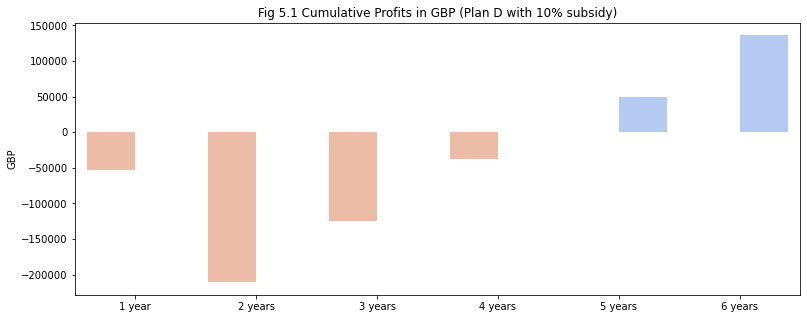

In [187]:
colors = [1 if c >= 0 else 0 for c in tmp[0]]

plt.figure(figsize=(13,5))
g = sns.barplot(
    x=tmp.index.values,
    y=tmp[0].values,
    hue=colors,
    palette='coolwarm_r'
)
plt.legend([],[], frameon=False)

plt.title('Fig 5.1 Initial investment for trial and payback forecast (Plan D with 10% subsidy)')
plt.ylabel('GBP')

plt.savefig('./img/Fig 5.1.jpg')
plt.show()

Below demostrates a 10-year plan introducing to 7430 households in total:

In [310]:

houseadd = [0,30,100,500,2000,4000,0,0,0,0,0]
n_house = 0

DR = pd.DataFrame()
DR.index.names=['Year']

for i in range(1,11):
    
    tmp=install_devices[['500turbines_Curtailed_energy_kwh','Energy kWh needed for 1 storage heater','Energy kWh needed for 1 hot water tank']]
    
    # energy consumption base on last year final number of households
    tmp['total_energy_consumed_kWh'] = (tmp['Energy kWh needed for 1 storage heater'] + tmp['Energy kWh needed for 1 hot water tank'])* n_house * 30
    tmp['total_energy_consumed_kWh'][tmp['total_energy_consumed_kWh'] > tmp['500turbines_Curtailed_energy_kwh']] = tmp['500turbines_Curtailed_energy_kwh']
    tmp['%of_curtailed_energy_kwh'] = tmp['total_energy_consumed_kWh']/tmp['500turbines_Curtailed_energy_kwh'] * 100
    
    DR.loc[i,'added_house'] = houseadd[i]
    n_house += houseadd[i]
    DR.loc[i,'N_households'] = n_house

    DR.loc[i,'Consumed_energy_kwh'] = tmp['total_energy_consumed_kWh'].sum()

    DR.loc[i,'Revenue in GBP (35% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.65
    DR.loc[1,'Revenue in GBP (35% discount)'] = 0
    
    DR.loc[i,'Profit (GBP)'] = DR.loc[i,'Revenue in GBP (35% discount)'] - (858.1 + 1117.42) * houseadd[i] * 0.9
    DR.loc[1,'Cumulative Profit (GBP)'] = DR.loc[1,'Profit (GBP)']
    if i != 1:
        DR.loc[i,'Cumulative Profit (GBP)'] = DR.loc[i-1,'Cumulative Profit (GBP)'] + DR.loc[i,'Profit (GBP)']

DR=DR.drop(columns=['Consumed_energy_kwh'])
DR['Cumulative Profit in million (GBP)'] = DR['Cumulative Profit (GBP)'] / 1000000

DR

added_house  N_households  Revenue in GBP (35% discount)  Profit (GBP)  \
Year                                                                           
1          30.000        30.000                          0.000    -53339.040   
2         100.000       130.000                      20065.005   -157731.795   
3         500.000       630.000                      86796.750   -802187.250   
4        2000.000      2630.000                     376608.816  -3179327.184   
5        4000.000      6630.000                    1534852.500  -5577019.500   
6           0.000      6630.000                    3332017.535   3332017.535   
7           0.000      6630.000                    3332017.535   3332017.535   
8           0.000      6630.000                    3332017.535   3332017.535   
9           0.000      6630.000                    3332017.535   3332017.535   
10          0.000      6630.000                    3332017.535   3332017.535   

      Cumulative Profit (GBP)  Cumulative Profit in million (GBP)  
Year                                                               
1                  -53339.040                              -0.053  
2                 -211070.835                              -0.211  
3                -1013258.085                              -1.013  
4                -4192585.269                              -4.193  
5                -9769604.769                              -9.770  
6                -6437587.235                              -6.438  
7                -3105569.700                              -3.106  
8                  226447.835                               0.226  
9                 3558465.369                               3.558  
10                6890482.904                               6.890

In [311]:
print(n_house,'households used up',round(tmp['total_energy_consumed_kWh'].sum()/tmp['500turbines_Curtailed_energy_kwh'].sum()*100)
      ,'% of curtailed energy')

6630 households used up 16 % of curtailed energy


#### Why this plan will work?
1. Households are benefited from 35% off energy cost
2. 16% of curtailed energy are used up if we introduce this to 6630 households in total in 5 years
3. 7 millions GBP profit in 10 years can be split between the wind generator and the DR solution supplier

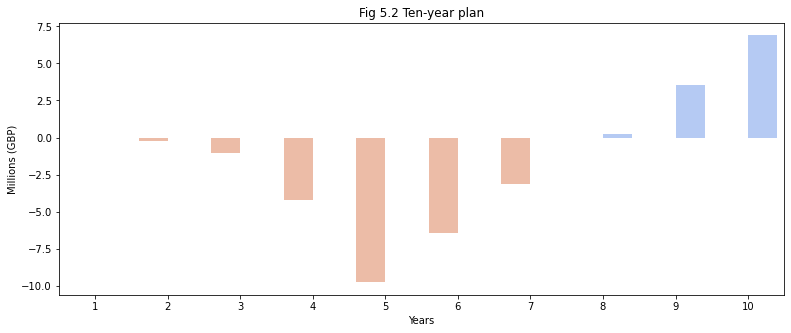

In [313]:
tmp=DR[['Cumulative Profit in million (GBP)']]

colors = [1 if c >= 0 else 0 for c in tmp['Cumulative Profit in million (GBP)']]

plt.figure(figsize=(13,5))
g = sns.barplot(
    x=tmp.index.values,
    y=tmp['Cumulative Profit in million (GBP)'].values,
    hue=colors,
    palette='coolwarm_r'
)
plt.legend([],[], frameon=False)

plt.title('Fig 5.2 Ten-year plan')
plt.ylabel('Millions (GBP)')
plt.xlabel('Years')

plt.savefig('./img/Fig 5.2 10-year.jpg')
plt.show()